In [1]:
import sys
sys.path.append('../RecSysRep/')

In [2]:
import Basics.Load as ld
import scipy.sparse as sps

URM_all, ICM1, ICM2, ICM3, ICM4 = ld.getCOOs()
ICML = ld.getICMlength('5km')
ICM_weighted = ld.getICMselected('7')
ICM_gen = sps.hstack([ICM1, ICM2])
ICM_all = sps.hstack([ICM1, ICM2, ICM3, ICML])
ICM_chall = sps.hstack([ICM1, ICM3, ICML])
# URM_train, URM_val = ld.getSplit(URM_train_val, 5678, 0.8)

In [3]:
from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.8, seed=9123)
# URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.8)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
# evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 13645 ( 0.0%) Users that have less than 1 test interactions


In [24]:
import os

ofp = "../models_temp/Similarity_Hybrid/"

models_to_combine_best = {
                            'IALS_Hyb' : {"num_factors": 28, "epochs": 10, "confidence_scaling": "linear", "alpha": 0.43657990940994623, "epsilon": 0.35472063248578317, "reg": 0.0001698292271931609, "mw": 0.06122362507952762},
                            'RP3ICMnew': {'alpha': 1.029719677583138, 'beta': 1.0630164752134375, 'topK': 6964, 'normalize_similarity': True},
                            'RP3ICM' : {"topK": 2550, "alpha": 1.3058102610510849, "beta": 0.5150718337969987, "normalize_similarity": True, "implicit": True},
                            'IALS' :  {'num_factors': 34, 'epochs': 599, 'confidence_scaling': 'linear', 'alpha': 0.003519435539271083, 'epsilon': 0.09222402080721787, 'reg': 2.4127708108457617e-05},
                            'SLIMgensub': {"l1_ratio" : 0.025887359156206147, "topK": 2140, "alpha": 0.009567288586539689, "workers": 8, "mw": 1},
                            'SLIMBPR' : {"epochs": 440, "lambda_i": 0.007773815998802306, "lambda_j": 0.003342522366982381, "learning_rate": 0.010055161410725193, "topK": 4289, "random_seed": 1234, "sgd_mode": "sgd"},
                            'SLIMweig': {'l1_ratio': 0.0005247075138160404, 'topK': 4983, 'alpha': 0.06067400905430761, 'workers': 8, 'mw': 2.308619939318322},
                            'SLIMER': {'topK': 6000, 'l1_ratio': 0.0005495104968035837, 'alpha': 0.08007142704041009, 'workers': 8},
                            'P3alpha': {'topK': 4834, 'alpha': 1.764994849187595, 'normalize_similarity': True, 'implicit': True},
                            'RP3beta': {"topK": 1049, "alpha": 1.1626473723475605, "beta": 0.6765017195261293, "normalize_similarity": True, "implicit": True},
                            'icm_all': {"shrink": 5675, "topK": 2310, "feature_weighting": "BM25", "normalize": False},
                            'icm_weighted': {"shrink": 4000, "topK": 985, "feature_weighting": "TF-IDF", "normalize": True},
                            'UserKNN' : {"topK": 469, "similarity": "cosine", "shrink": 588, "normalize": True, "feature_weighting": "TF-IDF", "URM_bias": False},
                            'SLIM_BPR_Hyb' : {"epochs": 1443, "lambda_i": 8.900837513818856e-05, "lambda_j": 1.2615223007492727e-05, "learning_rate": 0.0037706733838839264, "topK": 6181, "random_seed": 1234, "sgd_mode": "sgd"}
                         }


In [25]:
def model_init(recommender, name, args):
    path_name = ofp + name + ".zip"
    print(path_name)
    if os.path.exists(path_name):
        print("Model found!")
        recommender.load_model(ofp, name)
    else:
        print("Model does not exists, creating...")
        if not os.path.exists(ofp):
            print("Main folder does not exist, creating...")
            os.makedirs(ofp)
        recommender.fit(**args)
        recommender.save_model(ofp, name)

In [26]:
from Recommenders.NonPersonalizedRecommender import TopPop
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython_Hybrid
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIM_S_ElasticNetRecommender
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommenderICM
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender_Hybrid
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender

In [27]:
from Recommenders.KNN.ItemKNNSimilarityHybridRecommender import ItemKNNSimilarityHybridRecommender
from Recommenders.KNN.ItemKNNSimilarityHybridRecommenderNormal import ItemKNNSimilarityHybridRecommenderNormal
from Recommenders.KNN.ItemKNNScoresHybridMultipleRecommender import ItemKNNScoresHybridMultipleRecommender
from Recommenders.KNN.ItemKNNScoresHybridMultipleRecommender import ItemKNNScoresHybridTwoRecommender

In [10]:
recommender1 = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train)
recommender2 = SLIM_BPR_Cython

model_init(recommender1, 'SLIMER', models_to_combine_best['SLIMER'])
model_init(recommender2, 'UserKNN', models_to_combine_best['UserKNN'])
model_init(recommender3, 'RP3beta', models_to_combine_best['RP3beta'])

../models_temp/Similarity_Hybrid/SLIMER.zip
Model found!
SLIMElasticNetRecommender: Loading model from file '../models_temp/Similarity_Hybrid/SLIMER'
SLIMElasticNetRecommender: Loading complete
../models_temp/Similarity_Hybrid/UserKNN.zip
Model found!
UserKNNCFRecommender: Loading model from file '../models_temp/Similarity_Hybrid/UserKNN'
UserKNNCFRecommender: Loading complete
../models_temp/Similarity_Hybrid/RP3beta.zip
Model found!
RP3betaRecommender: Loading model from file '../models_temp/Similarity_Hybrid/RP3beta'
RP3betaRecommender: Loading complete


In [28]:
recommender1a = MultiThreadSLIM_SLIM_S_ElasticNetRecommender(URM_train, ICM_gen)
recommender2a = IALSRecommender_Hybrid(URM_train, ICM_chall)
recommender3a = RP3betaRecommender(URM_train)

model_init(recommender1a, 'SLIMgen', models_to_combine_best['SLIMgensub'])
model_init(recommender2a, 'IALSHyb', models_to_combine_best['IALS_Hyb'])
model_init(recommender3a, 'RP3beta', models_to_combine_best['RP3beta'])

../models_temp/Similarity_Hybrid/SLIMgen.zip
Model found!
SLIMElasticNetRecommender: Loading model from file '../models_temp/Similarity_Hybrid/SLIMgen'
SLIMElasticNetRecommender: Loading complete
../models_temp/Similarity_Hybrid/IALSHyb.zip
Model found!
IALSRecommender_Hybrid: Loading model from file '../models_temp/Similarity_Hybrid/IALSHyb'
IALSRecommender_Hybrid: Loading complete
../models_temp/Similarity_Hybrid/RP3beta.zip
Model found!
RP3betaRecommender: Loading model from file '../models_temp/Similarity_Hybrid/RP3beta'
RP3betaRecommender: Loading complete


In [29]:
recommender4a = ItemKNNCBFRecommender(URM_train, ICM_all)

model_init(recommender4a, 'ItemKNN_ICMall', models_to_combine_best['icm_all'])

../models_temp/Similarity_Hybrid/ItemKNN_ICMall.zip
Model found!
ItemKNNCBFRecommender: Loading model from file '../models_temp/Similarity_Hybrid/ItemKNN_ICMall'
ItemKNNCBFRecommender: Loading complete


In [30]:
def rank_models(evaluator, recommenders):
    for r in recommenders:
        r_d, _ = evaluator.evaluateRecommender(r)
        print(r.RECOMMENDER_NAME, r_d.loc[10]['MAP'])

In [30]:
rank_models(evaluator_validation, [recommender1a, recommender2a, recommender3a, recommender4a])

EvaluatorHoldout: Processed 13645 (100.0%) in 10.13 sec. Users per second: 1348
             MAP
cutoff          
10      0.246294
SLIMElasticNetRecommender 0.24629355482268728
EvaluatorHoldout: Processed 13645 (100.0%) in 5.03 sec. Users per second: 2715
             MAP
cutoff          
10      0.230347
IALSRecommender_Hybrid 0.23034716187684376
EvaluatorHoldout: Processed 13645 (100.0%) in 17.00 sec. Users per second: 803
             MAP
cutoff          
10      0.218235
RP3betaRecommender 0.21823452686314565
EvaluatorHoldout: Processed 13645 (100.0%) in 23.52 sec. Users per second: 580
             MAP
cutoff          
10      0.085391
ItemKNNCBFRecommender 0.08539067453046824


In [31]:
import numpy as np

def test_percentage_sim(recommender_a, recommender_b, evaluator, high1, low1, step):
    recommender = ItemKNNSimilarityHybridRecommenderNormal(URM_train, recommender_a.W_sparse, recommender_b.W_sparse)
    results = []
    alp_space = np.linspace(high1, low1, step, True)
    for alp in alp_space:
        recommender.fit(alp)
        r_d, _ = evaluator.evaluateRecommender(recommender)
        print(alp, ":", r_d.loc[10]['MAP'])
        results.append(r_d.loc[10]['MAP'])
    
    return alp_space, results

def test_percentage_sco(recommender_a, recommender_b, evaluator, high1, low1, step):
    recommender = ItemKNNScoresHybridTwoRecommender(URM_train, recommender_a, recommender_b)
    results = []
    alp_space = np.linspace(high1, low1, step, True)
    for alp in alp_space:
        recommender.fit(alp)
        r_d, _ = evaluator.evaluateRecommender(recommender)
        print(alp, ":", r_d.loc[10]['MAP'])
        results.append(r_d.loc[10]['MAP'])
    
    return alp_space, results

EvaluatorHoldout: Processed 13645 (100.0%) in 21.77 sec. Users per second: 627
             MAP
cutoff          
10      0.246919
0.8243 : 0.24691917790690354
EvaluatorHoldout: Processed 13645 (100.0%) in 21.73 sec. Users per second: 628
             MAP
cutoff          
10      0.246866
0.8256245 : 0.24686640841752705
EvaluatorHoldout: Processed 13645 (100.0%) in 21.85 sec. Users per second: 624
            MAP
cutoff         
10      0.24695
0.826949 : 0.2469502230597878
EvaluatorHoldout: Processed 13645 (100.0%) in 21.71 sec. Users per second: 629
             MAP
cutoff          
10      0.246884
0.8282735 : 0.2468836337515349
EvaluatorHoldout: Processed 13645 (100.0%) in 21.76 sec. Users per second: 627
             MAP
cutoff          
10      0.246878
0.8295980000000001 : 0.24687826810216043
EvaluatorHoldout: Processed 13645 (100.0%) in 21.75 sec. Users per second: 627
             MAP
cutoff          
10      0.246856
0.8309225 : 0.24685618023928826
EvaluatorHoldout: Processed 

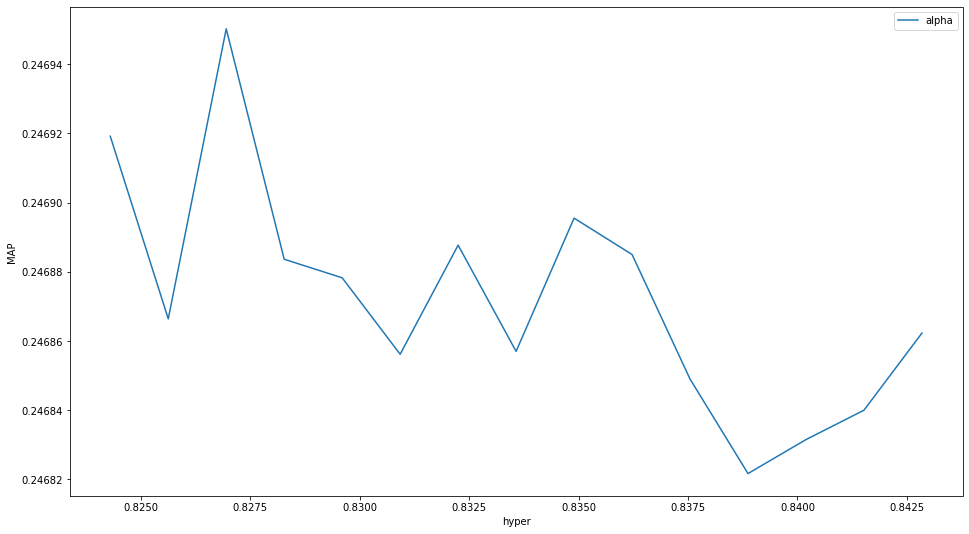

In [38]:
import matplotlib.pyplot as plt
import numpy as np

alp_space, results = test_percentage_sim(recommender1a, recommender4a, evaluator_validation, 0.8243, 0.842843, 15)

_ = plt.figure(figsize=(16, 9))
plt.plot(alp_space, results, label='alpha')
plt.ylabel('MAP')
plt.xlabel('hyper')
plt.legend()
plt.show()

In [32]:
recommenderf = ItemKNNSimilarityHybridRecommenderNormal(URM_train, recommender1a.W_sparse, recommender4a.W_sparse)
recommenderf.fit(0.826949)

In [33]:
from Recommenders.KNN.ItemKNNScoresHybridMultipleRecommender import ItemKNNScoresHybridTwoRecommender

In [34]:
alp_space, results = test_percentage_sco(recommenderf, recommender2a, evaluator_validation, 0.7, 1, 8)

EvaluatorHoldout: Processed 11000 (80.6%) in 5.17 min. Users per second: 35
EvaluatorHoldout: Processed 13645 (100.0%) in 6.21 min. Users per second: 37
             MAP
cutoff          
10      0.247474
0.7 : 0.24747350910560997
EvaluatorHoldout: Processed 12000 (87.9%) in 5.43 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.93 min. Users per second: 38
             MAP
cutoff          
10      0.247707
0.7428571428571428 : 0.24770706171805576
EvaluatorHoldout: Processed 11000 (80.6%) in 5.10 min. Users per second: 36
EvaluatorHoldout: Processed 13645 (100.0%) in 6.02 min. Users per second: 38
             MAP
cutoff          
10      0.248162
0.7857142857142857 : 0.24816166745188506
EvaluatorHoldout: Processed 12000 (87.9%) in 5.33 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.85 min. Users per second: 39
             MAP
cutoff          
10      0.248056
0.8285714285714285 : 0.24805556428019016
EvaluatorHoldout: Processed 12000 (

In [ ]:
import optuna
from Recommenders.HybridScores.DifferentStructure import ThreeDifferentModelRecommender

class Objective(object):
    def __init__(self, URM_train, recommender1, recommender2, recommender3, evaluator):
        # Hold this implementation specific arguments as the fields of the class.
        self.URM_train = URM_train
        self.evaluator = evaluator
        self.recommender_1 = recommender1
        self.recommender_2 = recommender2
        self.recommender_3 = recommender3

    def __call__(self, trial):
        # Calculate an objective value by using the extra arguments.
        alpha = trial.suggest_uniform('alpha', 0, 1)
        beta = trial.suggest_uniform('beta', 0, 1)
        gamma = trial.suggest_uniform('gamma', 0, 1)

        recommender_final = ThreeDifferentModelRecommender(self.URM_train.tocsr(), self.recommender_1, self.recommender_2, self.recommender_3)
        recommender_final.fit(2, alpha, beta, gamma)
        result_dict, _ = self.evaluator.evaluateRecommender(recommender_final)

        map_v = -result_dict.loc[10]['MAP']
        if map_v >= -0.245: # minimum acceptable map
            # Calculate the penalty.
            penalty = map_v
            trial.report(penalty, 0)
            
            raise optuna.exceptions.TrialPruned()

        return map_v

study = optuna.create_study(direction='minimize')
study.optimize(Objective(URM_train, recommenderf, recommender2a, recommender3a, evaluator_validation), n_trials=500)

print(study.best_params)

[I 2022-01-05 01:31:29,153] A new study created in memory with name: no-name-d3dc6c29-44e0-46ce-ad98-a8800767e6ee


CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.045647141897864646
IALSRecommender_Hybrid with weight beta: 0.27890111801638506
RP3betaRecommender with weight gamma: 0.6754517400857503
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.97 min. Users per second: 46


[I 2022-01-05 01:36:27,151] Trial 0 pruned. 


             MAP
cutoff          
10      0.237757
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.19091689348173635
IALSRecommender_Hybrid with weight beta: 0.35751497729682075
RP3betaRecommender with weight gamma: 0.45156812922144296
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 01:41:25,046] Trial 1 pruned. 


             MAP
cutoff          
10      0.242124
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.06183981554897133
IALSRecommender_Hybrid with weight beta: 0.6279376414821766
RP3betaRecommender with weight gamma: 0.3102225429688522
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.98 min. Users per second: 46


[I 2022-01-05 01:46:23,763] Trial 2 pruned. 


             MAP
cutoff          
10      0.235568
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.0708352345829014
IALSRecommender_Hybrid with weight beta: 0.4258375325203834
RP3betaRecommender with weight gamma: 0.5033272328967152
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 01:51:21,234] Trial 3 pruned. 


             MAP
cutoff          
10      0.237915
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.33526728761969204
IALSRecommender_Hybrid with weight beta: 0.24230738316038167
RP3betaRecommender with weight gamma: 0.4224253292199263
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 01:56:18,640] Trial 4 finished with value: -0.24607318803910921 and parameters: {'alpha': 0.322461047733517, 'beta': 0.23305194253277384, 'gamma': 0.406289904441702}. Best is trial 4 with value: -0.24607318803910921.


             MAP
cutoff          
10      0.246073
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.06775799230587547
IALSRecommender_Hybrid with weight beta: 0.5157273279868761
RP3betaRecommender with weight gamma: 0.4165146797072483
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:01:15,995] Trial 5 pruned. 


             MAP
cutoff          
10      0.236955
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.18353278991083502
IALSRecommender_Hybrid with weight beta: 0.3795519163632443
RP3betaRecommender with weight gamma: 0.43691529372592064
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 02:06:12,604] Trial 6 pruned. 


             MAP
cutoff          
10      0.241786
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.15032097152388552
IALSRecommender_Hybrid with weight beta: 0.4111508433312634
RP3betaRecommender with weight gamma: 0.43852818514485115
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:11:09,465] Trial 7 pruned. 


             MAP
cutoff          
10      0.240617
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.2216840031558558
IALSRecommender_Hybrid with weight beta: 0.6149536338589455
RP3betaRecommender with weight gamma: 0.16336236298519877
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 02:16:06,949] Trial 8 pruned. 


             MAP
cutoff          
10      0.239563
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.1698994102476293
IALSRecommender_Hybrid with weight beta: 0.2913189916113471
RP3betaRecommender with weight gamma: 0.5387815981410236
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:21:04,217] Trial 9 pruned. 


            MAP
cutoff         
10      0.24239
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.8822174582795778
IALSRecommender_Hybrid with weight beta: 0.11438689334424625
RP3betaRecommender with weight gamma: 0.003395648376175951
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:26:01,470] Trial 10 finished with value: -0.2479304123261621 and parameters: {'alpha': 0.7391334120147404, 'beta': 0.09583484658326227, 'gamma': 0.0028449189558997223}. Best is trial 10 with value: -0.2479304123261621.


            MAP
cutoff         
10      0.24793
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.9725088773053099
IALSRecommender_Hybrid with weight beta: 0.004903327638607927
RP3betaRecommender with weight gamma: 0.022587795056082192
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:30:58,414] Trial 11 finished with value: -0.24719550448737093 and parameters: {'alpha': 0.7612955009565922, 'beta': 0.0038384032866945472, 'gamma': 0.01768208718091363}. Best is trial 10 with value: -0.2479304123261621.


             MAP
cutoff          
10      0.247196
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.9439493471562079
IALSRecommender_Hybrid with weight beta: 0.026819446755521524
RP3betaRecommender with weight gamma: 0.029231206088270546
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:35:55,256] Trial 12 finished with value: -0.24744159148941272 and parameters: {'alpha': 0.7741892210827928, 'beta': 0.021996229624059116, 'gamma': 0.02397425745456212}. Best is trial 10 with value: -0.2479304123261621.


             MAP
cutoff          
10      0.247442
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.9294685067501824
IALSRecommender_Hybrid with weight beta: 0.03509188115540317
RP3betaRecommender with weight gamma: 0.03543961209441437
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:40:52,185] Trial 13 finished with value: -0.2476037504289624 and parameters: {'alpha': 0.7849603972570524, 'beta': 0.02963600893649873, 'gamma': 0.029929676784352093}. Best is trial 10 with value: -0.2479304123261621.


             MAP
cutoff          
10      0.247604
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6261594862127869
IALSRecommender_Hybrid with weight beta: 0.1867710067567602
RP3betaRecommender with weight gamma: 0.1870695070304528
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:45:49,094] Trial 14 finished with value: -0.24850217243364925 and parameters: {'alpha': 0.6212398075937479, 'beta': 0.18530356379880844, 'gamma': 0.18559971878276801}. Best is trial 14 with value: -0.24850217243364925.


             MAP
cutoff          
10      0.248502
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5872001050929014
IALSRecommender_Hybrid with weight beta: 0.21142255258287404
RP3betaRecommender with weight gamma: 0.20137734232422455
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 02:50:45,672] Trial 15 finished with value: -0.24845077561988588 and parameters: {'alpha': 0.586617332019623, 'beta': 0.21121272399180183, 'gamma': 0.20117748321034312}. Best is trial 14 with value: -0.24850217243364925.


             MAP
cutoff          
10      0.248451
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5365493562355788
IALSRecommender_Hybrid with weight beta: 0.26670466532689324
RP3betaRecommender with weight gamma: 0.19674597843752803
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 02:55:42,990] Trial 16 finished with value: -0.24759118986546733 and parameters: {'alpha': 0.5712815651519687, 'beta': 0.28396913885100716, 'gamma': 0.20948184764906705}. Best is trial 14 with value: -0.24850217243364925.


             MAP
cutoff          
10      0.247591
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.452713295621777
IALSRecommender_Hybrid with weight beta: 0.4505771171207707
RP3betaRecommender with weight gamma: 0.09670958725745231
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 03:00:39,481] Trial 17 pruned. 


             MAP
cutoff          
10      0.244909
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5279112885884378
IALSRecommender_Hybrid with weight beta: 0.3319974011009583
RP3betaRecommender with weight gamma: 0.14009131031060384
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 03:05:36,180] Trial 18 finished with value: -0.2467766842904261 and parameters: {'alpha': 0.5523077873553598, 'beta': 0.3473400815127335, 'gamma': 0.1465653856962386}. Best is trial 14 with value: -0.24850217243364925.


             MAP
cutoff          
10      0.246777
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5788466118540494
IALSRecommender_Hybrid with weight beta: 0.13202740043055664
RP3betaRecommender with weight gamma: 0.28912598771539394
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 03:10:33,001] Trial 19 finished with value: -0.24897643476591716 and parameters: {'alpha': 0.6228570886860232, 'beta': 0.1420656190688646, 'gamma': 0.3111086206327967}. Best is trial 19 with value: -0.24897643476591716.


             MAP
cutoff          
10      0.248976
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.3391810501908898
IALSRecommender_Hybrid with weight beta: 0.10145554321107991
RP3betaRecommender with weight gamma: 0.5593634065980303
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 03:15:29,809] Trial 20 finished with value: -0.24693954410883756 and parameters: {'alpha': 0.4358493414063946, 'beta': 0.13037087910922712, 'gamma': 0.7187847677085148}. Best is trial 19 with value: -0.24897643476591716.


            MAP
cutoff         
10      0.24694
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5811941081010426
IALSRecommender_Hybrid with weight beta: 0.14490551651205003
RP3betaRecommender with weight gamma: 0.2739003753869074
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 03:20:26,648] Trial 21 finished with value: -0.24883521494587796 and parameters: {'alpha': 0.6456044333917098, 'beta': 0.16096454279063482, 'gamma': 0.3042551433207204}. Best is trial 19 with value: -0.24897643476591716.


             MAP
cutoff          
10      0.248835
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.590610973463068
IALSRecommender_Hybrid with weight beta: 0.12162923556024652
RP3betaRecommender with weight gamma: 0.28775979097668547
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 03:25:23,216] Trial 22 finished with value: -0.24908027825763254 and parameters: {'alpha': 0.6471592669207971, 'beta': 0.13327467733924211, 'gamma': 0.3153114719250956}. Best is trial 22 with value: -0.24908027825763254.


            MAP
cutoff         
10      0.24908
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.4918682094242099
IALSRecommender_Hybrid with weight beta: 0.27831347782120486
RP3betaRecommender with weight gamma: 0.22981831275458534
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 03:30:19,651] Trial 23 finished with value: -0.24728999226415949 and parameters: {'alpha': 0.6662136151136168, 'beta': 0.3769632284451967, 'gamma': 0.311278684058023}. Best is trial 22 with value: -0.24908027825763254.


            MAP
cutoff         
10      0.24729
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6797756870294192
IALSRecommender_Hybrid with weight beta: 0.08932808076922957
RP3betaRecommender with weight gamma: 0.23089623220135128
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 03:35:17,238] Trial 24 finished with value: -0.24909205942056867 and parameters: {'alpha': 0.9393009497510421, 'beta': 0.1234318212712775, 'gamma': 0.3190479658788978}. Best is trial 24 with value: -0.24909205942056867.


             MAP
cutoff          
10      0.249092
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5472498568854924
IALSRecommender_Hybrid with weight beta: 0.05233364547506269
RP3betaRecommender with weight gamma: 0.40041649763944487
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 03:40:14,070] Trial 25 finished with value: -0.24854821523088302 and parameters: {'alpha': 0.937930439382552, 'beta': 0.08969453071083572, 'gamma': 0.6862730375196253}. Best is trial 24 with value: -0.24909205942056867.


             MAP
cutoff          
10      0.248548
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5831412602837419
IALSRecommender_Hybrid with weight beta: 0.2170764238388448
RP3betaRecommender with weight gamma: 0.19978231587741324
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 5.04 min. Users per second: 45


[I 2022-01-05 03:45:16,340] Trial 26 finished with value: -0.24838049288360842 and parameters: {'alpha': 0.8799861030416498, 'beta': 0.327577980304832, 'gamma': 0.301480402055684}. Best is trial 24 with value: -0.24909205942056867.


            MAP
cutoff         
10      0.24838
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.49376118391061957
IALSRecommender_Hybrid with weight beta: 0.24964642401297837
RP3betaRecommender with weight gamma: 0.25659239207640194
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 03:50:12,555] Trial 27 finished with value: -0.2475099199078687 and parameters: {'alpha': 0.8528925299111929, 'beta': 0.4312237921850383, 'gamma': 0.4432218278090133}. Best is trial 24 with value: -0.24909205942056867.


            MAP
cutoff         
10      0.24751
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.3967888879790549
IALSRecommender_Hybrid with weight beta: 0.5126664210016568
RP3betaRecommender with weight gamma: 0.09054469101928816
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 03:55:09,246] Trial 28 pruned. 


            MAP
cutoff         
10      0.24363
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.4366457529255174
IALSRecommender_Hybrid with weight beta: 0.16751385076465644
RP3betaRecommender with weight gamma: 0.3958403963098262
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 04:00:05,350] Trial 29 finished with value: -0.24779404340214203 and parameters: {'alpha': 0.674452545643647, 'beta': 0.25874554446442666, 'gamma': 0.6114237025575577}. Best is trial 24 with value: -0.24909205942056867.


             MAP
cutoff          
10      0.247794
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6646318417550217
IALSRecommender_Hybrid with weight beta: 0.06979425553679149
RP3betaRecommender with weight gamma: 0.2655739027081869
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 04:05:01,434] Trial 30 finished with value: -0.24921483536617298 and parameters: {'alpha': 0.8497984046287321, 'beta': 0.0892389489657901, 'gamma': 0.3395628446517146}. Best is trial 30 with value: -0.24921483536617298.


             MAP
cutoff          
10      0.249215
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6665663046199887
IALSRecommender_Hybrid with weight beta: 0.06737929587807509
RP3betaRecommender with weight gamma: 0.26605439950193627
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 04:09:57,987] Trial 31 finished with value: -0.24925273226427522 and parameters: {'alpha': 0.8619156246711217, 'beta': 0.08712601806321474, 'gamma': 0.34402645671377813}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249253
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6281538343054516
IALSRecommender_Hybrid with weight beta: 0.05612374456303588
RP3betaRecommender with weight gamma: 0.31572242113151255
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 04:14:55,297] Trial 32 finished with value: -0.24915506581281646 and parameters: {'alpha': 0.8939689209473909, 'beta': 0.07987356062551179, 'gamma': 0.44932629035038024}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249155
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6548763226691754
IALSRecommender_Hybrid with weight beta: 0.04289127179793015
RP3betaRecommender with weight gamma: 0.3022324055328945
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 04:19:51,720] Trial 33 finished with value: -0.24892258051382238 and parameters: {'alpha': 0.9999449671070372, 'beta': 0.06549162014646007, 'gamma': 0.46148526423659014}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248923
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.670937245993745
IALSRecommender_Hybrid with weight beta: 0.04966180889248377
RP3betaRecommender with weight gamma: 0.2794009451137712
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 04:24:48,318] Trial 34 finished with value: -0.24899354667969453 and parameters: {'alpha': 0.8727795707017469, 'beta': 0.06460188714259912, 'gamma': 0.36345491085217385}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248994
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.529122097474811
IALSRecommender_Hybrid with weight beta: 0.11843581193701573
RP3betaRecommender with weight gamma: 0.3524420905881733
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 04:29:44,360] Trial 35 finished with value: -0.24879019293072002 and parameters: {'alpha': 0.9219679879005119, 'beta': 0.20636829901463724, 'gamma': 0.6141121806512664}. Best is trial 31 with value: -0.24925273226427522.


            MAP
cutoff         
10      0.24879
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5604987452616575
IALSRecommender_Hybrid with weight beta: 0.19086553345967602
RP3betaRecommender with weight gamma: 0.2486357212786664
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 04:34:41,325] Trial 36 finished with value: -0.24835517690647718 and parameters: {'alpha': 0.8346173070839562, 'beta': 0.2842105872634767, 'gamma': 0.3702339708924828}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248355
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5137171512545533
IALSRecommender_Hybrid with weight beta: 0.34040572652976264
RP3betaRecommender with weight gamma: 0.14587712221568416
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 04:39:38,446] Trial 37 finished with value: -0.24654592065237105 and parameters: {'alpha': 0.944075379671692, 'beta': 0.6255751141093625, 'gamma': 0.26808332017893705}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.246546
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6236455034301183
IALSRecommender_Hybrid with weight beta: 0.00017019585746222304
RP3betaRecommender with weight gamma: 0.37618430071241943
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 04:44:34,815] Trial 38 finished with value: -0.24834122040168152 and parameters: {'alpha': 0.8128648271148042, 'beta': 0.0002218347209925614, 'gamma': 0.4903218012156627}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248341
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5846067257899894
IALSRecommender_Hybrid with weight beta: 0.08663753450684492
RP3betaRecommender with weight gamma: 0.32875573970316574
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 04:49:30,856] Trial 39 finished with value: -0.24893381493308359 and parameters: {'alpha': 0.7144797420576284, 'beta': 0.10588445287438636, 'gamma': 0.40179030746810623}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248934
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.010108025406588722
IALSRecommender_Hybrid with weight beta: 0.17411162003806083
RP3betaRecommender with weight gamma: 0.8157803545553505
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 04:54:27,753] Trial 40 pruned. 


             MAP
cutoff          
10      0.234672
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6953146011113045
IALSRecommender_Hybrid with weight beta: 0.1104155980548043
RP3betaRecommender with weight gamma: 0.19426980083389112
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 04:59:23,666] Trial 41 finished with value: -0.24902919843887342 and parameters: {'alpha': 0.9072148540499376, 'beta': 0.14406524832647769, 'gamma': 0.25347439666611593}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249029
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6318839989672221
IALSRecommender_Hybrid with weight beta: 0.05347844246485489
RP3betaRecommender with weight gamma: 0.3146375585679231
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 05:04:19,487] Trial 42 finished with value: -0.24913228579571584 and parameters: {'alpha': 0.7058591328265917, 'beta': 0.05973920384889724, 'gamma': 0.351472413620891}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249132
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6640859934300786
IALSRecommender_Hybrid with weight beta: 0.04256540435492439
RP3betaRecommender with weight gamma: 0.29334860221499715
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 05:09:15,800] Trial 43 finished with value: -0.24891646745421003 and parameters: {'alpha': 0.8141044040463338, 'beta': 0.052181017952768353, 'gamma': 0.359616663123027}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248916
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5634968826613137
IALSRecommender_Hybrid with weight beta: 0.1436072812560701
RP3betaRecommender with weight gamma: 0.29289583608261616
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 05:14:12,033] Trial 44 finished with value: -0.24889715111646185 and parameters: {'alpha': 0.9485953334730145, 'beta': 0.24174969027136944, 'gamma': 0.49306328366796026}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248897
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5912367081445841
IALSRecommender_Hybrid with weight beta: 0.07330783609575041
RP3betaRecommender with weight gamma: 0.33545545575966546
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 05:19:08,115] Trial 45 finished with value: -0.24914131579100557 and parameters: {'alpha': 0.7224812621996759, 'beta': 0.08958093640328019, 'gamma': 0.4099208958956293}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249141
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5337383948980369
IALSRecommender_Hybrid with weight beta: 0.05185808159814436
RP3betaRecommender with weight gamma: 0.41440352350381876
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 05:24:04,387] Trial 46 finished with value: -0.24841934949135427 and parameters: {'alpha': 0.7385803442609443, 'beta': 0.07176054809919855, 'gamma': 0.5734462800092716}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248419
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6070121205491272
IALSRecommender_Hybrid with weight beta: 0.03164038530219558
RP3betaRecommender with weight gamma: 0.36134749414867723
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 05:29:00,364] Trial 47 finished with value: -0.2488268741966058 and parameters: {'alpha': 0.7070866805187198, 'beta': 0.03685675171267374, 'gamma': 0.42092075512463684}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248827
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.3611454006932721
IALSRecommender_Hybrid with weight beta: 0.3920416953217192
RP3betaRecommender with weight gamma: 0.24681290398500877
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 05:33:56,796] Trial 48 pruned. 


             MAP
cutoff          
10      0.244948
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5702593365609393
IALSRecommender_Hybrid with weight beta: 0.1339088545685696
RP3betaRecommender with weight gamma: 0.295831808870491
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 05:38:52,643] Trial 49 finished with value: -0.24895621106632407 and parameters: {'alpha': 0.8842922861015853, 'beta': 0.20765037859758229, 'gamma': 0.4587417860535078}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.248956
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6326926606472657
IALSRecommender_Hybrid with weight beta: 0.0692535212216606
RP3betaRecommender with weight gamma: 0.29805381813107384
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 05:43:49,114] Trial 50 finished with value: -0.24923688251409098 and parameters: {'alpha': 0.8383797426030413, 'beta': 0.09176769845373581, 'gamma': 0.39495050103939167}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249237
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6290668448368799
IALSRecommender_Hybrid with weight beta: 0.07014571496401689
RP3betaRecommender with weight gamma: 0.3007874401991032
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 05:48:44,836] Trial 51 finished with value: -0.2492234582119168 and parameters: {'alpha': 0.8283615673321483, 'beta': 0.09236858509733467, 'gamma': 0.39607993560964505}. Best is trial 31 with value: -0.24925273226427522.


             MAP
cutoff          
10      0.249223
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6168220044092017
IALSRecommender_Hybrid with weight beta: 0.0773579868883425
RP3betaRecommender with weight gamma: 0.30582000870245585
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 05:53:41,310] Trial 52 finished with value: -0.24925635589523595 and parameters: {'alpha': 0.8223901748321136, 'beta': 0.10313907076434267, 'gamma': 0.40774059392525014}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249256
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6459073291627502
IALSRecommender_Hybrid with weight beta: 0.14421447564457623
RP3betaRecommender with weight gamma: 0.2098781951926736
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 05:58:38,387] Trial 53 finished with value: -0.24895507977223025 and parameters: {'alpha': 0.8164701281889791, 'beta': 0.18229675698038833, 'gamma': 0.265300096772638}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248955
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6744841831009689
IALSRecommender_Hybrid with weight beta: 0.012694127987209938
RP3betaRecommender with weight gamma: 0.3128216889118212
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:03:34,916] Trial 54 finished with value: -0.24830568787915844 and parameters: {'alpha': 0.8397562688929219, 'beta': 0.01580463089049615, 'gamma': 0.38947388373382885}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248306
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.36363653706680926
IALSRecommender_Hybrid with weight beta: 0.12551587856891316
RP3betaRecommender with weight gamma: 0.5108475843642776
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:08:31,325] Trial 55 finished with value: -0.24693001680946083 and parameters: {'alpha': 0.3634816893167202, 'beta': 0.12546243000306326, 'gamma': 0.5106300495705649}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24693
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5183720178481456
IALSRecommender_Hybrid with weight beta: 0.18090784547498456
RP3betaRecommender with weight gamma: 0.30072013667686986
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 06:13:28,436] Trial 56 finished with value: -0.24826880013028702 and parameters: {'alpha': 0.7818201333695295, 'beta': 0.2728492106190038, 'gamma': 0.45355275606810924}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248269
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.7053179681086976
IALSRecommender_Hybrid with weight beta: 0.11544912804604714
RP3betaRecommender with weight gamma: 0.1792329038452553
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:18:25,032] Trial 57 finished with value: -0.24891373664404168 and parameters: {'alpha': 0.9644670209014161, 'beta': 0.15786763080885724, 'gamma': 0.2450869432444446}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248914
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6069123527756513
IALSRecommender_Hybrid with weight beta: 0.15821422443548086
RP3betaRecommender with weight gamma: 0.2348734227888678
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:23:21,306] Trial 58 finished with value: -0.24865496402542933 and parameters: {'alpha': 0.8919155724433335, 'beta': 0.2325108887810255, 'gamma': 0.3451688903354655}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248655
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.19272306217402652
IALSRecommender_Hybrid with weight beta: 0.1291243323720693
RP3betaRecommender with weight gamma: 0.6781526054539041
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 06:28:18,486] Trial 59 pruned. 


             MAP
cutoff          
10      0.243704
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5116607401479543
IALSRecommender_Hybrid with weight beta: 0.20448301206872657
RP3betaRecommender with weight gamma: 0.2838562477833192
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:33:15,116] Trial 60 finished with value: -0.24787991124139863 and parameters: {'alpha': 0.7668681057546678, 'beta': 0.30647553704982106, 'gamma': 0.42543874478482785}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24788
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6024880417309154
IALSRecommender_Hybrid with weight beta: 0.07139980014821248
RP3betaRecommender with weight gamma: 0.3261121581208722
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.93 min. Users per second: 46


[I 2022-01-05 06:38:11,183] Trial 61 finished with value: -0.24919256137779536 and parameters: {'alpha': 0.7382777248420588, 'beta': 0.0874919971127705, 'gamma': 0.39961181876592433}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249193
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6210388648798255
IALSRecommender_Hybrid with weight beta: 0.029050937218274047
RP3betaRecommender with weight gamma: 0.3499101979019004
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:43:07,723] Trial 62 finished with value: -0.24866955161202045 and parameters: {'alpha': 0.8564831130522294, 'beta': 0.04006454113078247, 'gamma': 0.48256589488281615}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24867
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5916656699217215
IALSRecommender_Hybrid with weight beta: 0.11959267164506755
RP3betaRecommender with weight gamma: 0.288741658433211
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:48:04,143] Trial 63 finished with value: -0.2490696807365926 and parameters: {'alpha': 0.807028421418776, 'beta': 0.16312368609073086, 'gamma': 0.39384188850102286}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24907
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6999208174064896
IALSRecommender_Hybrid with weight beta: 0.06078957424935521
RP3betaRecommender with weight gamma: 0.23928960834415525
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 06:53:00,473] Trial 64 finished with value: -0.24900440884794137 and parameters: {'alpha': 0.977424075650216, 'beta': 0.08489130761964286, 'gamma': 0.3341626915958045}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249004
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.8534922767206244
IALSRecommender_Hybrid with weight beta: 0.001859648561710453
RP3betaRecommender with weight gamma: 0.1446480747176651
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 06:57:57,294] Trial 65 finished with value: -0.24755955434574103 and parameters: {'alpha': 0.9063176959331021, 'beta': 0.001974748273259913, 'gamma': 0.15360081558439895}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24756
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.613038175092488
IALSRecommender_Hybrid with weight beta: 0.07314074606703298
RP3betaRecommender with weight gamma: 0.313821078840479
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 07:02:54,736] Trial 66 finished with value: -0.24924595322433477 and parameters: {'alpha': 0.8529238109249003, 'beta': 0.10176117312755031, 'gamma': 0.43662121118770897}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249246
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6878398827175894
IALSRecommender_Hybrid with weight beta: 0.08838276595777485
RP3betaRecommender with weight gamma: 0.22377735132463583
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 07:07:51,108] Trial 67 finished with value: -0.24902908792685335 and parameters: {'alpha': 0.8485837270465206, 'beta': 0.10903726118178902, 'gamma': 0.27607270759788727}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249029
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.472962314964571
IALSRecommender_Hybrid with weight beta: 0.3433327049274613
RP3betaRecommender with weight gamma: 0.18370498010796774
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 07:12:48,333] Trial 68 finished with value: -0.24635078841601524 and parameters: {'alpha': 0.7437828165639349, 'beta': 0.5399266669028179, 'gamma': 0.2888953373203976}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.246351
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5368331188992578
IALSRecommender_Hybrid with weight beta: 0.16439199009558933
RP3betaRecommender with weight gamma: 0.298774891005153
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 07:17:45,341] Trial 69 finished with value: -0.2486069959924851 and parameters: {'alpha': 0.6812502231689376, 'beta': 0.2086161900171857, 'gamma': 0.3791503430188552}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248607
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6267593275522929
IALSRecommender_Hybrid with weight beta: 0.031586490398479654
RP3betaRecommender with weight gamma: 0.3416541820492275
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 07:22:41,871] Trial 70 finished with value: -0.24872480471362748 and parameters: {'alpha': 0.7917449947418619, 'beta': 0.03990119424648147, 'gamma': 0.43158988893951744}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248725
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.4460107999536433
IALSRecommender_Hybrid with weight beta: 0.04397660349027126
RP3betaRecommender with weight gamma: 0.5100125965560854
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.97 min. Users per second: 46


[I 2022-01-05 07:27:40,284] Trial 71 finished with value: -0.24767277681806824 and parameters: {'alpha': 0.8703654744393488, 'beta': 0.08581791598996998, 'gamma': 0.9952614502108884}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.247673
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5753155574095421
IALSRecommender_Hybrid with weight beta: 0.10087581202522847
RP3betaRecommender with weight gamma: 0.32380863056522946
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 07:32:38,209] Trial 72 finished with value: -0.24899273528881516 and parameters: {'alpha': 0.830573115356762, 'beta': 0.14563266433327895, 'gamma': 0.46747691697917704}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248993
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6451078613133838
IALSRecommender_Hybrid with weight beta: 0.12044434822074616
RP3betaRecommender with weight gamma: 0.23444779046587014
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 07:37:35,145] Trial 73 finished with value: -0.24913001739110419 and parameters: {'alpha': 0.9166949426622022, 'beta': 0.17115079742078562, 'gamma': 0.33314910068037024}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24913
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5393279744016966
IALSRecommender_Hybrid with weight beta: 0.08379556540962149
RP3betaRecommender with weight gamma: 0.3768764601886819
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 07:42:32,321] Trial 74 finished with value: -0.24884832225305026 and parameters: {'alpha': 0.747219812224498, 'beta': 0.11609578887518958, 'gamma': 0.5221489913005606}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248848
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6708928451197915
IALSRecommender_Hybrid with weight beta: 0.030377247491597374
RP3betaRecommender with weight gamma: 0.298729907388611
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 07:47:29,403] Trial 75 finished with value: -0.2485798071274437 and parameters: {'alpha': 0.8677362430962975, 'beta': 0.039290087538880386, 'gamma': 0.3863787927140783}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24858
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6391196095635882
IALSRecommender_Hybrid with weight beta: 0.051954894464712326
RP3betaRecommender with weight gamma: 0.3089254959716996
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 07:52:26,109] Trial 76 finished with value: -0.24911369069430608 and parameters: {'alpha': 0.8956825418152122, 'beta': 0.07281124102211528, 'gamma': 0.43293801242054875}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249114
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5359140375762241
IALSRecommender_Hybrid with weight beta: 0.08891708007061631
RP3betaRecommender with weight gamma: 0.3751688823531594
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 07:57:23,452] Trial 77 finished with value: -0.2487696231540135 and parameters: {'alpha': 0.7948841869517353, 'beta': 0.13188454853265794, 'gamma': 0.5564620276931382}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24877
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.7475745803188819
IALSRecommender_Hybrid with weight beta: 0.07330627650078461
RP3betaRecommender with weight gamma: 0.17911914318033334
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 08:02:20,525] Trial 78 finished with value: -0.248585658448063 and parameters: {'alpha': 0.9707279091060637, 'beta': 0.09518842719558997, 'gamma': 0.2325867624687652}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248586
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.14170664827408846
IALSRecommender_Hybrid with weight beta: 0.2986038986725427
RP3betaRecommender with weight gamma: 0.5596894530533689
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 08:07:17,305] Trial 79 pruned. 


             MAP
cutoff          
10      0.241228
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5261039173238062
IALSRecommender_Hybrid with weight beta: 0.06350189370703917
RP3betaRecommender with weight gamma: 0.4103941889691545
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.97 min. Users per second: 46


[I 2022-01-05 08:12:15,331] Trial 80 finished with value: -0.2485444869043267 and parameters: {'alpha': 0.5171067564226932, 'beta': 0.0624159167044084, 'gamma': 0.40337583683480865}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248544
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6550774724664445
IALSRecommender_Hybrid with weight beta: 0.018682478796127666
RP3betaRecommender with weight gamma: 0.3262400487374278
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 08:17:12,391] Trial 81 finished with value: -0.24840362479424358 and parameters: {'alpha': 0.8280198077574722, 'beta': 0.02361470688796291, 'gamma': 0.41236835915188724}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248404
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5564742818371416
IALSRecommender_Hybrid with weight beta: 0.07199285236395486
RP3betaRecommender with weight gamma: 0.3715328657989035
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 08:22:08,983] Trial 82 finished with value: -0.24890703903400968 and parameters: {'alpha': 0.7293499857147989, 'beta': 0.09435833345229987, 'gamma': 0.4869542029299264}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248907
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5609834339205156
IALSRecommender_Hybrid with weight beta: 0.10731110795475685
RP3betaRecommender with weight gamma: 0.3317054581247275
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 08:27:06,165] Trial 83 finished with value: -0.24902447841234934 and parameters: {'alpha': 0.763592616912154, 'beta': 0.14606843053145416, 'gamma': 0.4515068066152437}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249024
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.31473062653703227
IALSRecommender_Hybrid with weight beta: 0.5203196367223717
RP3betaRecommender with weight gamma: 0.16494973674059607
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 08:32:03,437] Trial 84 pruned. 


             MAP
cutoff          
10      0.242084
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.4428130757945938
IALSRecommender_Hybrid with weight beta: 0.39286308742333487
RP3betaRecommender with weight gamma: 0.1643238367820713
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 08:36:59,995] Trial 85 finished with value: -0.24550742757100538 and parameters: {'alpha': 0.929179257509463, 'beta': 0.8243664241844103, 'gamma': 0.3448098283418742}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.245507
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6437182099300595
IALSRecommender_Hybrid with weight beta: 0.04348454263538294
RP3betaRecommender with weight gamma: 0.3127972474345576
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 08:41:56,991] Trial 86 finished with value: -0.24907485153582593 and parameters: {'alpha': 0.8523143019154805, 'beta': 0.05757565504386964, 'gamma': 0.41415880967113744}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249075
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6196501269340144
IALSRecommender_Hybrid with weight beta: 0.09141926980732423
RP3betaRecommender with weight gamma: 0.2889306032586614
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 08:46:53,986] Trial 87 finished with value: -0.24913018897555522 and parameters: {'alpha': 0.8056045637424323, 'beta': 0.11885381406308301, 'gamma': 0.37563748068886993}. Best is trial 52 with value: -0.24925635589523595.


            MAP
cutoff         
10      0.24913
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6423218564631311
IALSRecommender_Hybrid with weight beta: 0.016986395045095234
RP3betaRecommender with weight gamma: 0.3406917484917736
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 08:51:50,570] Trial 88 finished with value: -0.24831547400931767 and parameters: {'alpha': 0.8920557959034383, 'beta': 0.023590684325954292, 'gamma': 0.47315227685391353}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248315
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5093056748057475
IALSRecommender_Hybrid with weight beta: 0.2787232002035886
RP3betaRecommender with weight gamma: 0.21197112499066392
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 08:56:47,356] Trial 89 finished with value: -0.24732242754192368 and parameters: {'alpha': 0.6997751061242797, 'beta': 0.38295971682655205, 'gamma': 0.2912437929190552}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.247322
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.46799607233250307
IALSRecommender_Hybrid with weight beta: 0.17307361240677815
RP3betaRecommender with weight gamma: 0.3589303152607188
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 09:01:44,286] Trial 90 finished with value: -0.24795366056524068 and parameters: {'alpha': 0.6553249664975462, 'beta': 0.24235130582783748, 'gamma': 0.5026025018775528}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.247954
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6220125375541781
IALSRecommender_Hybrid with weight beta: 0.0617041356862034
RP3betaRecommender with weight gamma: 0.31628332675961845
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 09:06:41,022] Trial 91 finished with value: -0.24923474497897444 and parameters: {'alpha': 0.6896317706901776, 'beta': 0.06841201709455413, 'gamma': 0.3506666144233745}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249235
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.546255101682655
IALSRecommender_Hybrid with weight beta: 0.07023981129248526
RP3betaRecommender with weight gamma: 0.38350508702485986
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 09:11:38,059] Trial 92 finished with value: -0.24867357657610567 and parameters: {'alpha': 0.6285334657696781, 'beta': 0.08081951434537192, 'gamma': 0.4412696206324346}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248674
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6226517576530229
IALSRecommender_Hybrid with weight beta: 0.08666156586521749
RP3betaRecommender with weight gamma: 0.2906866764817596
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 09:16:35,671] Trial 93 finished with value: -0.2491388001884536 and parameters: {'alpha': 0.7708538304655579, 'beta': 0.10728854320294526, 'gamma': 0.3598752196185645}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249139
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.650526458398606
IALSRecommender_Hybrid with weight beta: 0.052132121858070556
RP3betaRecommender with weight gamma: 0.2973414197433234
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 09:21:32,167] Trial 94 finished with value: -0.2491490254584795 and parameters: {'alpha': 0.7224067667674455, 'beta': 0.0578924917042174, 'gamma': 0.33019633696620204}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.249149
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.358290778898522
IALSRecommender_Hybrid with weight beta: 0.47324374663156404
RP3betaRecommender with weight gamma: 0.16846547446991397
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 09:26:28,649] Trial 95 pruned. 


             MAP
cutoff          
10      0.243617
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.7070380914660094
IALSRecommender_Hybrid with weight beta: 0.04301186170096384
RP3betaRecommender with weight gamma: 0.24995004683302682
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.97 min. Users per second: 46


[I 2022-01-05 09:31:27,166] Trial 96 finished with value: -0.2486247797030142 and parameters: {'alpha': 0.8277468018835843, 'beta': 0.05035503941833019, 'gamma': 0.29262263857340776}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248625
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6500024501511831
IALSRecommender_Hybrid with weight beta: 0.013309561025848923
RP3betaRecommender with weight gamma: 0.33668798882296813
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 09:36:23,857] Trial 97 finished with value: -0.24835385076224128 and parameters: {'alpha': 0.7524463806988981, 'beta': 0.015407220419341228, 'gamma': 0.38975185179026567}. Best is trial 52 with value: -0.24925635589523595.


             MAP
cutoff          
10      0.248354
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6210829271964665
IALSRecommender_Hybrid with weight beta: 0.11788241231891049
RP3betaRecommender with weight gamma: 0.26103466048462304
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 09:41:20,746] Trial 98 finished with value: -0.2492881397337259 and parameters: {'alpha': 0.7934849914014531, 'beta': 0.15060456636198033, 'gamma': 0.3334934454970166}. Best is trial 98 with value: -0.2492881397337259.


             MAP
cutoff          
10      0.249288
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.632751517333224
IALSRecommender_Hybrid with weight beta: 0.10340046681225422
RP3betaRecommender with weight gamma: 0.2638480158545218
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 09:46:17,796] Trial 99 finished with value: -0.24920764626847658 and parameters: {'alpha': 0.8627835253903972, 'beta': 0.14099092114275863, 'gamma': 0.3597679579586727}. Best is trial 98 with value: -0.2492881397337259.


             MAP
cutoff          
10      0.249208
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6874437382223133
IALSRecommender_Hybrid with weight beta: 0.1368137809422747
RP3betaRecommender with weight gamma: 0.1757424808354119
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.94 min. Users per second: 46


[I 2022-01-05 09:51:14,593] Trial 100 finished with value: -0.2489505400547925 and parameters: {'alpha': 0.8687986676542302, 'beta': 0.17290670347330522, 'gamma': 0.22210520615823548}. Best is trial 98 with value: -0.2492881397337259.


             MAP
cutoff          
10      0.248951
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.627264167707059
IALSRecommender_Hybrid with weight beta: 0.10833323177138854
RP3betaRecommender with weight gamma: 0.26440260052155246
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 09:56:12,425] Trial 101 finished with value: -0.24930615319292668 and parameters: {'alpha': 0.8474370727007973, 'beta': 0.14635874570064233, 'gamma': 0.35720925462636016}. Best is trial 101 with value: -0.24930615319292668.


             MAP
cutoff          
10      0.249306
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6185929243032293
IALSRecommender_Hybrid with weight beta: 0.10861634214300264
RP3betaRecommender with weight gamma: 0.27279073355376804
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 10:01:09,338] Trial 102 finished with value: -0.24930904686291422 and parameters: {'alpha': 0.8444282099269316, 'beta': 0.14826988761298387, 'gamma': 0.372380901509546}. Best is trial 102 with value: -0.24930904686291422.


             MAP
cutoff          
10      0.249309
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6252721737873984
IALSRecommender_Hybrid with weight beta: 0.11361590658509094
RP3betaRecommender with weight gamma: 0.2611119196275107
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.19 min. Users per second: 42
EvaluatorHoldout: Processed 13645 (100.0%) in 5.25 min. Users per second: 43


[I 2022-01-05 10:06:24,301] Trial 103 finished with value: -0.2494720259179788 and parameters: {'alpha': 0.8485861182868869, 'beta': 0.15419346196184583, 'gamma': 0.3543672013629155}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249472
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.627159652920209
IALSRecommender_Hybrid with weight beta: 0.1446389905094053
RP3betaRecommender with weight gamma: 0.22820135657038554
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.31 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.36 min. Users per second: 42


[I 2022-01-05 10:11:46,022] Trial 104 finished with value: -0.24901430839833255 and parameters: {'alpha': 0.8387364590220261, 'beta': 0.19343399112412818, 'gamma': 0.3051867205784985}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249014
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.619785445386413
IALSRecommender_Hybrid with weight beta: 0.12192575193266403
RP3betaRecommender with weight gamma: 0.258288802680923
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.98 min. Users per second: 46


[I 2022-01-05 10:16:45,207] Trial 105 finished with value: -0.24928499886579905 and parameters: {'alpha': 0.8016549297243923, 'beta': 0.15770357439780594, 'gamma': 0.3340809202653663}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249285
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6523486833915123
IALSRecommender_Hybrid with weight beta: 0.1310961322348636
RP3betaRecommender with weight gamma: 0.216555184373624
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.98 min. Users per second: 46


[I 2022-01-05 10:21:43,827] Trial 106 finished with value: -0.24899377352015906 and parameters: {'alpha': 0.7976986334339548, 'beta': 0.16030568957163982, 'gamma': 0.26480589144410555}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248994
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5857822275790199
IALSRecommender_Hybrid with weight beta: 0.16599717329802136
RP3betaRecommender with weight gamma: 0.24822059912295877
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.97 min. Users per second: 46


[I 2022-01-05 10:26:42,121] Trial 107 finished with value: -0.2487123401210977 and parameters: {'alpha': 0.8162101769184662, 'beta': 0.23129513974076038, 'gamma': 0.34586262536896073}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248712
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.42892247454772664
IALSRecommender_Hybrid with weight beta: 0.11924399501050363
RP3betaRecommender with weight gamma: 0.4518335304417697
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.95 min. Users per second: 46


[I 2022-01-05 10:31:39,132] Trial 108 finished with value: -0.24782517870956963 and parameters: {'alpha': 0.7821429284354141, 'beta': 0.21744220223991884, 'gamma': 0.8239213882128122}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.247825
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5798176254553923
IALSRecommender_Hybrid with weight beta: 0.17257597647492454
RP3betaRecommender with weight gamma: 0.2476063980696832
Norm type: 2
EvaluatorHoldout: Processed 13645 (100.0%) in 4.96 min. Users per second: 46


[I 2022-01-05 10:36:36,549] Trial 109 finished with value: -0.2486045152884647 and parameters: {'alpha': 0.879562017451982, 'beta': 0.2617914105539869, 'gamma': 0.3756098011838452}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248605
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6902701692513238
IALSRecommender_Hybrid with weight beta: 0.09703975339615022
RP3betaRecommender with weight gamma: 0.2126900773525261
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.08 min. Users per second: 43
EvaluatorHoldout: Processed 13645 (100.0%) in 5.13 min. Users per second: 44


[I 2022-01-05 10:41:44,531] Trial 110 finished with value: -0.2490835558114791 and parameters: {'alpha': 0.9217085001540563, 'beta': 0.12957588136120018, 'gamma': 0.28400220801497583}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249084
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6507885871576475
IALSRecommender_Hybrid with weight beta: 0.0856600643323231
RP3betaRecommender with weight gamma: 0.26355134851002937
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.38 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.94 min. Users per second: 38


[I 2022-01-05 10:47:40,815] Trial 111 finished with value: -0.24927761782617236 and parameters: {'alpha': 0.8471252671387646, 'beta': 0.11150288482711945, 'gamma': 0.34306226463872724}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249278
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6277667523475072
IALSRecommender_Hybrid with weight beta: 0.13111951593662174
RP3betaRecommender with weight gamma: 0.2411137317158709
Norm type: 2
EvaluatorHoldout: Processed 11000 (80.6%) in 5.09 min. Users per second: 36
EvaluatorHoldout: Processed 13645 (100.0%) in 6.06 min. Users per second: 38


[I 2022-01-05 10:53:44,315] Trial 112 finished with value: -0.24916548302477354 and parameters: {'alpha': 0.8456594105902678, 'beta': 0.176630017676477, 'gamma': 0.32480231787616587}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249165
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6891253719772928
IALSRecommender_Hybrid with weight beta: 0.10152149766284249
RP3betaRecommender with weight gamma: 0.2093531303598645
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.33 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.83 min. Users per second: 39


[I 2022-01-05 10:59:34,352] Trial 113 finished with value: -0.24913749149348385 and parameters: {'alpha': 0.8193457928011554, 'beta': 0.12070548462067537, 'gamma': 0.24891349752213}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249137
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6255313724791426
IALSRecommender_Hybrid with weight beta: 0.09683595209492067
RP3betaRecommender with weight gamma: 0.27763267542593667
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.31 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.81 min. Users per second: 39


[I 2022-01-05 11:05:22,833] Trial 114 finished with value: -0.24911204755506822 and parameters: {'alpha': 0.953780766570619, 'beta': 0.147650897595498, 'gamma': 0.4233212235915972}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249112
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.4686964974411797
IALSRecommender_Hybrid with weight beta: 0.3363780685401228
RP3betaRecommender with weight gamma: 0.1949254340186975
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.31 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.80 min. Users per second: 39


[I 2022-01-05 11:11:11,169] Trial 115 finished with value: -0.24634384360804465 and parameters: {'alpha': 0.9096712500851005, 'beta': 0.6528605606840632, 'gamma': 0.37832171608967985}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.246344
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5942685181530898
IALSRecommender_Hybrid with weight beta: 0.14231255812527352
RP3betaRecommender with weight gamma: 0.2634189237216367
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.30 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.80 min. Users per second: 39


[I 2022-01-05 11:16:59,005] Trial 116 finished with value: -0.2489150337061656 and parameters: {'alpha': 0.7922514612950307, 'beta': 0.18972455832892873, 'gamma': 0.35117799593326116}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248915
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5072246456482796
IALSRecommender_Hybrid with weight beta: 0.12770113365687719
RP3betaRecommender with weight gamma: 0.36507422069484324
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.30 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.80 min. Users per second: 39


[I 2022-01-05 11:22:47,107] Trial 117 finished with value: -0.24868366806842435 and parameters: {'alpha': 0.4231144507217376, 'beta': 0.10652517673843447, 'gamma': 0.30453602696008686}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248684
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6030917501124617
IALSRecommender_Hybrid with weight beta: 0.11519479926322285
RP3betaRecommender with weight gamma: 0.28171345062431535
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.36 min. Users per second: 40
EvaluatorHoldout: Processed 13645 (100.0%) in 5.41 min. Users per second: 42


[I 2022-01-05 11:28:12,023] Trial 118 finished with value: -0.24914017868048782 and parameters: {'alpha': 0.8375500705522404, 'beta': 0.15997800041564497, 'gamma': 0.3912325452999676}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24914
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6338113648150389
IALSRecommender_Hybrid with weight beta: 0.05301568975358585
RP3betaRecommender with weight gamma: 0.31317294543137525
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.24 min. Users per second: 38
EvaluatorHoldout: Processed 13645 (100.0%) in 5.70 min. Users per second: 40


[I 2022-01-05 11:33:53,814] Trial 119 finished with value: -0.2491098547639407 and parameters: {'alpha': 0.8795530351980676, 'beta': 0.07357096042210176, 'gamma': 0.4345965219106924}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24911
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.7083303826491745
IALSRecommender_Hybrid with weight beta: 0.11473702591525267
RP3betaRecommender with weight gamma: 0.17693259143557294
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.34 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.40 min. Users per second: 42


[I 2022-01-05 11:39:17,992] Trial 120 finished with value: -0.24889298365003856 and parameters: {'alpha': 0.7577982495233022, 'beta': 0.12274994765705548, 'gamma': 0.1892890822670051}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248893
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6287888900011458
IALSRecommender_Hybrid with weight beta: 0.07138657634427269
RP3betaRecommender with weight gamma: 0.29982453365458156
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.35 min. Users per second: 40
EvaluatorHoldout: Processed 13645 (100.0%) in 5.41 min. Users per second: 42


[I 2022-01-05 11:44:42,814] Trial 121 finished with value: -0.2492462004222735 and parameters: {'alpha': 0.8568406722786682, 'beta': 0.09727735817086021, 'gamma': 0.40856614846003675}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249246
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6625091441128994
IALSRecommender_Hybrid with weight beta: 0.07618778814070441
RP3betaRecommender with weight gamma: 0.26130306774639617
Norm type: 2
EvaluatorHoldout: Processed 8000 (58.6%) in 6.11 min. Users per second: 22
EvaluatorHoldout: Processed 11000 (80.6%) in 12.49 min. Users per second: 15
EvaluatorHoldout: Processed 13645 (100.0%) in 16.00 min. Users per second: 14


[I 2022-01-05 12:00:42,904] Trial 122 finished with value: -0.24920101554729698 and parameters: {'alpha': 0.8494858668523636, 'beta': 0.09768989579597619, 'gamma': 0.3350493574137029}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249201
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5956136000322533
IALSRecommender_Hybrid with weight beta: 0.1058225258468984
RP3betaRecommender with weight gamma: 0.29856387412084834
Norm type: 2
EvaluatorHoldout: Processed 7000 (51.3%) in 5.22 min. Users per second: 22
EvaluatorHoldout: Processed 13645 (100.0%) in 8.00 min. Users per second: 28


[I 2022-01-05 12:08:43,484] Trial 123 finished with value: -0.24902989350131316 and parameters: {'alpha': 0.8067145124347326, 'beta': 0.14332877445808778, 'gamma': 0.4043826570262707}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24903
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6780088221720548
IALSRecommender_Hybrid with weight beta: 0.034493106323614936
RP3betaRecommender with weight gamma: 0.28749807150433027
Norm type: 2
EvaluatorHoldout: Processed 11000 (80.6%) in 5.00 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.97 min. Users per second: 38


[I 2022-01-05 12:14:41,759] Trial 124 finished with value: -0.24865869816840824 and parameters: {'alpha': 0.8662107713392918, 'beta': 0.04406771601990252, 'gamma': 0.3673018965719722}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248659
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6486505291749642
IALSRecommender_Hybrid with weight beta: 0.05459607864692325
RP3betaRecommender with weight gamma: 0.2967533921781125
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.44 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.97 min. Users per second: 38


[I 2022-01-05 12:20:40,301] Trial 125 finished with value: -0.24922576151506157 and parameters: {'alpha': 0.9011843150340472, 'beta': 0.07585152177637582, 'gamma': 0.41228595435544146}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249226
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.47886087177345826
IALSRecommender_Hybrid with weight beta: 0.2800864659018763
RP3betaRecommender with weight gamma: 0.24105266232466552
Norm type: 2
EvaluatorHoldout: Processed 11000 (80.6%) in 5.21 min. Users per second: 35
EvaluatorHoldout: Processed 13645 (100.0%) in 6.16 min. Users per second: 37


[I 2022-01-05 12:26:50,065] Trial 126 finished with value: -0.24722413582508906 and parameters: {'alpha': 0.9090727966430201, 'beta': 0.5317180873774437, 'gamma': 0.45761604423048036}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.247224
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6488324501616853
IALSRecommender_Hybrid with weight beta: 0.0514539867116001
RP3betaRecommender with weight gamma: 0.29971356312671454
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.36 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.86 min. Users per second: 39


[I 2022-01-05 12:32:41,988] Trial 127 finished with value: -0.24915024399890637 and parameters: {'alpha': 0.8977826270331334, 'beta': 0.0711963394397997, 'gamma': 0.4147105003677144}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24915
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6751347435685588
IALSRecommender_Hybrid with weight beta: 0.09742745841238297
RP3betaRecommender with weight gamma: 0.22743779801905814
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.38 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.89 min. Users per second: 39


[I 2022-01-05 12:38:35,407] Trial 128 finished with value: -0.24925995044408508 and parameters: {'alpha': 0.9257401708413032, 'beta': 0.1335918686669611, 'gamma': 0.31186116253036805}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24926
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6417817819527436
IALSRecommender_Hybrid with weight beta: 0.14478809218073999
RP3betaRecommender with weight gamma: 0.21343012586651647
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.37 min. Users per second: 37
EvaluatorHoldout: Processed 13645 (100.0%) in 5.88 min. Users per second: 39


[I 2022-01-05 12:44:28,556] Trial 129 finished with value: -0.24899597212770685 and parameters: {'alpha': 0.9359536400662587, 'beta': 0.21115423610574066, 'gamma': 0.3112595415169869}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248996
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6324184736914135
IALSRecommender_Hybrid with weight beta: 0.11918389827459976
RP3betaRecommender with weight gamma: 0.24839762803398674
Norm type: 2
EvaluatorHoldout: Processed 11000 (80.6%) in 5.03 min. Users per second: 36
EvaluatorHoldout: Processed 13645 (100.0%) in 5.98 min. Users per second: 38


[I 2022-01-05 12:50:27,625] Trial 130 finished with value: -0.24934639120091848 and parameters: {'alpha': 0.8835555159505523, 'beta': 0.1665125152311658, 'gamma': 0.34703776617625137}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249346
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6531689240232345
IALSRecommender_Hybrid with weight beta: 0.11183603684338614
RP3betaRecommender with weight gamma: 0.2349950391333795
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.42 min. Users per second: 40
EvaluatorHoldout: Processed 13645 (100.0%) in 5.48 min. Users per second: 42


[I 2022-01-05 12:55:56,410] Trial 131 finished with value: -0.24915836954056303 and parameters: {'alpha': 0.9789355688287639, 'beta': 0.16761402803502082, 'gamma': 0.3521983270254133}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249158
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6572587974578822
IALSRecommender_Hybrid with weight beta: 0.09788493636217886
RP3betaRecommender with weight gamma: 0.24485626617993894
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.19 min. Users per second: 39
EvaluatorHoldout: Processed 13645 (100.0%) in 5.71 min. Users per second: 40


[I 2022-01-05 13:01:39,213] Trial 132 finished with value: -0.24922000325719829 and parameters: {'alpha': 0.8623812555709045, 'beta': 0.12843363169574498, 'gamma': 0.3212729218374451}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24922
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6946508187384495
IALSRecommender_Hybrid with weight beta: 0.08490513405396934
RP3betaRecommender with weight gamma: 0.22044404720758123
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.31 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.37 min. Users per second: 42


[I 2022-01-05 13:07:01,272] Trial 133 finished with value: -0.24908904942213944 and parameters: {'alpha': 0.8822658976619759, 'beta': 0.10783677538634043, 'gamma': 0.2799827768821292}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249089
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6363797774194384
IALSRecommender_Hybrid with weight beta: 0.10707619890264075
RP3betaRecommender with weight gamma: 0.25654402367792084
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.31 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.37 min. Users per second: 42


[I 2022-01-05 13:12:23,448] Trial 134 finished with value: -0.2493044984208437 and parameters: {'alpha': 0.9380437463558217, 'beta': 0.1578336746831802, 'gamma': 0.37815393514213014}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249304
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.29007605629067235
IALSRecommender_Hybrid with weight beta: 0.2457081794547029
RP3betaRecommender with weight gamma: 0.4642157642546248
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.30 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.35 min. Users per second: 42


[I 2022-01-05 13:17:44,664] Trial 135 finished with value: -0.24534497781034995 and parameters: {'alpha': 0.22913384444975854, 'beta': 0.19408723522768617, 'gamma': 0.3666884612194906}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.245345
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6327661028915427
IALSRecommender_Hybrid with weight beta: 0.10424664171748499
RP3betaRecommender with weight gamma: 0.2629872553909723
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.27 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.33 min. Users per second: 43


[I 2022-01-05 13:23:04,340] Trial 136 finished with value: -0.24921855205988813 and parameters: {'alpha': 0.9299458691691836, 'beta': 0.1532062691047017, 'gamma': 0.3864997045154527}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249219
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6754447463741234
IALSRecommender_Hybrid with weight beta: 0.09530566786055802
RP3betaRecommender with weight gamma: 0.22924958576531854
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.36 min. Users per second: 40
EvaluatorHoldout: Processed 13645 (100.0%) in 5.41 min. Users per second: 42


[I 2022-01-05 13:28:29,308] Trial 137 finished with value: -0.24916233052400252 and parameters: {'alpha': 0.9635162963813431, 'beta': 0.13595274019688972, 'gamma': 0.32702262177520874}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249162
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.5761927016529376
IALSRecommender_Hybrid with weight beta: 0.12266191607870831
RP3betaRecommender with weight gamma: 0.3011453822683541
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.33 min. Users per second: 41
EvaluatorHoldout: Processed 13645 (100.0%) in 5.39 min. Users per second: 42


[I 2022-01-05 13:33:52,844] Trial 138 finished with value: -0.24900200957382984 and parameters: {'alpha': 0.834117678399217, 'beta': 0.17756988655715325, 'gamma': 0.43594909549830746}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249002
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6562064640105422
IALSRecommender_Hybrid with weight beta: 0.1472184845951607
RP3betaRecommender with weight gamma: 0.1965750513942971
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.02 min. Users per second: 40
EvaluatorHoldout: Processed 13645 (100.0%) in 5.53 min. Users per second: 41


[I 2022-01-05 13:39:24,631] Trial 139 finished with value: -0.24881337718915772 and parameters: {'alpha': 0.9988319397481173, 'beta': 0.224085760503268, 'gamma': 0.29921290121137434}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248813
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6687247055734574
IALSRecommender_Hybrid with weight beta: 0.07541731583816394
RP3betaRecommender with weight gamma: 0.2558579785883786
Norm type: 2
EvaluatorHoldout: Processed 12000 (87.9%) in 5.10 min. Users per second: 39
EvaluatorHoldout: Processed 13645 (100.0%) in 5.56 min. Users per second: 41


[I 2022-01-05 13:44:58,196] Trial 140 finished with value: -0.2491754523722285 and parameters: {'alpha': 0.8824686481171404, 'beta': 0.09952289215224341, 'gamma': 0.33763765955267033}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249175
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6453660214279818
IALSRecommender_Hybrid with weight beta: 0.09009116234137078
RP3betaRecommender with weight gamma: 0.2645428162306474
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.15 min. Users per second: 42
EvaluatorHoldout: Processed 13645 (100.0%) in 5.20 min. Users per second: 44


[I 2022-01-05 13:50:10,278] Trial 141 finished with value: -0.2491920291751748 and parameters: {'alpha': 0.8548457377255861, 'beta': 0.11933390289723961, 'gamma': 0.35041091627401066}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249192
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6386692696659219
IALSRecommender_Hybrid with weight beta: 0.10430837764221584
RP3betaRecommender with weight gamma: 0.2570223526918623
Norm type: 2
EvaluatorHoldout: Processed 13000 (95.3%) in 5.40 min. Users per second: 40
EvaluatorHoldout: Processed 13645 (100.0%) in 5.56 min. Users per second: 41


[I 2022-01-05 13:55:44,214] Trial 142 finished with value: -0.2492168216743176 and parameters: {'alpha': 0.9445006371585564, 'beta': 0.1542571935480505, 'gamma': 0.3800993525309868}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249217
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.618757087022117
IALSRecommender_Hybrid with weight beta: 0.10658532919109122
RP3betaRecommender with weight gamma: 0.2746575837867918
Norm type: 2
EvaluatorHoldout: Processed 11000 (80.6%) in 5.21 min. Users per second: 35
EvaluatorHoldout: Processed 13645 (100.0%) in 6.12 min. Users per second: 37


[I 2022-01-05 14:01:51,791] Trial 143 finished with value: -0.249319702548176 and parameters: {'alpha': 0.8210537324582069, 'beta': 0.14143237175480475, 'gamma': 0.36445422451870435}. Best is trial 103 with value: -0.2494720259179788.


            MAP
cutoff         
10      0.24932
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.581303518355511
IALSRecommender_Hybrid with weight beta: 0.13005276631474755
RP3betaRecommender with weight gamma: 0.2886437153297415
Norm type: 2
EvaluatorHoldout: Processed 10000 (73.3%) in 5.44 min. Users per second: 31
EvaluatorHoldout: Processed 13645 (100.0%) in 6.82 min. Users per second: 33


[I 2022-01-05 14:08:41,368] Trial 144 finished with value: -0.2489823849657114 and parameters: {'alpha': 0.8007998311821539, 'beta': 0.17915981930446304, 'gamma': 0.3976336478433003}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248982
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6386180301497145
IALSRecommender_Hybrid with weight beta: 0.1552637643301222
RP3betaRecommender with weight gamma: 0.20611820552016344
Norm type: 2
EvaluatorHoldout: Processed 11000 (80.6%) in 5.28 min. Users per second: 35
EvaluatorHoldout: Processed 13645 (100.0%) in 6.71 min. Users per second: 34


[I 2022-01-05 14:15:24,299] Trial 145 finished with value: -0.24878267229696388 and parameters: {'alpha': 0.8215847219609189, 'beta': 0.19974747129808407, 'gamma': 0.26517191901654724}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.248783
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6450502237815882
IALSRecommender_Hybrid with weight beta: 0.0954590130860199
RP3betaRecommender with weight gamma: 0.259490763132392
Norm type: 2
EvaluatorHoldout: Processed 8000 (58.6%) in 5.63 min. Users per second: 24
EvaluatorHoldout: Processed 13645 (100.0%) in 9.79 min. Users per second: 23


[I 2022-01-05 14:25:11,725] Trial 146 finished with value: -0.2491166483449388 and parameters: {'alpha': 0.9152942295025004, 'beta': 0.13545159835681558, 'gamma': 0.3682045046227265}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249117
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.648993856754079
IALSRecommender_Hybrid with weight beta: 0.08797295894886692
RP3betaRecommender with weight gamma: 0.2630331842970541
Norm type: 2
EvaluatorHoldout: Processed 6000 (44.0%) in 5.92 min. Users per second: 17
EvaluatorHoldout: Processed 11000 (80.6%) in 10.97 min. Users per second: 17
EvaluatorHoldout: Processed 13645 (100.0%) in 13.48 min. Users per second: 17


[I 2022-01-05 14:38:41,037] Trial 147 finished with value: -0.2492083994951362 and parameters: {'alpha': 0.7788855015679196, 'beta': 0.10558014000010263, 'gamma': 0.31567746219491527}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.249208
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.3500292108412576
IALSRecommender_Hybrid with weight beta: 0.17864230887104135
RP3betaRecommender with weight gamma: 0.47132848028770097
Norm type: 2
EvaluatorHoldout: Processed 6000 (44.0%) in 5.09 min. Users per second: 20
EvaluatorHoldout: Processed 12000 (87.9%) in 10.10 min. Users per second: 20
EvaluatorHoldout: Processed 13645 (100.0%) in 11.33 min. Users per second: 20


[I 2022-01-05 14:50:01,406] Trial 148 finished with value: -0.24662687070675385 and parameters: {'alpha': 0.3161107432233851, 'beta': 0.1613315439949855, 'gamma': 0.4256558926839492}. Best is trial 103 with value: -0.2494720259179788.


             MAP
cutoff          
10      0.246627
CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6425902707814012
IALSRecommender_Hybrid with weight beta: 0.10312427822234499
RP3betaRecommender with weight gamma: 0.2542854509962539
Norm type: 2
EvaluatorHoldout: Processed 6000 (44.0%) in 5.36 min. Users per second: 19
EvaluatorHoldout: Processed 9000 (66.0%) in 13.58 min. Users per second: 11
EvaluatorHoldout: Processed 10000 (73.3%) in 19.37 min. Users per second: 9
EvaluatorHoldout: Processed 11000 (80.6%) in 24.71 min. Users per second: 7


In [19]:
ofp = "../all_models/URM_all/"

recommender1a = MultiThreadSLIM_SLIM_S_ElasticNetRecommender(URM_all, ICM_gen)
recommender2a = IALSRecommender_Hybrid(URM_all, ICM_chall)
recommender3a = RP3betaRecommender(URM_all)
recommender4a = ItemKNNCBFRecommender(URM_all, ICM_all)

model_init(recommender1a, 'SLIM_gen', models_to_combine_best['SLIMgensub'])
model_init(recommender2a, 'IALS_Hyb', models_to_combine_best['IALS_Hyb'])
model_init(recommender3a, 'RP3beta', models_to_combine_best['RP3beta'])
model_init(recommender4a, 'ItemKNN_ICMall', models_to_combine_best['icm_all'])

../all_models/URM_all/SLIM_gen.zip
Model found!
SLIMElasticNetRecommender: Loading model from file '../all_models/URM_all/SLIM_gen'
SLIMElasticNetRecommender: Loading complete
../all_models/URM_all/IALS_Hyb.zip
Model found!
IALSRecommender_Hybrid: Loading model from file '../all_models/URM_all/IALS_Hyb'
IALSRecommender_Hybrid: Loading complete
../all_models/URM_all/RP3beta.zip
Model found!
RP3betaRecommender: Loading model from file '../all_models/URM_all/RP3beta'
RP3betaRecommender: Loading complete
../all_models/URM_all/ItemKNN_ICMall.zip
Model does not exists, creating...
Similarity column 18059 (100.0%), 1798.19 column/sec. Elapsed time 10.04 sec
ItemKNNCBFRecommender: Saving model in file '../all_models/URM_all/ItemKNN_ICMall'
ItemKNNCBFRecommender: Saving complete


In [20]:
recommenderf = ItemKNNSimilarityHybridRecommenderNormal(URM_train, recommender1a.W_sparse, recommender4a.W_sparse)
recommenderf.fit(0.826949)

In [21]:
best_hyp = {'norm':2 , 'alpha': 0.6703056629333649, 'beta': 0.03962663408920457, 'gamma': 0.36807180017058355}

In [22]:
recommender_final = ThreeDifferentModelRecommender(URM_all.tocsr(), recommenderf, recommender2a, recommender3a)
recommender_final.fit(**best_hyp)

CURRENT CONFIGURATION:
ItemKNNSimilarityHybridRecommender with weight alpha: 0.6218025188203546
IALSRecommender_Hybrid with weight beta: 0.03675926111262674
RP3betaRecommender with weight gamma: 0.3414382200670186
Norm type: 2


In [23]:
import pandas as pd
K=10

user_test_path = '../data/data_target_users_test.csv'
user_test_dataframe = pd.read_csv(filepath_or_buffer=user_test_path,
                                sep=",",
                                dtype={0:int})

subm_set = user_test_dataframe.to_numpy().T[0]


subm_res = {"user_id":[], "item_list":[]}

for user_id in subm_set:
    subm_res["user_id"].append(user_id)
    res = recommender_final.recommend(user_id, K)
    print("USER", user_id, "RECOMMENDED!")
    res = ' '.join(map(str, res))
    print(res)
    subm_res["item_list"].append(res)


# print(subm_res)

submission = pd.DataFrame.from_dict(subm_res)
# submission

from datetime import datetime
now = datetime.now() # current date and time


submission.to_csv('../subs/submission {:%Y_%m_%d %H_%M_%S}.csv'.format(now), index=False)

USER 0 RECOMMENDED!
3899 8465 5433 16365 16359 9130 2243 640 6061 8635
USER 1 RECOMMENDED!
3473 940 16012 14400 640 2118 16365 10118 2555 11662
USER 2 RECOMMENDED!
2846 6177 17022 16365 15119 17330 5925 4607 14229 16846
USER 3 RECOMMENDED!
8194 15551 15082 960 16359 16444 15507 7719 5721 640
USER 4 RECOMMENDED!
8194 6177 3473 6011 10954 5324 11836 9130 7295 16494
USER 5 RECOMMENDED!
9621 11227 16640 7867 14396 1846 13098 1519 5312 10365
USER 6 RECOMMENDED!
6214 985 16846 7606 14358 14181 16640 9621 2669 8207
USER 7 RECOMMENDED!
13963 14031 15119 7751 3433 1885 4292 6710 5664 15392
USER 8 RECOMMENDED!
2665 5605 8635 5299 3619 3768 1259 4853 6011 10865
USER 9 RECOMMENDED!
5605 8207 13318 1614 14078 14181 13443 1551 17284 3347
USER 10 RECOMMENDED!
3899 6214 6975 15181 14358 13229 16365 5273 13410 14400
USER 11 RECOMMENDED!
14181 3473 10370 12390 11359 6431 10865 11776 249 1836
USER 12 RECOMMENDED!
6724 3899 3200 1792 13963 14358 1619 2456 13941 17140
USER 13 RECOMMENDED!
8635 6214 15119 1

USER 139 RECOMMENDED!
3899 8635 5925 6214 1941 14093 10370 2665 7407 2756
USER 140 RECOMMENDED!
6214 13914 16365 6652 1137 8207 6975 13410 15778 5640
USER 141 RECOMMENDED!
640 6214 8207 13410 1792 6652 2665 4582 12901 6011
USER 142 RECOMMENDED!
15119 17584 10562 3768 640 4582 4292 11359 1619 16791
USER 143 RECOMMENDED!
14485 7309 3899 1941 14181 15778 8326 16364 10295 10370
USER 144 RECOMMENDED!
16070 8635 13725 1259 1653 15778 4204 9871 6782 12949
USER 145 RECOMMENDED!
13134 10865 13465 1941 12281 1044 15674 1137 13691 15119
USER 146 RECOMMENDED!
17788 8194 10871 5885 6061 15082 1563 15551 419 15007
USER 147 RECOMMENDED!
1792 8194 17788 14781 1619 17364 15119 11359 17666 13410
USER 148 RECOMMENDED!
6177 10865 13638 17135 17748 3889 10295 12752 1792 640
USER 149 RECOMMENDED!
6214 12186 16846 1259 14093 12492 16791 8635 7983 14181
USER 150 RECOMMENDED!
3899 2687 1614 17584 13630 6905 10843 3942 13229 1208
USER 151 RECOMMENDED!
5962 8502 1386 13914 17330 16012 13638 15969 15778 17966
USE

USER 248 RECOMMENDED!
8502 10865 13725 17294 6011 15119 1619 640 2482 11836
USER 249 RECOMMENDED!
1232 1495 11430 6214 3824 7677 2301 4625 6016 17413
USER 250 RECOMMENDED!
6975 6214 14266 7716 1259 4582 13229 6011 10865 16364
USER 251 RECOMMENDED!
7867 14396 8194 985 12764 18050 7744 6177 13098 6351
USER 252 RECOMMENDED!
6177 14868 16846 10865 17330 8207 12390 11359 12186 16364
USER 253 RECOMMENDED!
6177 11576 1232 12380 13417 17584 3899 822 10562 202
USER 254 RECOMMENDED!
6177 17748 7412 249 11359 4078 17356 5751 5925 6873
USER 255 RECOMMENDED!
13971 955 16365 640 15119 17330 1619 17666 15778 56
USER 256 RECOMMENDED!
1137 15119 6214 17584 16365 13318 12390 6905 6782 5324
USER 257 RECOMMENDED!
53 11343 985 10042 14031 6250 6456 12564 4623 17936
USER 258 RECOMMENDED!
12707 16012 14213 241 7407 512 14358 1259 3402 2456
USER 259 RECOMMENDED!
3130 3869 5640 5605 1259 17830 14093 17294 16791 103
USER 260 RECOMMENDED!
6177 14181 12492 1259 15119 16791 13134 249 13410 8502
USER 261 RECOMMENDE

USER 358 RECOMMENDED!
6214 6652 7645 5300 3768 3899 2665 8194 9131 15181
USER 359 RECOMMENDED!
3899 1137 16946 4204 14509 16624 16365 16791 17416 16486
USER 360 RECOMMENDED!
7309 1551 17330 5273 10562 3942 1614 16486 14093 10370
USER 361 RECOMMENDED!
14358 640 3473 249 12707 6652 17330 17364 7257 17788
USER 362 RECOMMENDED!
16365 6177 5974 13229 249 3899 12943 8635 640 14917
USER 363 RECOMMENDED!
2665 1846 5324 9621 1619 12901 15181 1603 13229 11227
USER 364 RECOMMENDED!
16946 12901 17356 13410 17788 640 16791 3829 16598 3768
USER 365 RECOMMENDED!
1551 15778 15551 7486 16486 15844 5981 15683 1208 17135
USER 366 RECOMMENDED!
5273 8635 3473 6214 17356 10370 13410 11776 17330 5925
USER 367 RECOMMENDED!
9131 12752 3200 12492 13410 6177 5433 15551 5299 6118
USER 368 RECOMMENDED!
9621 552 6177 12764 1259 8473 6417 14010 2669 16846
USER 369 RECOMMENDED!
3899 5273 12390 5424 2756 6476 14358 5742 16278 7407
USER 370 RECOMMENDED!
11339 17022 6177 14181 3899 5273 17584 6306 10370 3200
USER 371 RE

USER 502 RECOMMENDED!
12901 5273 4582 640 10295 5424 11359 8326 12356 1551
USER 503 RECOMMENDED!
13585 2796 13296 2482 6214 17905 5273 1551 8473 6976
USER 504 RECOMMENDED!
13296 552 8473 2482 11430 14100 298 17905 11861 11788
USER 505 RECOMMENDED!
2772 249 3899 6177 1137 8502 16012 9610 7867 6417
USER 506 RECOMMENDED!
5951 6417 6392 7483 1186 15082 6975 5312 17364 3811
USER 507 RECOMMENDED!
2886 17330 8194 12764 552 14010 12186 2552 15844 6118
USER 508 RECOMMENDED!
1887 14610 202 442 9610 2545 6815 2782 16889 5845
USER 509 RECOMMENDED!
7295 13229 1941 17364 2886 13549 9871 9131 8502 7716
USER 510 RECOMMENDED!
8326 7867 5925 14181 13318 6214 16962 6873 14031 8635
USER 511 RECOMMENDED!
10562 5273 7407 16070 13914 14868 11491 1614 13134 13178
USER 512 RECOMMENDED!
6975 4582 11342 9131 3768 15778 5675 1259 16946 249
USER 513 RECOMMENDED!
13134 17526 14358 6214 17936 7716 5742 13981 8502 11491
USER 514 RECOMMENDED!
15119 6975 17788 1619 6011 13229 13914 1515 13134 5925
USER 515 RECOMMENDED!

USER 617 RECOMMENDED!
1846 3691 13296 12186 15119 2665 2807 13229 11343 3668
USER 618 RECOMMENDED!
8194 6177 17788 9130 8011 6975 12944 8635 13134 7870
USER 619 RECOMMENDED!
17416 940 3473 3899 12663 3130 14037 13410 12774 14358
USER 620 RECOMMENDED!
803 16364 8635 17364 5273 5299 2152 241 15778 15880
USER 621 RECOMMENDED!
1259 10370 8502 13914 2665 14536 12707 8326 1137 9744
USER 622 RECOMMENDED!
15750 9527 17610 3942 16012 3815 17966 5742 12378 13644
USER 623 RECOMMENDED!
8635 8651 5273 1846 13134 16202 14536 13410 10562 1259
USER 624 RECOMMENDED!
14358 4582 16808 6011 640 16962 5895 15119 16624 409
USER 625 RECOMMENDED!
14181 5628 1044 16332 3204 11175 3132 4715 3815 10954
USER 626 RECOMMENDED!
10370 1941 3200 15778 7486 1259 7407 10865 7309 15469
USER 627 RECOMMENDED!
7716 12794 12371 17584 8747 17135 11394 11170 985 8326
USER 628 RECOMMENDED!
14396 5273 3473 7867 1232 6607 10370 7606 16962 17416
USER 629 RECOMMENDED!
5273 3200 7716 10370 14485 8326 1515 17411 3619 6670
USER 630 RE

USER 732 RECOMMENDED!
6011 6214 5742 3473 12943 13134 8622 6652 6177 5925
USER 733 RECOMMENDED!
3473 17330 9621 15289 5307 8635 14181 6214 4075 1846
USER 734 RECOMMENDED!
16640 18050 1186 6392 10243 6417 16070 6214 2807 4710
USER 735 RECOMMENDED!
8567 16364 249 5925 2739 3347 3619 1259 13971 13134
USER 736 RECOMMENDED!
9898 8194 6157 7143 2482 10243 14159 2807 7975 4623
USER 737 RECOMMENDED!
4292 12792 10370 3768 17330 1551 6975 8635 3869 16365
USER 738 RECOMMENDED!
2796 15119 4199 6214 7867 16846 8580 12752 8635 16365
USER 739 RECOMMENDED!
11339 1515 15996 17584 6670 6177 17416 7486 17330 9871
USER 740 RECOMMENDED!
8635 3473 3691 7744 5925 6782 11504 16962 14266 5962
USER 741 RECOMMENDED!
14868 6214 13971 14181 1259 512 10370 2665 10562 5424
USER 742 RECOMMENDED!
6177 3768 3473 640 7295 14781 1137 5403 8207 5925
USER 743 RECOMMENDED!
10865 14868 8747 6306 12356 4088 1941 6476 12390 640
USER 744 RECOMMENDED!
3473 6177 13725 14917 8651 5742 4078 5403 12390 512
USER 745 RECOMMENDED!
6177

USER 842 RECOMMENDED!
2243 6306 14181 15514 12901 16364 14207 5403 10446 4582
USER 843 RECOMMENDED!
5273 6177 13134 8207 3768 16365 1515 5605 7716 13387
USER 844 RECOMMENDED!
17291 5951 552 17715 1137 2669 17294 11058 12764 12457
USER 845 RECOMMENDED!
3899 14358 8635 10370 1208 985 10562 955 4292 1259
USER 846 RECOMMENDED!
8635 15778 13914 10865 7727 13725 10618 2756 6782 16364
USER 847 RECOMMENDED!
15551 6214 15119 17788 6011 16549 15844 17330 2665 3899
USER 848 RECOMMENDED!
3899 8207 1792 16486 17364 13410 17788 13229 2182 15181
USER 849 RECOMMENDED!
6589 6214 985 12752 6975 16365 5324 4582 14037 13630
USER 850 RECOMMENDED!
6177 5299 6011 6214 13410 11289 8318 8455 12901 1619
USER 851 RECOMMENDED!
5951 11506 17761 14520 16846 1495 16889 8207 17564 8917
USER 852 RECOMMENDED!
2886 12186 6214 3768 12943 15007 10586 12901 4661 13797
USER 853 RECOMMENDED!
17330 5925 6975 11506 640 2871 13921 13630 4582 53
USER 854 RECOMMENDED!
14078 11359 3899 3569 13032 5605 955 6652 17135 12390
USER 855

USER 957 RECOMMENDED!
3473 249 7407 15778 17356 4078 15750 17526 6873 512
USER 958 RECOMMENDED!
3899 3200 6214 8207 7973 1941 12707 8635 1208 1551
USER 959 RECOMMENDED!
9871 3829 17294 14400 940 5273 15750 15119 6177 13032
USER 960 RECOMMENDED!
202 15996 14917 17294 17330 14181 15778 11359 14781 402
USER 961 RECOMMENDED!
5273 11339 1941 3473 10954 1259 7309 9250 5324 15750
USER 962 RECOMMENDED!
15596 1246 10008 15154 4562 17274 3899 10131 9749 1846
USER 963 RECOMMENDED!
16365 15181 1792 15119 2665 1137 15996 14181 10865 3889
USER 964 RECOMMENDED!
15778 249 2665 6975 13638 5974 6724 12390 287 1551
USER 965 RECOMMENDED!
13134 7681 17623 14181 15119 12186 8502 5951 17266 17294
USER 966 RECOMMENDED!
8747 17330 6214 15778 5925 13134 14358 1137 17526 1551
USER 967 RECOMMENDED!
17526 16012 7760 6214 512 14781 940 13178 7224 10370
USER 968 RECOMMENDED!
16364 13914 15996 803 249 14917 3473 1941 16012 16332
USER 969 RECOMMENDED!
12752 6177 17584 15119 16365 16486 1208 16846 3473 5723
USER 970 RE

USER 1071 RECOMMENDED!
5273 5605 14917 17936 14400 16364 16012 16365 10295 13229
USER 1072 RECOMMENDED!
10865 940 3889 6873 9610 1259 8207 1619 8567 1515
USER 1073 RECOMMENDED!
13914 10295 3768 13410 3824 12457 1551 2665 15750 15996
USER 1074 RECOMMENDED!
955 14181 3889 16021 10865 11289 9776 1792 8567 13638
USER 1075 RECOMMENDED!
8194 3691 6351 15082 7143 960 2251 16486 1496 10586
USER 1076 RECOMMENDED!
8635 17584 13914 10865 8502 2756 6905 14400 12707 7407
USER 1077 RECOMMENDED!
2456 5186 15778 13691 3942 3829 3200 6624 13914 5751
USER 1078 RECOMMENDED!
15119 16365 1846 17294 2669 7606 5895 13229 1792 2886
USER 1079 RECOMMENDED!
3889 15996 14917 15750 5403 8635 249 8742 17584 14095
USER 1080 RECOMMENDED!
2886 16365 6589 14181 10954 12901 12142 16221 3869 5963
USER 1081 RECOMMENDED!
3899 8011 17356 14181 16846 17330 12752 17364 5951 17297
USER 1082 RECOMMENDED!
3473 14358 17574 6011 17330 7407 6905 3889 10562 1259
USER 1083 RECOMMENDED!
6724 10865 7973 13584 840 17936 3829 5742 10370 

USER 1180 RECOMMENDED!
16365 640 6975 14181 10954 985 2886 1619 10865 13410
USER 1181 RECOMMENDED!
5951 9274 3473 8465 13856 1519 3899 9778 17428 14311
USER 1182 RECOMMENDED!
8037 17393 8635 15746 9871 12378 4725 14400 15756 14266
USER 1183 RECOMMENDED!
1792 5640 4582 13229 3899 13410 12752 1619 9131 8635
USER 1184 RECOMMENDED!
1941 5925 5742 8326 13229 16365 12457 7716 5403 17748
USER 1185 RECOMMENDED!
8651 5273 11481 17022 1653 17364 6873 10132 17748 15064
USER 1186 RECOMMENDED!
11227 1186 16640 7606 7565 7483 16359 6214 3899 7766
USER 1187 RECOMMENDED!
552 16365 6975 5433 8194 7374 9621 8635 4582 640
USER 1188 RECOMMENDED!
16012 8635 5273 10865 15119 16364 2665 12390 11339 17022
USER 1189 RECOMMENDED!
14868 5925 3889 14093 3569 5742 10865 5186 16012 15119
USER 1190 RECOMMENDED!
552 6976 3198 11058 2552 3333 6250 14054 10243 12752
USER 1191 RECOMMENDED!
14181 6975 2665 14627 6177 3942 8326 16365 7486 14358
USER 1192 RECOMMENDED!
7407 14400 17330 13691 7234 15750 512 16353 5273 2665
U

USER 1295 RECOMMENDED!
4088 2772 249 8567 1614 10370 14400 14485 13638 8747
USER 1296 RECOMMENDED!
17330 16846 17364 10865 10680 8986 8502 940 13963 6676
USER 1297 RECOMMENDED!
3473 16846 14358 13229 13914 13971 4582 5679 8011 1551
USER 1298 RECOMMENDED!
11343 7744 17330 3899 16365 13296 12999 552 4119 10865
USER 1299 RECOMMENDED!
5605 7295 16162 12663 5925 1137 1044 249 13134 9610
USER 1300 RECOMMENDED!
3899 17330 1267 7486 1434 1551 12606 9131 15514 15082
USER 1301 RECOMMENDED!
16846 17330 13134 15119 2886 13229 14181 6589 13032 14229
USER 1302 RECOMMENDED!
13914 13465 241 9610 14213 9619 12390 14396 5962 512
USER 1303 RECOMMENDED!
13725 16070 1137 13691 2772 15778 13134 11342 3847 8326
USER 1304 RECOMMENDED!
2665 1792 9871 17364 13229 17526 8207 13032 2152 985
USER 1305 RECOMMENDED!
14868 17022 17330 13410 8502 6177 14358 2748 13387 15119
USER 1306 RECOMMENDED!
14181 5675 8194 15119 10562 8635 14762 5925 6214 8011
USER 1307 RECOMMENDED!
2802 5549 463 1285 6730 1712 873 8635 1941 347

USER 1407 RECOMMENDED!
6214 15778 8326 7486 11491 6905 17584 1941 4088 14917
USER 1408 RECOMMENDED!
3473 5925 13134 8567 14917 3829 5424 14095 15778 4204
USER 1409 RECOMMENDED!
12752 6975 6177 15119 5963 14868 12707 3899 14485 2152
USER 1410 RECOMMENDED!
13229 12186 17330 6976 3768 10316 1551 4292 8194 17294
USER 1411 RECOMMENDED!
4582 5299 16624 1792 13914 17364 12186 15778 12792 17140
USER 1412 RECOMMENDED!
249 17022 10843 8651 10562 13178 7309 13638 15626 3402
USER 1413 RECOMMENDED!
6177 2665 2886 3768 3473 15119 9621 7374 1619 13410
USER 1414 RECOMMENDED!
14078 890 5605 14868 6011 2886 966 16365 14229 2387
USER 1415 RECOMMENDED!
16070 15750 8037 5925 739 249 13387 17356 3473 6905
USER 1416 RECOMMENDED!
15778 8635 13725 3899 2152 1941 17936 6975 12752 2886
USER 1417 RECOMMENDED!
6670 6724 17416 7295 249 3619 7606 17135 1551 9621
USER 1418 RECOMMENDED!
1941 5424 3200 16012 9871 14093 8635 12378 6306 15683
USER 1419 RECOMMENDED!
14181 5273 12390 1542 8651 16846 12492 840 7407 13318
US

15778 14400 6476 10865 17330 17526 17364 1792 1044 3768
USER 1522 RECOMMENDED!
15426 14181 12186 6157 3691 6670 4582 17905 15289 99
USER 1523 RECOMMENDED!
6177 6214 16365 4078 13410 5525 899 16436 4582 8207
USER 1524 RECOMMENDED!
6177 16365 14868 14400 4582 1259 9871 287 14181 11576
USER 1525 RECOMMENDED!
17905 17291 7867 2552 13585 14159 4199 3691 2076 2796
USER 1526 RECOMMENDED!
13914 17553 8502 17526 15469 1551 14400 5424 241 11702
USER 1527 RECOMMENDED!
5299 8635 6652 12901 16808 17022 14868 6905 2772 16012
USER 1528 RECOMMENDED!
388 10865 8635 14917 6417 8852 14400 5299 8207 15426
USER 1529 RECOMMENDED!
6784 6476 5478 588 3473 3899 6652 14181 14761 6096
USER 1530 RECOMMENDED!
16946 17830 16359 5885 7975 16365 3768 12421 13032 2748
USER 1531 RECOMMENDED!
15119 3768 6652 6589 2152 8635 14917 4204 4582 9131
USER 1532 RECOMMENDED!
7264 973 3473 3899 4220 16846 4292 10865 7964 11607
USER 1533 RECOMMENDED!
6214 5273 8635 15119 1551 13032 5299 12390 1619 5605
USER 1534 RECOMMENDED!
3200 

USER 1641 RECOMMENDED!
6177 3829 8747 17416 4088 16808 13178 13914 14095 8207
USER 1642 RECOMMENDED!
8194 16846 3768 6975 7975 13229 5324 16624 14917 1843
USER 1643 RECOMMENDED!
13410 8011 16365 6011 3869 3768 940 1619 5299 1137
USER 1644 RECOMMENDED!
8567 640 16624 17294 16365 12901 15868 15996 6214 9131
USER 1645 RECOMMENDED!
8635 3899 17830 13963 14358 2152 6011 13914 17961 985
USER 1646 RECOMMENDED!
6214 15778 10865 11339 15119 17788 3200 16364 14400 6905
USER 1647 RECOMMENDED!
8011 7143 12901 3768 13229 12186 419 10316 17364 16365
USER 1648 RECOMMENDED!
16177 3590 1933 15267 17212 1213 14064 3895 4504 11684
USER 1649 RECOMMENDED!
5925 2802 1941 6016 13134 5403 8326 14449 3503 13178
USER 1650 RECOMMENDED!
10370 10562 17520 3942 17748 7486 13644 840 17356 8651
USER 1651 RECOMMENDED!
5974 15181 2055 3473 17135 6214 16365 16278 17330 11359
USER 1652 RECOMMENDED!
13229 6652 8207 14078 14181 10865 16624 6351 4199 17936
USER 1653 RECOMMENDED!
14396 985 8635 4075 2669 17330 11614 16846 23

USER 1765 RECOMMENDED!
8635 14358 1137 13914 12752 11342 9441 10295 9527 16021
USER 1766 RECOMMENDED!
442 435 7264 8780 15830 5116 653 16458 2911 13532
USER 1767 RECOMMENDED!
973 4301 7645 17623 552 5300 17905 5714 17266 3668
USER 1768 RECOMMENDED!
5273 5605 1614 3829 2665 3869 5925 16846 3889 10370
USER 1769 RECOMMENDED!
6214 16846 8194 17294 14181 2665 8207 17364 17830 13229
USER 1770 RECOMMENDED!
3473 17330 6975 10865 14917 1941 9871 6476 1619 6652
USER 1771 RECOMMENDED!
15119 12186 8207 10316 14181 7983 13032 11359 5925 17330
USER 1772 RECOMMENDED!
17936 6652 13410 13963 14358 3433 8870 4645 890 2851
USER 1773 RECOMMENDED!
2665 3899 249 14093 13914 16486 955 17526 6652 17022
USER 1774 RECOMMENDED!
4078 4088 17936 10865 249 6676 15996 1551 5742 5478
USER 1775 RECOMMENDED!
13229 6177 6214 12186 17330 2152 16791 6112 17356 16365
USER 1776 RECOMMENDED!
8917 5324 899 2911 15119 435 17083 3899 12788 6135
USER 1777 RECOMMENDED!
16846 6214 14181 13229 4582 6589 8455 12901 6177 12015
USER 1

USER 1882 RECOMMENDED!
14536 8567 3402 1581 13914 5403 9610 6873 17748 512
USER 1883 RECOMMENDED!
15514 16846 2243 17961 1843 9308 14181 11371 11074 4220
USER 1884 RECOMMENDED!
3558 10316 16624 6589 17462 10027 14917 17 6652 1941
USER 1885 RECOMMENDED!
3899 14868 8635 3889 14400 15119 5742 2456 12311 16919
USER 1886 RECOMMENDED!
14037 3869 5324 3768 13410 12752 8247 17666 3473 1605
USER 1887 RECOMMENDED!
6177 8502 11662 1137 1792 11836 16364 2152 12901 17135
USER 1888 RECOMMENDED!
12707 14358 5299 4293 8635 7973 640 5273 8622 8573
USER 1889 RECOMMENDED!
6177 13229 16846 1614 1137 14078 6652 6975 5299 4088
USER 1890 RECOMMENDED!
11993 6061 5100 7143 10586 4986 15723 5885 16477 17660
USER 1891 RECOMMENDED!
7867 4199 53 388 6976 3824 2669 3198 1903 15473
USER 1892 RECOMMENDED!
5403 10370 1551 17022 8635 13318 15880 3473 13447 3035
USER 1893 RECOMMENDED!
16846 4582 3768 12752 4088 17330 5605 7309 1551 13229
USER 1894 RECOMMENDED!
6177 6652 12492 17584 1259 6873 6905 7309 8635 13229
USER 18

USER 2025 RECOMMENDED!
3213 11491 16365 14358 8371 12186 12530 16791 11359 4368
USER 2026 RECOMMENDED!
12752 7716 6975 8473 6011 3433 17364 5299 3899 11504
USER 2027 RECOMMENDED!
5925 2152 5299 15383 15922 17135 1259 2687 17563 11873
USER 2028 RECOMMENDED!
7264 8194 447 16364 2301 6016 14181 4582 15551 1259
USER 2029 RECOMMENDED!
1846 7744 7867 10243 1603 53 14868 3691 2669 11861
USER 2030 RECOMMENDED!
16846 3899 15082 8194 12752 17788 15181 7975 6975 1792
USER 2031 RECOMMENDED!
16846 17788 3768 3473 4607 2152 12752 6589 1782 822
USER 2032 RECOMMENDED!
640 1619 4607 3889 17135 1137 6597 13914 5273 5433
USER 2033 RECOMMENDED!
15289 7744 10562 11343 3706 5273 17330 3473 409 13295
USER 2034 RECOMMENDED!
12371 4396 13417 838 7919 2126 2545 6354 13786 16291
USER 2035 RECOMMENDED!
16846 10954 17830 14358 5925 6214 15119 6589 16946 1941
USER 2036 RECOMMENDED!
17520 4089 8635 17961 7295 10370 5403 287 9610 1005
USER 2037 RECOMMENDED!
3899 1542 17294 7257 6214 3473 4292 7744 202 8567
USER 2038 

USER 2135 RECOMMENDED!
14266 5273 13638 17526 12356 940 1933 17135 15746 16036
USER 2136 RECOMMENDED!
8194 12901 16365 8635 3899 16808 2152 6011 6061 16520
USER 2137 RECOMMENDED!
14358 13963 985 15119 3768 6975 2886 17364 6652 1044
USER 2138 RECOMMENDED!
4388 7919 16291 15091 13417 11303 2545 838 8288 6540
USER 2139 RECOMMENDED!
1259 1614 14868 8635 13725 1137 9871 4204 13914 8567
USER 2140 RECOMMENDED!
5403 13318 11339 1137 3315 6905 16614 1515 3208 11702
USER 2141 RECOMMENDED!
16021 17936 15119 16365 10843 5751 1137 14358 13387 10295
USER 2142 RECOMMENDED!
15750 3473 3768 9871 17330 17936 8326 4853 4088 14536
USER 2143 RECOMMENDED!
11376 13098 14237 13585 13856 1519 1603 6577 5056 11985
USER 2144 RECOMMENDED!
901 3955 8473 3473 17788 6214 13563 15181 14396 9898
USER 2145 RECOMMENDED!
2118 15778 1614 4853 6214 16846 10370 9871 13387 10295
USER 2146 RECOMMENDED!
6177 5963 16846 14181 6011 10865 7309 17660 4582 1137
USER 2147 RECOMMENDED!
3899 10865 1259 9871 16791 13914 5299 15778 6589

USER 2249 RECOMMENDED!
16364 6214 1259 512 1386 12901 1137 15181 9441 940
USER 2250 RECOMMENDED!
13691 3473 3200 8752 14078 3666 15750 103 9744 7973
USER 2251 RECOMMENDED!
16846 14396 1792 12764 5951 1186 2772 2665 14229 18050
USER 2252 RECOMMENDED!
3899 16365 8473 5951 15778 13585 13229 8207 99 1137
USER 2253 RECOMMENDED!
16846 7089 14396 1913 6177 640 447 3899 8207 4388
USER 2254 RECOMMENDED!
12752 4388 13532 2711 17330 11614 442 11576 16291 16762
USER 2255 RECOMMENDED!
1551 1941 12457 3473 13318 8635 12492 16486 840 7309
USER 2256 RECOMMENDED!
13134 17330 8635 16365 14868 1551 16364 6975 8207 4582
USER 2257 RECOMMENDED!
7295 14868 5403 16070 15746 1941 14917 17961 2851 16353
USER 2258 RECOMMENDED!
11227 11504 12901 640 3899 1603 5299 14781 6011 6652
USER 2259 RECOMMENDED!
16365 5324 15119 3899 16624 1792 10295 6011 17416 17666
USER 2260 RECOMMENDED!
14181 10427 241 5141 11506 17083 512 14663 103 12282
USER 2261 RECOMMENDED!
6652 7089 6214 2665 3768 3433 14449 15922 1619 17330
USER 2

USER 2362 RECOMMENDED!
15289 11504 99 7744 17330 15119 11788 5312 15778 1186
USER 2363 RECOMMENDED!
16365 16846 8194 5324 4582 901 2886 15583 2665 7975
USER 2364 RECOMMENDED!
6011 6975 17330 15119 13410 5273 17788 1792 2886 3333
USER 2365 RECOMMENDED!
1614 4078 5273 3473 2665 13387 17462 3619 5299 3768
USER 2366 RECOMMENDED!
640 6177 14400 4204 17022 1533 3768 13691 1792 2886
USER 2367 RECOMMENDED!
1551 17330 6214 5273 14181 13318 13134 5925 13178 966
USER 2368 RECOMMENDED!
3899 10370 2772 16808 13229 6905 12492 6724 1941 16364
USER 2369 RECOMMENDED!
8651 15778 6177 2387 5273 17936 5424 7486 5221 512
USER 2370 RECOMMENDED!
14868 3768 14400 14181 1619 4853 13410 17936 1792 14255
USER 2371 RECOMMENDED!
5221 17356 17022 16614 5925 13387 2152 15119 3829 8651
USER 2372 RECOMMENDED!
6975 5324 17364 8635 15583 8207 13410 12614 2243 15778
USER 2373 RECOMMENDED!
14358 15778 5424 6214 14181 16624 5273 2665 3829 17135
USER 2374 RECOMMENDED!
8635 17365 2772 17356 5307 2669 7295 10370 7565 1614
USE

USER 2469 RECOMMENDED!
6177 13134 8502 5424 7407 6011 6214 4088 17936 241
USER 2470 RECOMMENDED!
14396 11504 6392 16962 8852 13098 6177 7297 6118 1941
USER 2471 RECOMMENDED!
5403 11491 8567 17330 13229 1614 5299 4582 4853 17356
USER 2472 RECOMMENDED!
8635 1551 6214 13134 14181 16486 4078 6724 1137 8326
USER 2473 RECOMMENDED!
6177 14358 13410 640 14078 1792 6975 3473 15181 17416
USER 2474 RECOMMENDED!
10370 5981 1137 1614 11776 15551 16364 4204 10295 2748
USER 2475 RECOMMENDED!
1941 1259 12457 6214 2179 12707 11662 17936 13449 10865
USER 2476 RECOMMENDED!
1551 14358 15436 15778 8207 12390 15800 13032 2084 12158
USER 2477 RECOMMENDED!
2243 6177 10865 3899 15778 7257 4292 3768 4582 17330
USER 2478 RECOMMENDED!
8502 4204 7716 5424 1137 8037 3829 13373 3942 1653
USER 2479 RECOMMENDED!
9621 11227 15289 17365 8386 5307 14917 6177 1186 7297
USER 2480 RECOMMENDED!
10562 5273 3473 10370 12492 16486 17330 14181 6214 6724
USER 2481 RECOMMENDED!
3473 16846 3768 15119 8207 13914 5403 1941 2886 14400

USER 2588 RECOMMENDED!
8635 9898 12901 10865 17364 17294 16791 13229 6652 14396
USER 2589 RECOMMENDED!
15773 17761 2532 17391 3768 6214 653 7825 13856 13921
USER 2590 RECOMMENDED!
14520 653 16458 13532 8606 16762 15119 11245 2911 17083
USER 2591 RECOMMENDED!
2665 4292 8635 5433 6975 3889 11394 17294 8207 12901
USER 2592 RECOMMENDED!
17330 13585 14199 4791 8159 1519 10010 13318 15026 7833
USER 2593 RECOMMENDED!
3473 13410 14358 3768 2665 8194 13134 15289 10243 12943
USER 2594 RECOMMENDED!
14358 5324 6177 4853 12186 15583 17294 13229 5299 8614
USER 2595 RECOMMENDED!
6214 9131 12901 3899 14229 1619 5299 13229 1137 8207
USER 2596 RECOMMENDED!
16365 17788 5273 249 17294 9131 6975 15551 3829 14868
USER 2597 RECOMMENDED!
17364 17135 640 1259 3899 17294 419 6589 12015 15119
USER 2598 RECOMMENDED!
3721 3473 6214 14358 16791 12390 8635 12975 15119 1551
USER 2599 RECOMMENDED!
3899 5273 14868 5925 14627 15996 12752 14485 6214 3829
USER 2600 RECOMMENDED!
9749 1255 3198 1246 2293 14198 7744 10611 14

USER 2695 RECOMMENDED!
6214 17330 16365 5925 5273 1259 15119 13914 2886 12186
USER 2696 RECOMMENDED!
15064 12492 3473 12943 8635 803 8207 6233 12186 3579
USER 2697 RECOMMENDED!
3473 1137 16846 9871 4582 7295 9131 3200 3942 5925
USER 2698 RECOMMENDED!
6905 15119 2886 2387 15778 12457 13318 4582 10865 14938
USER 2699 RECOMMENDED!
16846 15979 14709 5324 13229 17294 85 7744 8635 17330
USER 2700 RECOMMENDED!
6214 17294 3200 15181 17788 16808 14226 13563 3768 5423
USER 2701 RECOMMENDED!
14868 1259 3200 17330 1137 3473 2665 13032 3942 16624
USER 2702 RECOMMENDED!
8194 15844 12186 15551 15119 6751 16846 5433 15082 14078
USER 2703 RECOMMENDED!
15778 3899 10865 241 17936 5273 16364 940 11504 10118
USER 2704 RECOMMENDED!
14536 8651 5925 8448 4078 13178 17526 13725 17936 3829
USER 2705 RECOMMENDED!
5925 14917 3473 17330 5424 9871 15778 3569 2587 249
USER 2706 RECOMMENDED!
17526 14400 13914 3473 13178 1259 14181 15778 1836 4088
USER 2707 RECOMMENDED!
15119 6011 13229 15181 6975 1619 6035 1551 12186

USER 2812 RECOMMENDED!
17135 13638 10914 10123 13447 9871 3402 13134 14375 9441
USER 2813 RECOMMENDED!
7870 1496 16486 17294 1137 14181 16028 16364 15386 3889
USER 2814 RECOMMENDED!
12390 6177 14917 16021 5628 6214 11342 3889 8448 4088
USER 2815 RECOMMENDED!
1232 6016 17330 8898 6214 17944 14762 8747 7003 16143
USER 2816 RECOMMENDED!
5951 16846 13035 4571 3768 1619 8207 3899 4220 12752
USER 2817 RECOMMENDED!
14917 3473 6177 14181 15778 5974 16846 17022 5742 4853
USER 2818 RECOMMENDED!
16549 16365 5981 14358 13410 9130 12752 3768 17330 1792
USER 2819 RECOMMENDED!
16946 7295 14078 16624 1259 4556 6975 6214 15181 940
USER 2820 RECOMMENDED!
6351 552 5951 409 11343 16946 3899 5307 9274 9898
USER 2821 RECOMMENDED!
6214 1619 17296 13229 3768 7374 16920 10370 2820 5086
USER 2822 RECOMMENDED!
3899 15778 16365 5324 14358 5273 3829 13134 14400 2665
USER 2823 RECOMMENDED!
8207 3899 13229 17140 6652 1619 8635 17294 14509 14781
USER 2824 RECOMMENDED!
6214 13963 14358 8207 5742 17462 5324 7983 16624 

USER 2921 RECOMMENDED!
14781 4582 3899 17748 14868 1614 16791 17330 3130 14181
USER 2922 RECOMMENDED!
16846 3899 17294 3473 6011 5324 4582 16624 1619 7744
USER 2923 RECOMMENDED!
16365 8011 5951 13963 4199 4582 15868 6011 2482 53
USER 2924 RECOMMENDED!
409 2669 6177 11504 14396 6670 6724 14266 16962 3706
USER 2925 RECOMMENDED!
6214 16946 6011 4582 5273 2126 14781 17666 14868 11110
USER 2926 RECOMMENDED!
16364 249 17526 2772 9441 7760 8502 9871 14868 13134
USER 2927 RECOMMENDED!
4088 2179 16919 12707 3200 15778 13725 13410 17364 15117
USER 2928 RECOMMENDED!
17416 2545 6354 17788 2665 16365 16364 15082 14037 14095
USER 2929 RECOMMENDED!
4088 13134 10562 7973 9744 1551 840 103 17748 17943
USER 2930 RECOMMENDED!
6157 4199 13585 14396 14571 8473 9898 9621 12764 4623
USER 2931 RECOMMENDED!
12752 15119 3433 15181 16946 13410 4292 9527 12943 5273
USER 2932 RECOMMENDED!
11430 7645 9749 17274 9308 11376 2243 8635 6214 552
USER 2933 RECOMMENDED!
15778 17294 10865 249 12901 9871 14781 8747 12752 41

USER 3039 RECOMMENDED!
6011 1137 16365 5925 14400 17666 13229 4292 12186 5324
USER 3040 RECOMMENDED!
1551 13410 6177 3768 13691 5299 17364 8580 2387 17462
USER 3041 RECOMMENDED!
10562 1941 78 4078 1208 13134 10026 2387 249 13971
USER 3042 RECOMMENDED!
3899 3579 4204 12378 11342 6177 17135 15969 2055 5974
USER 3043 RECOMMENDED!
3473 8635 8502 5640 10865 6782 6652 5299 5324 640
USER 3044 RECOMMENDED!
3473 1941 13410 13229 2152 13032 17364 6975 9131 5273
USER 3045 RECOMMENDED!
6214 6011 7744 13410 16846 3473 11430 1792 14358 9898
USER 3046 RECOMMENDED!
16021 15119 17356 13318 14400 249 17584 6873 3942 8567
USER 3047 RECOMMENDED!
7295 14400 9441 10295 940 4204 14868 11303 16846 640
USER 3048 RECOMMENDED!
14078 5640 8233 16162 16791 15952 2665 10062 11342 3895
USER 3049 RECOMMENDED!
14396 1846 15154 9749 1887 9778 3824 2807 13295 10131
USER 3050 RECOMMENDED!
3899 803 13032 3619 249 6214 2387 640 17356 13134
USER 3051 RECOMMENDED!
1285 3204 16143 2802 3017 4294 3515 5141 1838 3742
USER 3052 

USER 3162 RECOMMENDED!
10865 17022 11342 11359 5403 10295 11339 287 249 2665
USER 3163 RECOMMENDED!
5925 3200 17330 6177 14996 6905 10746 7973 1259 11776
USER 3164 RECOMMENDED!
17715 13963 15119 12342 16846 10316 2796 640 3824 5714
USER 3165 RECOMMENDED!
6214 16846 14037 5273 15778 16624 12901 14358 17520 6929
USER 3166 RECOMMENDED!
14996 14181 14868 7407 1208 3200 1551 8752 12028 7486
USER 3167 RECOMMENDED!
17462 8207 5299 16791 1551 3768 12186 13914 3666 9131
USER 3168 RECOMMENDED!
14181 4078 16846 15778 5751 249 7099 6782 6476 16332
USER 3169 RECOMMENDED!
8635 2886 8936 7716 6177 5273 17462 10865 1941 5751
USER 3170 RECOMMENDED!
5951 3473 14396 13134 13229 5273 5925 16365 7867 5403
USER 3171 RECOMMENDED!
7744 14396 552 4119 13296 6214 5478 3473 3899 14521
USER 3172 RECOMMENDED!
2772 2746 15735 6782 10914 5962 10865 16364 757 16278
USER 3173 RECOMMENDED!
13914 8502 16012 15778 6177 5424 1846 17135 5925 640
USER 3174 RECOMMENDED!
3402 13638 17294 17135 640 16846 16486 103 7760 287
USE

USER 3276 RECOMMENDED!
16365 2152 13971 1941 14868 4204 14181 6975 9871 17294
USER 3277 RECOMMENDED!
552 4623 772 11058 15426 12564 53 3824 14974 17291
USER 3278 RECOMMENDED!
12663 241 13134 13914 15750 3569 8037 12378 11119 13981
USER 3279 RECOMMENDED!
5640 11342 17462 5337 13467 6214 17034 2024 437 15735
USER 3280 RECOMMENDED!
6177 3768 4582 10954 1941 10562 2665 14229 13032 14298
USER 3281 RECOMMENDED!
16846 15119 14781 6011 9131 6589 13410 17666 10650 10522
USER 3282 RECOMMENDED!
5403 640 3942 13914 17330 6933 5424 2456 1137 17022
USER 3283 RECOMMENDED!
1259 4078 2665 3619 14868 9441 8635 12457 3473 1551
USER 3284 RECOMMENDED!
4088 8942 14266 17830 11359 13914 15064 14093 10173 3899
USER 3285 RECOMMENDED!
3473 17330 640 16070 6589 6011 17788 5925 5273 3889
USER 3286 RECOMMENDED!
16846 2665 14868 3768 1137 14917 9441 5640 3473 8635
USER 3287 RECOMMENDED!
3899 16791 14400 17294 4853 13134 1551 5640 13638 3768
USER 3288 RECOMMENDED!
6157 5714 298 14159 6177 8854 11518 4119 15176 14974

USER 3389 RECOMMENDED!
9776 14868 13178 9871 940 6214 6782 5424 9527 15996
USER 3390 RECOMMENDED!
1137 5273 3473 17526 17936 1259 14485 17961 3899 8037
USER 3391 RECOMMENDED!
10843 17022 6431 17330 14400 9610 2756 7290 8635 4853
USER 3392 RECOMMENDED!
1137 2665 14358 13134 17364 9441 4078 6011 14868 14181
USER 3393 RECOMMENDED!
12752 16365 5951 7744 8207 11058 2665 4292 16624 14358
USER 3394 RECOMMENDED!
287 13229 10075 12028 1836 14358 5348 8212 17356 3200
USER 3395 RECOMMENDED!
1551 960 8567 7975 6177 8635 13387 8213 17943 12457
USER 3396 RECOMMENDED!
11343 15583 11430 985 2076 6976 16365 772 3433 4520
USER 3397 RECOMMENDED!
5273 17330 16365 7716 2665 14358 3829 13134 14868 3768
USER 3398 RECOMMENDED!
1137 4078 7309 8567 17748 9441 9871 2665 1941 4088
USER 3399 RECOMMENDED!
15551 15082 16444 7975 13801 16359 5460 7264 16486 7486
USER 3400 RECOMMENDED!
5273 6214 8635 3829 14181 10562 16919 13134 4292 3619
USER 3401 RECOMMENDED!
5925 16070 8635 3473 8448 13725 16846 13178 7716 2756
USE

USER 3501 RECOMMENDED!
6177 8635 4078 17411 1005 5403 2756 17961 1515 10370
USER 3502 RECOMMENDED!
4078 17330 5974 3899 3558 5925 12617 16012 9871 13981
USER 3503 RECOMMENDED!
3473 8326 3899 10370 3829 78 14996 1836 1259 16598
USER 3504 RECOMMENDED!
3473 14868 5273 3768 249 4853 6652 1137 16364 4582
USER 3505 RECOMMENDED!
14358 16791 7309 5605 17462 2152 5299 3768 4088 6905
USER 3506 RECOMMENDED!
16365 14917 249 6214 1044 14181 17309 6975 16364 9871
USER 3507 RECOMMENDED!
17294 9131 12752 17364 7448 17330 1792 6177 11943 5299
USER 3508 RECOMMENDED!
11430 17330 14358 16846 6250 1619 2687 15119 17894 7088
USER 3509 RECOMMENDED!
8502 13914 3899 4853 15778 16291 10865 2665 955 13134
USER 3510 RECOMMENDED!
15778 16624 15750 12901 512 16221 16364 14868 6589 16131
USER 3511 RECOMMENDED!
11491 6724 15119 10370 8567 4088 2756 12901 17748 7225
USER 3512 RECOMMENDED!
8194 15119 12186 5433 6975 2665 1551 5885 7716 15514
USER 3513 RECOMMENDED!
640 5299 13032 13410 6011 16070 940 2118 5100 12186
USE

USER 3619 RECOMMENDED!
11339 9871 6670 15750 14400 16791 16070 11776 17364 12617
USER 3620 RECOMMENDED!
7606 11576 9621 10865 13532 442 8635 8917 6823 1726
USER 3621 RECOMMENDED!
6975 17330 14266 14868 6306 14213 14917 16791 16364 4853
USER 3622 RECOMMENDED!
9441 1551 3899 14400 8635 16012 3473 10370 13691 7295
USER 3623 RECOMMENDED!
16365 1792 15181 17330 17140 14396 15996 4853 12943 8448
USER 3624 RECOMMENDED!
3473 1208 14358 640 11776 2665 3768 249 1259 15778
USER 3625 RECOMMENDED!
16364 17584 5273 13914 6905 13134 13178 13725 8651 16365
USER 3626 RECOMMENDED!
15119 2886 17788 3899 3473 6975 640 12186 16494 2152
USER 3627 RECOMMENDED!
6214 8207 3899 249 15181 10316 17330 2665 15398 12943
USER 3628 RECOMMENDED!
13963 8207 12752 16365 13410 17294 17140 6975 2886 1792
USER 3629 RECOMMENDED!
3579 12086 14868 17330 10173 5963 5250 15064 16919 1259
USER 3630 RECOMMENDED!
4292 985 5460 16365 5433 17140 7975 2886 16846 15583
USER 3631 RECOMMENDED!
10954 8635 12707 14181 3619 12943 6589 7983

USER 3733 RECOMMENDED!
5403 16012 13638 1259 13914 739 2756 13691 78 17526
USER 3734 RECOMMENDED!
2243 7975 17294 16170 4199 17416 1846 6011 9131 12984
USER 3735 RECOMMENDED!
14181 16690 16846 3768 17135 3889 15426 15778 9898 13032
USER 3736 RECOMMENDED!
17330 6905 10370 12457 803 13981 13725 14400 9322 6214
USER 3737 RECOMMENDED!
8747 6652 16365 14358 4582 15778 249 985 13963 2665
USER 3738 RECOMMENDED!
9744 1208 12707 10370 16486 13971 14485 3473 3619 17961
USER 3739 RECOMMENDED!
2126 3768 13963 5299 4582 13410 1605 17294 3899 2665
USER 3740 RECOMMENDED!
6177 5403 17936 940 17526 14181 17022 5742 13032 16353
USER 3741 RECOMMENDED!
11170 9686 15004 4292 12390 14468 13510 8911 3768 14868
USER 3742 RECOMMENDED!
202 7257 17272 12078 14358 9131 985 8207 12285 838
USER 3743 RECOMMENDED!
13229 15778 640 4582 6214 16624 14358 249 17462 3942
USER 3744 RECOMMENDED!
8635 1259 5403 4088 15750 13725 16012 17135 14358 6670
USER 3745 RECOMMENDED!
14396 2251 11504 3668 1603 99 3899 15426 17715 4119


USER 3860 RECOMMENDED!
3899 6177 7309 13914 1941 7983 13134 17022 2772 12901
USER 3861 RECOMMENDED!
2807 14974 5714 15426 3333 851 17875 2251 6693 13191
USER 3862 RECOMMENDED!
17330 12804 10427 15080 8207 899 3869 9875 15979 1208
USER 3863 RECOMMENDED!
8194 5433 15119 16549 5299 9130 12752 12186 14286 8207
USER 3864 RECOMMENDED!
15289 7867 6975 6177 8635 2669 8852 3899 17135 16364
USER 3865 RECOMMENDED!
6177 16365 15119 16846 249 15778 8635 5974 12186 6975
USER 3866 RECOMMENDED!
17330 1551 6214 1614 13914 12457 3666 2665 8502 10865
USER 3867 RECOMMENDED!
13914 8635 13716 13134 1515 15969 12663 2851 13178 5273
USER 3868 RECOMMENDED!
6157 13585 6177 10857 14010 3899 2796 4520 15778 8502
USER 3869 RECOMMENDED!
1725 8986 2376 16846 6177 17294 5640 15119 14358 1824
USER 3870 RECOMMENDED!
4853 6933 2665 11359 16791 2387 14181 8502 6589 13229
USER 3871 RECOMMENDED!
6177 6214 15119 11359 10370 16846 7975 640 13318 13410
USER 3872 RECOMMENDED!
16846 16365 17761 15773 11259 202 8635 8659 13921 5

USER 3973 RECOMMENDED!
14396 17715 1186 16962 8207 12186 3768 6495 9131 2076
USER 3974 RECOMMENDED!
2807 3668 6495 99 9898 4119 1846 11861 14396 298
USER 3975 RECOMMENDED!
8651 12943 7309 14093 17309 8326 1551 3768 14358 10370
USER 3976 RECOMMENDED!
3200 8635 17330 14917 14181 12492 14996 12530 3955 6306
USER 3977 RECOMMENDED!
1259 14868 16919 10865 9871 249 1005 13032 2458 17961
USER 3978 RECOMMENDED!
53 2807 12764 2796 6392 15828 2669 6495 10857 11343
USER 3979 RECOMMENDED!
3942 9776 1259 8635 10865 14266 1941 4078 16353 3889
USER 3980 RECOMMENDED!
3768 2665 12186 640 17294 5640 8455 14078 1619 6177
USER 3981 RECOMMENDED!
13638 8635 17610 1044 6214 6782 9871 14358 1137 15996
USER 3982 RECOMMENDED!
10370 3431 8917 2711 6177 2532 8659 2917 8780 11899
USER 3983 RECOMMENDED!
14181 1259 6905 8502 7744 14485 13914 13318 13725 14400
USER 3984 RECOMMENDED!
3899 7295 9441 13914 640 10370 17670 17330 13443 4204
USER 3985 RECOMMENDED!
14663 15773 978 15778 10427 9683 5237 11934 6135 2711
USER 3

USER 4118 RECOMMENDED!
16846 12186 3473 6011 17462 4853 1259 2665 12492 8635
USER 4119 RECOMMENDED!
17330 6905 3829 4078 13014 8502 8207 10843 640 16364
USER 4120 RECOMMENDED!
3815 10132 16846 6676 9610 12390 16365 9776 8502 6961
USER 4121 RECOMMENDED!
8207 8917 3829 2911 6975 3431 17330 14181 11576 11899
USER 4122 RECOMMENDED!
8635 640 15181 13914 5273 7295 1792 13229 1259 4582
USER 4123 RECOMMENDED!
6670 8986 1551 5273 3473 10562 17284 12457 12530 2152
USER 4124 RECOMMENDED!
3768 2665 5324 4292 15868 13032 2152 14400 6589 5273
USER 4125 RECOMMENDED!
5403 3768 12186 3899 8635 4853 7407 8207 940 1619
USER 4126 RECOMMENDED!
13134 3768 6181 3829 7716 10370 14358 2179 3200 10562
USER 4127 RECOMMENDED!
2665 12707 16365 3899 12901 13914 5324 16808 249 7224
USER 4128 RECOMMENDED!
2665 2376 1614 5640 16846 15996 6214 8747 1824 16624
USER 4129 RECOMMENDED!
12752 17330 16365 6589 16846 901 6975 640 2665 1792
USER 4130 RECOMMENDED!
12415 3899 6214 6975 5324 17294 15119 17416 8194 3768
USER 4131 

USER 4258 RECOMMENDED!
14213 16012 17294 16365 16624 940 15181 241 15969 13691
USER 4259 RECOMMENDED!
1137 14226 16808 8567 249 15778 13229 16791 14181 17022
USER 4260 RECOMMENDED!
14358 1259 12457 2772 5299 4853 13318 9776 17788 1614
USER 4261 RECOMMENDED!
6177 6652 3899 8635 16365 16846 15778 4204 13914 5925
USER 4262 RECOMMENDED!
640 6975 14362 17666 16365 1619 17660 5299 10985 9939
USER 4263 RECOMMENDED!
17520 4088 10370 1551 7973 9744 14485 7716 6177 10026
USER 4264 RECOMMENDED!
640 6214 16808 15181 4293 14358 14509 14226 17666 12186
USER 4265 RECOMMENDED!
512 17330 16846 803 13178 13914 17721 16946 6597 12015
USER 4266 RECOMMENDED!
6177 14400 8207 7716 1836 1137 13032 13229 3829 1551
USER 4267 RECOMMENDED!
7870 2545 5324 640 822 8207 16846 11215 901 2807
USER 4268 RECOMMENDED!
10010 7645 11430 8465 4220 4791 11376 53 8635 9308
USER 4269 RECOMMENDED!
8917 5237 5273 17330 17761 10702 8659 12042 16897 4270
USER 4270 RECOMMENDED!
17294 4582 2886 13410 7983 8207 8622 16624 17462 8635


USER 4371 RECOMMENDED!
15181 6975 16846 16365 640 15119 5324 17666 6177 4582
USER 4372 RECOMMENDED!
2152 5299 8635 5221 6177 13032 4853 4293 16494 10370
USER 4373 RECOMMENDED!
5403 6177 3473 16759 4173 249 9948 6975 4582 6096
USER 4374 RECOMMENDED!
6724 10562 1941 7412 7973 9744 17520 3473 3942 11776
USER 4375 RECOMMENDED!
4088 7309 7486 15064 9441 7407 13178 17520 10295 2152
USER 4376 RECOMMENDED!
10865 1259 5273 8326 17936 3200 7716 14181 16012 14536
USER 4377 RECOMMENDED!
5141 11303 202 13950 899 7721 5675 442 8149 8316
USER 4378 RECOMMENDED!
6392 7867 16202 10365 13295 1846 16365 7606 3899 15289
USER 4379 RECOMMENDED!
1603 3706 15880 6417 3899 6975 3473 17622 15119 11291
USER 4380 RECOMMENDED!
6177 7867 1846 13914 10132 6589 14181 12016 2846 1941
USER 4381 RECOMMENDED!
7264 8207 4388 17330 3660 14520 2387 1232 9482 17364
USER 4382 RECOMMENDED!
8651 4088 3473 3829 8502 8326 16486 14093 9131 10562
USER 4383 RECOMMENDED!
10865 4204 13725 13134 3569 13638 5403 17135 1551 16070
USER 438

USER 4479 RECOMMENDED!
13725 16364 3768 8326 5403 14400 15750 14917 12186 16486
USER 4480 RECOMMENDED!
10370 14485 3200 1551 1941 8326 14917 5577 2748 15778
USER 4481 RECOMMENDED!
3899 3473 7448 13035 16846 8635 14358 17296 3768 13032
USER 4482 RECOMMENDED!
4293 5221 17462 4853 14781 6975 2900 5299 15064 16808
USER 4483 RECOMMENDED!
640 15181 4582 6214 3899 16365 16846 15115 6975 16624
USER 4484 RECOMMENDED!
17330 8635 14868 14358 3829 13410 3619 13654 16364 14673
USER 4485 RECOMMENDED!
3869 8207 6975 955 15868 14781 4556 6011 985 5640
USER 4486 RECOMMENDED!
15551 16359 5925 3473 14358 16365 8326 15778 5974 13229
USER 4487 RECOMMENDED!
5273 11339 4088 8326 6670 6214 12774 15778 14627 5403
USER 4488 RECOMMENDED!
985 3899 9131 16365 13914 3768 6975 13410 16624 8037
USER 4489 RECOMMENDED!
6670 3473 17330 4088 5925 14868 8635 6214 5403 12457
USER 4490 RECOMMENDED!
17788 13229 14358 6011 9131 2152 15868 640 15181 16624
USER 4491 RECOMMENDED!
8635 5273 16640 16946 7867 12707 5974 5324 17526 

USER 4590 RECOMMENDED!
6177 3473 4853 5299 16598 2886 13229 13914 10370 15778
USER 4591 RECOMMENDED!
3706 11227 15289 17622 409 388 5895 16962 4075 18050
USER 4592 RECOMMENDED!
1137 14400 17022 13178 12457 1386 5403 241 2456 5974
USER 4593 RECOMMENDED!
15119 12943 5273 15778 6597 14181 2152 8247 2179 17584
USER 4594 RECOMMENDED!
17715 53 15119 15289 3433 13229 6495 12342 12764 8635
USER 4595 RECOMMENDED!
17416 14868 2665 6652 6873 12971 9441 17610 2886 5628
USER 4596 RECOMMENDED!
14181 17330 2665 6975 1941 16364 15996 1792 1614 1221
USER 4597 RECOMMENDED!
12186 16614 13914 1259 17936 1941 8936 6905 8635 1533
USER 4598 RECOMMENDED!
5299 4582 6214 14358 12186 9131 6589 2665 14229 17462
USER 4599 RECOMMENDED!
15996 12390 13410 8207 2772 12901 9776 6961 15161 4853
USER 4600 RECOMMENDED!
249 3899 14400 16486 13914 3768 640 8747 8011 8194
USER 4601 RECOMMENDED!
6177 3899 1846 7744 10865 17294 3829 16791 973 10131
USER 4602 RECOMMENDED!
2552 9131 16365 17788 15289 8635 13296 15551 8986 6652
U

USER 4706 RECOMMENDED!
10243 4623 16846 6652 7867 14960 14396 14241 11346 9621
USER 4707 RECOMMENDED!
3473 15778 249 1614 15119 16364 6933 14358 5742 5478
USER 4708 RECOMMENDED!
3473 17356 16365 13963 8635 8567 17330 11180 5925 15778
USER 4709 RECOMMENDED!
765 8747 6177 5273 1259 6011 16846 1137 3942 1533
USER 4710 RECOMMENDED!
13296 5951 11058 8635 6177 3899 14358 6456 14396 17294
USER 4711 RECOMMENDED!
13963 3433 10062 3473 15436 2674 8233 4865 6791 6214
USER 4712 RECOMMENDED!
6177 3636 5605 5299 6214 3325 241 2665 16365 8207
USER 4713 RECOMMENDED!
99 6177 10010 14396 16336 9274 53 15026 1519 8159
USER 4714 RECOMMENDED!
17520 17330 287 10865 6214 15778 12390 17748 7716 2772
USER 4715 RECOMMENDED!
1836 6344 8909 5403 13362 11840 15469 12410 12426 11081
USER 4716 RECOMMENDED!
1614 14868 1137 2665 10865 5273 15996 6975 10027 14509
USER 4717 RECOMMENDED!
16365 12752 12788 3473 6118 12901 640 9482 17297 3958
USER 4718 RECOMMENDED!
249 3473 6177 1137 9441 2665 14868 1551 16365 16070
USER 4

USER 4813 RECOMMENDED!
1941 6177 3473 1259 17330 13914 5403 249 12457 9871
USER 4814 RECOMMENDED!
12707 1259 14536 13914 16070 512 6905 940 10370 7407
USER 4815 RECOMMENDED!
3473 12752 409 17365 16365 8502 1551 7483 6417 15778
USER 4816 RECOMMENDED!
10010 16411 4301 1495 10611 2293 5056 14610 3591 552
USER 4817 RECOMMENDED!
6214 16365 17416 17830 12186 5273 1137 4853 1533 1178
USER 4818 RECOMMENDED!
16846 15181 3899 17330 6011 14229 2665 17788 6589 512
USER 4819 RECOMMENDED!
7264 12752 3473 8898 15778 5300 8465 2665 13714 14762
USER 4820 RECOMMENDED!
6177 8635 14358 17330 13410 1614 1259 3569 10370 15119
USER 4821 RECOMMENDED!
6214 17330 3899 16365 7264 11259 9131 8917 15773 12901
USER 4822 RECOMMENDED!
3829 10746 12492 6873 840 12390 1259 17330 12028 3558
USER 4823 RECOMMENDED!
15289 6214 11504 15318 1603 15176 17365 4199 3668 53
USER 4824 RECOMMENDED!
10370 1137 16364 11359 13178 3768 5424 3895 16012 15181
USER 4825 RECOMMENDED!
1551 7224 8502 14181 4204 5403 3619 1792 11481 8567
USE

USER 4929 RECOMMENDED!
2152 17462 12015 14229 15277 8622 6035 4853 4607 6491
USER 4930 RECOMMENDED!
17936 4853 17330 17022 13914 16365 1137 13178 12390 16846
USER 4931 RECOMMENDED!
6392 5895 1186 7867 5312 3473 16962 5307 18050 6157
USER 4932 RECOMMENDED!
6214 8635 8207 2665 6975 7703 5273 13763 7074 3889
USER 4933 RECOMMENDED!
17623 8159 9749 99 101 13659 17428 16476 1883 2710
USER 4934 RECOMMENDED!
13295 13585 2796 3824 5895 16962 13092 6392 388 5322
USER 4935 RECOMMENDED!
16846 3899 15735 8742 3869 12380 15778 10843 4582 16021
USER 4936 RECOMMENDED!
10865 3473 16624 1619 5640 16791 15750 8502 4078 16486
USER 4937 RECOMMENDED!
3473 3899 6214 8635 16846 1838 15119 17330 5273 5925
USER 4938 RECOMMENDED!
3899 17330 53 15119 14311 13585 17364 15944 3198 8159
USER 4939 RECOMMENDED!
417 409 17622 9621 15289 5307 16202 5312 388 11227
USER 4940 RECOMMENDED!
15778 3473 14400 17330 17022 249 17135 3942 6961 5605
USER 4941 RECOMMENDED!
3473 6975 12186 1137 5273 1792 1614 5640 4204 13032
USER 49

USER 5054 RECOMMENDED!
11339 12457 7486 4088 17411 6670 5299 17520 6011 8567
USER 5055 RECOMMENDED!
3473 5403 1551 10865 13582 13914 5925 13318 10562 1614
USER 5056 RECOMMENDED!
16846 640 16365 3473 5273 17330 4582 6905 14400 12943
USER 5057 RECOMMENDED!
3899 16846 1044 13229 5273 13134 14868 13914 5640 12999
USER 5058 RECOMMENDED!
14078 11359 16791 12901 6975 16364 14358 6527 17294 6589
USER 5059 RECOMMENDED!
10095 3200 13443 4853 14358 11342 15181 16364 14037 640
USER 5060 RECOMMENDED!
16365 17364 6351 16179 6011 15119 2886 3619 11570 10857
USER 5061 RECOMMENDED!
1836 8635 3829 3899 4088 6624 1581 10746 7716 2746
USER 5062 RECOMMENDED!
2772 9871 16364 12663 5424 13716 9441 17966 15626 10295
USER 5063 RECOMMENDED!
14358 5324 6177 14298 1619 16791 3433 2152 1941 10865
USER 5064 RECOMMENDED!
3899 3829 249 17936 4582 5925 12186 6905 14358 9619
USER 5065 RECOMMENDED!
5951 15583 12792 16846 6157 9898 13229 2665 6495 17715
USER 5066 RECOMMENDED!
3889 14868 13914 5099 17936 1824 8635 249 175

USER 5162 RECOMMENDED!
8207 15868 17391 2911 12792 11689 13410 202 7825 5141
USER 5163 RECOMMENDED!
6589 8635 6011 16846 17617 8455 15398 4582 15533 6975
USER 5164 RECOMMENDED!
5742 8635 3200 2545 14181 2886 7744 12186 5299 9776
USER 5165 RECOMMENDED!
13387 13134 1581 6961 15999 11481 14358 217 4078 15778
USER 5166 RECOMMENDED!
9871 16070 17330 940 1941 5299 13318 17364 5742 13229
USER 5167 RECOMMENDED!
11227 9621 409 7606 4075 13098 1846 1603 15181 13374
USER 5168 RECOMMENDED!
10562 3899 6214 13410 15119 14093 4088 16549 8635 1259
USER 5169 RECOMMENDED!
16365 1137 3899 6177 17364 3200 1941 3955 15181 8502
USER 5170 RECOMMENDED!
10370 17330 13178 2756 17748 16365 8326 10746 14396 10562
USER 5171 RECOMMENDED!
3569 13725 2055 4204 13914 1653 13691 17022 10865 15750
USER 5172 RECOMMENDED!
1941 15551 7975 10562 17330 16070 5433 17936 803 16846
USER 5173 RECOMMENDED!
13318 16624 6214 3899 640 16365 3473 7407 1551 5273
USER 5174 RECOMMENDED!
16846 8635 17330 14181 3200 1941 3889 640 249 4582

USER 5273 RECOMMENDED!
11359 10095 2376 10865 8635 17330 249 9441 16846 14868
USER 5274 RECOMMENDED!
5951 640 4292 6214 12832 9898 5460 8194 2076 11788
USER 5275 RECOMMENDED!
2076 3691 11227 2482 15289 5895 16640 5307 11346 409
USER 5276 RECOMMENDED!
14181 10865 2772 16365 14868 13914 12390 6652 14449 4204
USER 5277 RECOMMENDED!
14181 249 17135 14400 955 8635 6177 10865 3829 3768
USER 5278 RECOMMENDED!
8635 8502 1259 15778 4204 17936 16846 3889 8747 14917
USER 5279 RECOMMENDED!
7264 9749 6975 8567 6214 4388 640 53 13229 447
USER 5280 RECOMMENDED!
5403 15064 14358 12943 11342 15778 5299 10865 12186 13914
USER 5281 RECOMMENDED!
12172 4582 12901 757 4292 16808 17022 3473 6177 3899
USER 5282 RECOMMENDED!
8207 13410 6589 14358 6177 1619 5433 12901 17140 4607
USER 5283 RECOMMENDED!
14358 12901 6011 3889 1533 16791 1551 14868 512 241
USER 5284 RECOMMENDED!
3473 1551 16775 6782 5580 15778 10914 16364 10865 1259
USER 5285 RECOMMENDED!
13981 1614 3829 16364 13691 1533 10295 15969 5605 9776
USER 

USER 5394 RECOMMENDED!
8635 5605 3473 14181 6214 15750 3558 16070 803 6724
USER 5395 RECOMMENDED!
17788 3473 17135 6975 2665 5885 15119 3768 16364 14358
USER 5396 RECOMMENDED!
7975 6061 17788 5981 3955 8207 960 16359 7374 13410
USER 5397 RECOMMENDED!
10562 7309 7716 14181 11491 16486 14093 13691 17936 3035
USER 5398 RECOMMENDED!
12832 15119 7264 13630 10865 5925 15922 17584 1259 8207
USER 5399 RECOMMENDED!
7716 5273 14536 6905 7309 3473 5403 8635 10418 5925
USER 5400 RECOMMENDED!
3899 1941 11339 16486 16791 10132 7867 12186 17610 6905
USER 5401 RECOMMENDED!
5951 11430 13296 8011 6157 2076 8194 14159 4520 969
USER 5402 RECOMMENDED!
8194 6177 6905 1208 12186 15551 8635 17330 824 640
USER 5403 RECOMMENDED!
14181 1259 4115 14358 5273 3889 17584 17022 5679 6214
USER 5404 RECOMMENDED!
8635 15778 11796 16846 15119 2251 17905 14868 14917 3811
USER 5405 RECOMMENDED!
13134 640 13229 5925 6011 4853 2152 17356 1137 1551
USER 5406 RECOMMENDED!
8635 940 6177 10562 13914 13134 13178 241 4853 1137
USE

USER 5504 RECOMMENDED!
4199 901 2807 8473 53 9131 4119 6214 2552 8854
USER 5505 RECOMMENDED!
2665 17364 2152 17584 12901 8207 10370 1619 13914 14868
USER 5506 RECOMMENDED!
6177 3473 6975 9131 3768 8011 5605 5951 640 5925
USER 5507 RECOMMENDED!
8635 17330 10865 4204 5273 1551 14181 15778 1208 7412
USER 5508 RECOMMENDED!
17330 16365 2886 3768 8622 12172 4293 14917 13229 6975
USER 5509 RECOMMENDED!
10027 12901 16365 249 2665 6933 6177 955 13638 16808
USER 5510 RECOMMENDED!
12752 17330 3473 3829 15583 6214 2665 13229 1551 16012
USER 5511 RECOMMENDED!
14868 15996 6177 16332 1044 16021 16291 249 14400 16012
USER 5512 RECOMMENDED!
14358 14226 16846 17666 4582 249 12186 17135 16494 12752
USER 5513 RECOMMENDED!
11504 17330 5951 552 11058 409 9621 2251 2243 6157
USER 5514 RECOMMENDED!
8580 2482 3473 8178 3899 12563 6214 8635 7272 6278
USER 5515 RECOMMENDED!
3473 4088 2756 8635 14917 1941 10370 14358 8651 640
USER 5516 RECOMMENDED!
2756 5925 1836 15778 13691 78 12378 14996 16364 940
USER 5517 REC

USER 5611 RECOMMENDED!
14181 8635 17330 13229 12186 4582 5478 12921 16332 5812
USER 5612 RECOMMENDED!
5273 6975 3768 16846 7870 3200 13032 1941 14536 5403
USER 5613 RECOMMENDED!
12186 17666 17022 13443 5424 14400 10954 5324 640 9131
USER 5614 RECOMMENDED!
249 3473 15778 14400 16846 16070 16365 17961 16808 6782
USER 5615 RECOMMENDED!
6214 15119 3899 5273 13229 14358 16624 17294 10865 7407
USER 5616 RECOMMENDED!
940 16070 17330 5925 15778 2152 6011 2772 6975 1259
USER 5617 RECOMMENDED!
15922 2687 15979 8898 15383 16296 1838 8609 14199 13276
USER 5618 RECOMMENDED!
2772 5751 17416 3889 17936 249 1792 17526 16598 5403
USER 5619 RECOMMENDED!
1551 1259 1137 14509 17330 3889 17416 5640 16070 3569
USER 5620 RECOMMENDED!
6177 3899 14868 9131 15778 17330 4204 1614 1792 17584
USER 5621 RECOMMENDED!
9776 13725 1386 3942 2456 5925 1515 11342 8448 8567
USER 5622 RECOMMENDED!
16946 2665 6214 16624 4853 16808 4582 14078 14226 5299
USER 5623 RECOMMENDED!
15119 6975 17364 14358 15181 6011 8207 5324 13229

USER 5736 RECOMMENDED!
16486 12457 7264 1882 11303 10562 447 10865 16436 5141
USER 5737 RECOMMENDED!
16624 14358 16486 14509 3768 6652 11289 8635 1267 17135
USER 5738 RECOMMENDED!
3899 13914 3200 14485 15778 4088 9776 6214 6431 14358
USER 5739 RECOMMENDED!
3899 17294 2665 8635 15082 249 5273 7975 15551 14781
USER 5740 RECOMMENDED!
3899 13914 16365 17330 16162 14400 6873 8207 17936 17135
USER 5741 RECOMMENDED!
11491 3899 14627 14181 5403 6214 5925 2680 16365 7486
USER 5742 RECOMMENDED!
15119 9131 15082 8011 17330 6011 12186 960 13229 15844
USER 5743 RECOMMENDED!
8567 1137 17022 13638 16846 8502 3899 9776 6873 5299
USER 5744 RECOMMENDED!
13914 10295 13691 16353 11339 16070 15756 1941 13373 13725
USER 5745 RECOMMENDED!
12015 3473 16365 2846 3899 5273 17330 11110 1792 17135
USER 5746 RECOMMENDED!
10316 13229 17140 12778 3869 14358 9131 6011 2665 3433
USER 5747 RECOMMENDED!
7645 6177 901 4571 3473 11430 5273 4220 9749 6181
USER 5748 RECOMMENDED!
5273 12457 10865 3829 8326 562 1137 12999 135

USER 5857 RECOMMENDED!
12371 8009 9482 7919 1267 7964 11506 1232 14520 11170
USER 5858 RECOMMENDED!
6214 2886 6011 13229 640 13963 3899 5324 4607 2665
USER 5859 RECOMMENDED!
16365 17294 15119 6011 2886 1792 14229 3899 822 8455
USER 5860 RECOMMENDED!
6476 7716 11339 16070 1884 16365 9441 5403 3569 13465
USER 5861 RECOMMENDED!
249 17936 13981 512 13318 14213 6975 13691 640 2772
USER 5862 RECOMMENDED!
15746 7983 9441 2886 3889 10914 6961 11836 13014 1515
USER 5863 RECOMMENDED!
6652 6214 5299 2126 640 14868 17830 16364 3433 12943
USER 5864 RECOMMENDED!
13963 3473 10865 7716 15119 16846 9527 3768 8651 17830
USER 5865 RECOMMENDED!
15551 17788 16365 419 12901 5324 15082 985 13963 3768
USER 5866 RECOMMENDED!
13134 16365 15119 1614 4582 17936 7295 8651 17356 3768
USER 5867 RECOMMENDED!
2482 5951 11346 955 4115 2665 14010 14159 14960 6157
USER 5868 RECOMMENDED!
14868 12492 14093 16846 7973 2886 10865 2756 249 14917
USER 5869 RECOMMENDED!
3829 1581 3899 10865 5478 13914 15996 7486 14485 17944
USE

USER 5966 RECOMMENDED!
6214 8194 3768 2836 3899 6589 14181 17666 5433 17330
USER 5967 RECOMMENDED!
14181 6214 8194 16012 14400 4088 16846 5424 14996 7407
USER 5968 RECOMMENDED!
14181 17622 8011 1551 7606 409 10865 17364 4075 11227
USER 5969 RECOMMENDED!
4292 1605 14358 6975 4468 16846 6177 17364 6011 5324
USER 5970 RECOMMENDED!
13725 17526 12663 16364 15750 10914 14400 2207 6214 13032
USER 5971 RECOMMENDED!
6975 6214 16624 13950 17751 15119 12901 5433 13134 10865
USER 5972 RECOMMENDED!
16549 7870 15844 7143 9130 16846 15119 11170 16808 16487
USER 5973 RECOMMENDED!
15868 17297 8371 1885 3768 14358 7751 8911 8247 5951
USER 5974 RECOMMENDED!
16365 6177 16624 5324 2846 14037 10865 16162 6011 16332
USER 5975 RECOMMENDED!
3473 8651 1259 17748 10295 8207 14440 14868 1533 13387
USER 5976 RECOMMENDED!
17788 16846 3473 960 5885 11230 12943 13801 3768 12186
USER 5977 RECOMMENDED!
14358 6214 15778 5299 9871 8502 16486 10865 2820 12015
USER 5978 RECOMMENDED!
12901 1619 12391 4582 14532 17294 2665 1

USER 6074 RECOMMENDED!
13532 11259 15773 16510 12371 6135 14663 7825 15994 9488
USER 6075 RECOMMENDED!
8635 14485 4088 15119 15778 13981 5273 249 7716 17294
USER 6076 RECOMMENDED!
6177 16365 15119 10865 8567 3130 9131 12901 4582 1259
USER 6077 RECOMMENDED!
5273 11768 16365 13318 17330 3768 4853 6929 16791 14358
USER 6078 RECOMMENDED!
12943 8635 3473 9871 6652 17364 12457 4582 16791 16364
USER 6079 RECOMMENDED!
8651 3768 13318 10562 16365 12457 10865 16846 15750 14093
USER 6080 RECOMMENDED!
5307 388 6214 6177 2796 17364 1603 18050 6351 8194
USER 6081 RECOMMENDED!
16808 16365 12901 11289 5324 6589 6214 7591 14167 14037
USER 6082 RECOMMENDED!
6589 3768 6975 15119 138 9250 12142 4582 15181 13941
USER 6083 RECOMMENDED!
5925 16364 14266 10618 15187 3569 2772 13691 14400 3325
USER 6084 RECOMMENDED!
7224 14917 6177 2665 16808 8747 5742 16070 2748 15181
USER 6085 RECOMMENDED!
3955 15551 3768 15119 4582 12901 6652 6011 4914 13229
USER 6086 RECOMMENDED!
12752 985 15119 5324 12901 640 15583 16846 

USER 6183 RECOMMENDED!
6214 15778 6782 2846 11359 5509 4582 7727 5324 10295
USER 6184 RECOMMENDED!
3473 15082 16549 3899 16365 8635 16846 6011 12388 16494
USER 6185 RECOMMENDED!
7716 14627 17330 6214 7264 17623 11576 7606 5951 101
USER 6186 RECOMMENDED!
10914 16364 9441 14917 17961 6905 12356 1533 1941 15969
USER 6187 RECOMMENDED!
17330 3829 14917 15119 1259 3942 10370 6905 2756 552
USER 6188 RECOMMENDED!
512 8747 12663 15750 249 13691 9619 1137 13465 4088
USER 6189 RECOMMENDED!
3473 10865 8635 15082 14181 6214 15119 7719 16808 4853
USER 6190 RECOMMENDED!
1614 3666 3473 2376 2387 10865 1551 1259 6933 16291
USER 6191 RECOMMENDED!
3889 13638 5424 17330 14400 7760 4088 5974 11359 10865
USER 6192 RECOMMENDED!
15750 8326 14093 1137 8635 3473 13691 241 10370 3569
USER 6193 RECOMMENDED!
13585 8580 13296 6976 10243 17905 14159 17413 6177 8473
USER 6194 RECOMMENDED!
14358 640 2152 17364 5324 17584 8651 6011 17330 15119
USER 6195 RECOMMENDED!
12764 6177 3899 2414 11518 10865 2665 13914 14159 179

USER 6318 RECOMMENDED!
8502 13178 2772 2152 3473 6177 6873 11491 7295 1941
USER 6319 RECOMMENDED!
17330 17135 14226 12752 14917 17140 14400 4088 15583 16012
USER 6320 RECOMMENDED!
12707 3473 14400 8635 5273 16012 739 12663 14213 7295
USER 6321 RECOMMENDED!
3899 6306 6670 1551 16598 1614 12356 8635 8326 1259
USER 6322 RECOMMENDED!
5273 1259 249 16365 16791 11491 17788 16846 3829 512
USER 6323 RECOMMENDED!
1137 5273 12901 8747 3200 13914 16486 13887 8502 5403
USER 6324 RECOMMENDED!
8635 249 1208 16846 16365 1614 12457 4853 5925 8207
USER 6325 RECOMMENDED!
8635 249 3889 13229 14400 17135 4853 13032 13178 14996
USER 6326 RECOMMENDED!
11339 6177 2772 12663 10562 7295 241 13178 3200 9744
USER 6327 RECOMMENDED!
8635 940 249 15119 6476 10865 5925 13465 8037 1533
USER 6328 RECOMMENDED!
7867 7606 17365 3473 2669 8386 16962 14181 3899 388
USER 6329 RECOMMENDED!
8635 13318 12356 3942 1259 1836 7407 17584 5925 15119
USER 6330 RECOMMENDED!
5925 3899 10562 8635 8326 15750 1208 14362 12186 12943
USER 

USER 6454 RECOMMENDED!
17294 10865 4582 1792 12186 16624 15778 2886 5299 8207
USER 6455 RECOMMENDED!
17330 14181 973 5300 1941 16486 17584 11430 6905 16364
USER 6456 RECOMMENDED!
3889 6476 14181 9776 249 13134 5273 6975 16364 14400
USER 6457 RECOMMENDED!
12752 3473 8635 1044 13229 985 3433 7744 6730 15778
USER 6458 RECOMMENDED!
6177 9621 14396 6214 1259 13725 13229 4204 15289 10865
USER 6459 RECOMMENDED!
17411 6670 15996 8635 16012 14400 15778 17022 10562 3899
USER 6460 RECOMMENDED!
16364 1137 10865 5424 6214 14266 1941 17936 3829 8747
USER 6461 RECOMMENDED!
16365 8635 1846 14358 11170 7975 5433 17330 15551 4582
USER 6462 RECOMMENDED!
14075 2819 16701 12832 13306 16176 10874 14180 7744 6214
USER 6463 RECOMMENDED!
16549 8011 6214 16624 15119 12901 5885 16365 2886 15551
USER 6464 RECOMMENDED!
12015 6975 7719 6061 1496 2886 1619 16365 10954 10027
USER 6465 RECOMMENDED!
7973 14536 11776 12028 5925 1551 1259 7983 6905 9481
USER 6466 RECOMMENDED!
17584 5273 13134 3619 13914 13178 1208 15119 

USER 6564 RECOMMENDED!
6177 3473 2665 8502 8247 9131 8011 6905 15778 17364
USER 6565 RECOMMENDED!
6214 8635 15969 3768 17364 16332 6011 249 15119 2772
USER 6566 RECOMMENDED!
17751 14794 15119 2200 513 10908 13276 899 6177 3132
USER 6567 RECOMMENDED!
16365 3768 2886 15119 14362 8936 1792 17364 3473 2838
USER 6568 RECOMMENDED!
3198 7844 13856 101 17830 7721 2710 14358 15119 5925
USER 6569 RECOMMENDED!
5403 7973 3829 1208 10370 3942 7407 6724 840 17411
USER 6570 RECOMMENDED!
8852 6351 12764 8635 12186 15176 16364 17356 4204 14181
USER 6571 RECOMMENDED!
5299 8635 17330 13387 640 1619 17294 6975 2665 10865
USER 6572 RECOMMENDED!
11339 12457 14536 78 6905 13318 3899 10295 8011 3473
USER 6573 RECOMMENDED!
8635 249 16846 17330 7716 11491 13963 3889 17294 15181
USER 6574 RECOMMENDED!
17788 3958 5051 15632 15386 9363 5433 3450 12794 447
USER 6575 RECOMMENDED!
16365 8635 17330 4204 14400 9871 9441 14917 13178 1551
USER 6576 RECOMMENDED!
8635 5403 3829 940 10865 14868 1614 12663 5424 13229
USER 65

USER 6672 RECOMMENDED!
12899 12752 3473 9319 16436 11854 3768 12794 10027 14468
USER 6673 RECOMMENDED!
7297 8852 6670 17411 7766 4710 1186 7744 5403 298
USER 6674 RECOMMENDED!
16846 12901 17364 17294 6975 17788 9131 3721 17022 3899
USER 6675 RECOMMENDED!
6214 15922 8898 4582 562 6540 11110 17751 5424 16624
USER 6676 RECOMMENDED!
2746 10469 3899 15064 5324 11504 6534 8386 17294 6011
USER 6677 RECOMMENDED!
15119 16364 16846 6975 3889 5424 17294 940 12186 6157
USER 6678 RECOMMENDED!
15119 8635 8502 3473 14358 3200 16365 15969 16198 17936
USER 6679 RECOMMENDED!
6177 13443 2746 15119 6214 14181 14868 1259 3829 5273
USER 6680 RECOMMENDED!
3899 12172 14078 10865 13032 4204 6214 14362 13914 8207
USER 6681 RECOMMENDED!
8635 11339 9871 6905 13387 3200 17936 3619 17520 8936
USER 6682 RECOMMENDED!
13032 3035 13691 12663 6011 3768 6975 739 12774 16364
USER 6683 RECOMMENDED!
512 15778 14868 12663 1653 9871 8502 4204 14181 3569
USER 6684 RECOMMENDED!
6976 17413 3829 4306 2414 15181 11430 10370 11058 

USER 6781 RECOMMENDED!
10370 14917 3619 103 3829 14298 5299 6214 12028 3402
USER 6782 RECOMMENDED!
11339 1259 4582 1551 10865 17411 12415 16946 17584 14093
USER 6783 RECOMMENDED!
16846 899 5885 17294 6118 447 4582 1885 3768 8213
USER 6784 RECOMMENDED!
6214 2886 6118 6652 12492 8635 16624 985 5324 249
USER 6785 RECOMMENDED!
6177 2665 15119 14181 3768 13229 14358 6873 6975 3569
USER 6786 RECOMMENDED!
6177 16364 3619 8898 1614 3204 16365 14868 15778 3200
USER 6787 RECOMMENDED!
13134 17330 1551 3473 512 17388 3200 7309 1653 9610
USER 6788 RECOMMENDED!
8011 6214 640 14358 4292 13549 9131 7448 2665 12901
USER 6789 RECOMMENDED!
16365 8936 1792 2665 10954 13035 9871 2118 16494 17140
USER 6790 RECOMMENDED!
15778 3899 14358 7727 6011 1941 14917 3768 15119 17462
USER 6791 RECOMMENDED!
3899 5925 9871 15778 12457 1137 8635 4078 3768 17356
USER 6792 RECOMMENDED!
2846 17330 6177 3473 14037 6652 8502 13318 5628 16598
USER 6793 RECOMMENDED!
14037 11110 13443 16624 5640 16365 6214 13032 1137 6975
USER 6

USER 6892 RECOMMENDED!
5640 955 6177 12390 6214 14509 5605 11342 6873 5951
USER 6893 RECOMMENDED!
17416 16846 16365 640 2665 4582 2846 14358 10865 13914
USER 6894 RECOMMENDED!
7973 12492 17584 1208 13950 1941 6016 5951 11776 3200
USER 6895 RECOMMENDED!
7295 11662 14536 16364 10865 9619 11038 12617 3619 13465
USER 6896 RECOMMENDED!
8207 1605 6415 17140 6177 17830 16846 4683 3899 15583
USER 6897 RECOMMENDED!
17294 15181 640 14358 12752 15119 5273 1619 3899 3473
USER 6898 RECOMMENDED!
5433 2748 13563 1551 6782 4088 1941 10562 9130 17022
USER 6899 RECOMMENDED!
2243 12752 9131 8207 15119 6652 4853 2665 15868 525
USER 6900 RECOMMENDED!
5324 17936 1619 6214 15750 5299 14358 10865 3569 14400
USER 6901 RECOMMENDED!
9527 6177 3473 16846 12457 14868 17748 8635 10295 179
USER 6902 RECOMMENDED!
6177 14358 5324 1619 17364 6589 2886 6652 14229 2152
USER 6903 RECOMMENDED!
13229 6214 17364 12752 16365 5951 640 15119 2126 7257
USER 6904 RECOMMENDED!
3473 2665 13410 5974 14358 15778 13134 1137 3889 8567


USER 7001 RECOMMENDED!
17623 15026 10427 101 3660 1102 12052 5776 7825 11506
USER 7002 RECOMMENDED!
6177 13914 6214 12584 15119 17135 14181 3855 1137 16364
USER 7003 RECOMMENDED!
10010 1887 16336 5776 973 17090 7645 2710 9778 13585
USER 7004 RECOMMENDED!
3200 11339 8635 10562 7973 3829 1208 16486 14627 15119
USER 7005 RECOMMENDED!
6214 14868 8207 16846 5273 13134 6476 13374 6011 15181
USER 7006 RECOMMENDED!
13725 4204 1137 1259 9320 16364 12707 9441 11662 2756
USER 7007 RECOMMENDED!
3899 16640 16549 8635 17330 9131 15082 7867 17622 6061
USER 7008 RECOMMENDED!
13443 5640 5221 11973 1517 12172 9939 14181 5364 757
USER 7009 RECOMMENDED!
12752 17416 5273 16365 2846 15778 16846 658 8207 5925
USER 7010 RECOMMENDED!
16070 940 7295 12707 1614 9441 1551 16364 2851 5742
USER 7011 RECOMMENDED!
17294 13229 4582 3899 3473 5299 12380 17330 8898 15778
USER 7012 RECOMMENDED!
15119 6214 13638 14917 3768 16364 4204 13229 7407 3899
USER 7013 RECOMMENDED!
13134 17330 1259 10865 7295 14400 5299 5895 5273 2

USER 7121 RECOMMENDED!
12292 11849 3579 3899 18014 8573 12062 3473 12086 3631
USER 7122 RECOMMENDED!
13914 14868 5424 249 3569 8502 16364 1259 940 14213
USER 7123 RECOMMENDED!
2665 9776 14673 6975 17584 13471 3768 12457 16364 16486
USER 7124 RECOMMENDED!
13510 3200 3899 1551 1208 7309 13229 13410 16486 8635
USER 7125 RECOMMENDED!
6670 13387 3899 14400 5273 3619 14868 9871 3473 2387
USER 7126 RECOMMENDED!
14181 5273 2756 12390 17356 6905 8635 17520 13387 2739
USER 7127 RECOMMENDED!
17330 17364 16070 16365 17936 5403 11342 7295 15778 5299
USER 7128 RECOMMENDED!
6214 16365 1941 10865 1619 5273 2152 6652 249 17416
USER 7129 RECOMMENDED!
11058 6495 4623 6177 12764 13585 8502 2243 5403 9610
USER 7130 RECOMMENDED!
13963 2846 3899 17416 15119 14358 17330 12832 6181 16365
USER 7131 RECOMMENDED!
8635 14181 3889 4078 1941 16846 5324 7716 5299 14400
USER 7132 RECOMMENDED!
6214 6177 3768 6989 1619 3473 15119 13134 4582 15398
USER 7133 RECOMMENDED!
5300 4571 2243 16411 1843 6214 11074 985 1331 17364

USER 7237 RECOMMENDED!
10370 14868 1137 12390 17356 12899 7486 4204 6905 3942
USER 7238 RECOMMENDED!
287 8502 1259 8635 17526 803 13914 7295 9441 5605
USER 7239 RECOMMENDED!
15922 1882 249 3889 10295 14868 1137 13714 6214 1551
USER 7240 RECOMMENDED!
8635 7606 1259 10843 409 8870 7295 7983 765 10865
USER 7241 RECOMMENDED!
5895 11504 11227 3473 3706 18050 12371 7264 16962 16365
USER 7242 RECOMMENDED!
3080 3899 202 6016 14181 2687 14449 5273 13914 14868
USER 7243 RECOMMENDED!
6214 17135 16791 1259 12186 2665 14213 6011 12663 17584
USER 7244 RECOMMENDED!
14536 16364 14485 13725 3889 3619 9619 1836 8635 241
USER 7245 RECOMMENDED!
17462 6011 17830 13229 16365 16494 12015 9399 8635 10865
USER 7246 RECOMMENDED!
14181 6177 3473 12901 2886 9871 1137 7295 512 14400
USER 7247 RECOMMENDED!
14358 17294 8207 985 17330 17936 13725 10954 12663 5100
USER 7248 RECOMMENDED!
14181 12752 17140 6652 13410 8635 17330 13521 6214 1941
USER 7249 RECOMMENDED!
14396 7606 15289 8580 17830 11227 4075 5895 14358 1741

USER 7354 RECOMMENDED!
14181 17961 10370 5403 78 4293 10295 17610 14266 8635
USER 7355 RECOMMENDED!
8635 17330 17936 10865 512 13134 12832 15750 1495 2482
USER 7356 RECOMMENDED!
6177 2179 7374 2665 16365 14181 12975 12391 13585 12943
USER 7357 RECOMMENDED!
14358 16791 3899 1846 3473 4853 2152 10954 5273 10562
USER 7358 RECOMMENDED!
8635 6214 985 17330 5273 8194 1551 6652 2182 13229
USER 7359 RECOMMENDED!
10865 14868 8635 2748 12792 3200 17416 3889 12901 5273
USER 7360 RECOMMENDED!
15778 16364 16846 17364 6782 640 249 12186 15119 2665
USER 7361 RECOMMENDED!
14400 3942 1259 512 1614 16012 15119 15778 7225 9776
USER 7362 RECOMMENDED!
1614 3829 6905 8635 8207 15778 16364 9744 15750 8651
USER 7363 RECOMMENDED!
13950 16143 6730 2802 13235 5959 17563 14762 5141 12999
USER 7364 RECOMMENDED!
17307 3899 940 17284 5963 16021 8936 17022 15750 16364
USER 7365 RECOMMENDED!
6724 1208 3473 6214 14181 7486 7309 840 1551 9610
USER 7366 RECOMMENDED!
1259 14868 512 11836 1551 8747 8635 3569 16353 13981
US

USER 7475 RECOMMENDED!
1551 6177 5403 5742 3889 16486 14358 16012 17022 13318
USER 7476 RECOMMENDED!
99 8635 10243 8194 6250 2796 1846 14868 6214 4520
USER 7477 RECOMMENDED!
17788 640 16846 8635 9130 14400 13134 3955 1792 12944
USER 7478 RECOMMENDED!
17584 8651 14181 15996 7407 17330 13134 5403 16791 15064
USER 7479 RECOMMENDED!
15064 15868 1885 6177 11154 16846 17961 4731 12457 1259
USER 7480 RECOMMENDED!
6177 10562 2665 12530 17748 8502 14868 9527 14485 1614
USER 7481 RECOMMENDED!
7716 12457 7412 7486 8635 17411 4093 5925 3889 6214
USER 7482 RECOMMENDED!
5273 4582 14485 15778 12457 4204 17364 5742 5324 11342
USER 7483 RECOMMENDED!
8567 13971 13387 7412 3942 10843 14078 4078 4088 5186
USER 7484 RECOMMENDED!
7870 7975 3768 8011 16846 5981 5299 5885 5100 13134
USER 7485 RECOMMENDED!
6782 2665 5273 512 3569 1533 12457 12356 5974 16791
USER 7486 RECOMMENDED!
1137 5273 1259 4853 3889 15778 17330 13914 10562 3942
USER 7487 RECOMMENDED!
9776 3889 3942 4088 5974 1515 13638 11491 16486 8207
US

5273 15778 8635 1259 6782 3942 1941 6476 15469 4078
USER 7591 RECOMMENDED!
985 7870 4292 13410 3473 973 11844 1267 638 2552
USER 7592 RECOMMENDED!
3768 2886 8207 8194 12752 6589 13032 1259 3200 17135
USER 7593 RECOMMENDED!
3899 16365 1846 5895 8678 7190 3691 8207 9131 4292
USER 7594 RECOMMENDED!
15750 9871 1137 13914 4204 17022 10865 14213 5742 12457
USER 7595 RECOMMENDED!
3473 937 3656 13235 13219 14798 17788 1137 1519 13714
USER 7596 RECOMMENDED!
6670 4115 3899 6214 12492 17330 6905 7309 16598 15778
USER 7597 RECOMMENDED!
16486 3473 13032 14229 7412 5605 11776 14868 5742 8502
USER 7598 RECOMMENDED!
6214 17135 2756 16012 3200 5273 7407 10562 1941 9610
USER 7599 RECOMMENDED!
6177 16365 16791 1259 2886 5925 241 17294 640 4078
USER 7600 RECOMMENDED!
5273 6177 8326 17330 5974 8635 17961 7486 2756 1941
USER 7601 RECOMMENDED!
5273 16846 5925 2687 12186 17610 15750 13178 13318 2665
USER 7602 RECOMMENDED!
8567 5974 4721 17294 16846 8635 2756 3869 3829 3889
USER 7603 RECOMMENDED!
14181 3899 17

USER 7699 RECOMMENDED!
17623 15026 1883 17274 15596 14237 5141 7833 6552 11376
USER 7700 RECOMMENDED!
4088 17330 12707 7407 10865 78 17961 1792 13178 14536
USER 7701 RECOMMENDED!
1551 16070 14868 13725 15750 3569 840 12028 940 9441
USER 7702 RECOMMENDED!
1846 7744 9898 14358 17291 13229 5951 9621 3691 14697
USER 7703 RECOMMENDED!
985 1846 6652 901 16365 3473 15289 15318 11227 12564
USER 7704 RECOMMENDED!
249 6782 6177 8635 14037 1792 6214 14213 16365 10295
USER 7705 RECOMMENDED!
5141 2687 1137 17610 16012 5742 8502 6961 5424 6625
USER 7706 RECOMMENDED!
1725 6214 2682 13963 9275 6177 14868 6613 4865 3473
USER 7707 RECOMMENDED!
3473 5403 12707 7407 14868 13691 3402 15778 512 1551
USER 7708 RECOMMENDED!
15551 6061 15007 11282 15503 3650 10586 14286 1563 13797
USER 7709 RECOMMENDED!
985 8635 6214 6157 2807 11430 13585 14181 12792 249
USER 7710 RECOMMENDED!
6177 13963 16365 14358 5974 14181 640 15778 5925 10295
USER 7711 RECOMMENDED!
985 13963 15119 10491 6589 6214 3473 5324 3899 17294
USER

USER 7819 RECOMMENDED!
973 6177 3198 15026 7606 4301 11607 13856 16962 11371
USER 7820 RECOMMENDED!
1551 13914 15778 6214 5403 10865 4088 3829 13134 16486
USER 7821 RECOMMENDED!
12457 3473 7716 11339 2748 14181 3942 840 16598 5577
USER 7822 RECOMMENDED!
5963 14536 15187 1605 17294 5299 3768 6905 16365 8635
USER 7823 RECOMMENDED!
6214 8011 17411 5981 15386 10865 2179 16549 9573 9130
USER 7824 RECOMMENDED!
8194 6214 13963 3433 15868 16365 13001 12794 14358 7975
USER 7825 RECOMMENDED!
11051 3899 6214 12828 6306 1259 2179 4537 6719 16791
USER 7826 RECOMMENDED!
5925 10132 13134 16070 17330 4088 1653 16332 249 16364
USER 7827 RECOMMENDED!
14358 8207 17364 1551 8622 3200 14181 3829 5640 14229
USER 7828 RECOMMENDED!
3899 3473 17961 15119 1259 13318 1614 8567 1792 8207
USER 7829 RECOMMENDED!
17936 3473 16012 6782 4292 1137 13318 12752 17520 5273
USER 7830 RECOMMENDED!
3899 6975 14358 241 15778 12901 8037 2851 9871 10370
USER 7831 RECOMMENDED!
17584 12707 287 16364 2665 4088 17330 2456 13549 125

USER 7952 RECOMMENDED!
249 8651 13914 11038 4980 10132 5963 8573 16012 6782
USER 7953 RECOMMENDED!
17330 10865 7257 10370 14266 10562 6214 13914 1259 5640
USER 7954 RECOMMENDED!
5403 6214 17330 8567 5925 3619 15119 12457 10370 1005
USER 7955 RECOMMENDED!
17788 1551 17584 16549 2665 10370 9131 12186 16359 10586
USER 7956 RECOMMENDED!
53 11376 14396 6177 13963 2251 552 10857 6552 3473
USER 7957 RECOMMENDED!
16365 15119 3768 2665 13032 640 2152 3473 17330 11038
USER 7958 RECOMMENDED!
11339 14868 10865 15750 2748 16365 12457 1137 6589 15119
USER 7959 RECOMMENDED!
16359 15119 8011 13134 10370 6306 10865 5885 13410 4088
USER 7960 RECOMMENDED!
3899 99 2665 53 6976 17291 16962 3691 13032 1515
USER 7961 RECOMMENDED!
14917 5679 1581 14266 9776 17526 5751 1551 6306 9441
USER 7962 RECOMMENDED!
17936 8502 10865 4204 1941 14266 512 10118 409 3889
USER 7963 RECOMMENDED!
8194 3899 13229 3768 8011 3619 1941 5925 2886 1259
USER 7964 RECOMMENDED!
985 6652 15082 3473 3768 12342 8473 3899 4199 6676
USER 79

USER 8099 RECOMMENDED!
7295 13229 13134 15778 241 5324 640 6975 3899 16365
USER 8100 RECOMMENDED!
17294 14358 14229 15181 16365 17330 1619 12015 6652 14781
USER 8101 RECOMMENDED!
7606 2669 16364 11504 14213 9274 17365 5307 7638 129
USER 8102 RECOMMENDED!
3899 16364 5273 16365 17748 10843 14181 3942 5742 7295
USER 8103 RECOMMENDED!
5273 2665 3889 17364 14917 6011 249 15996 12390 8448
USER 8104 RECOMMENDED!
6214 17364 3433 3899 5403 1792 5299 10865 12901 13281
USER 8105 RECOMMENDED!
1137 940 640 11342 13725 16846 241 10914 16791 12617
USER 8106 RECOMMENDED!
6214 17330 2665 13229 16946 9131 6976 15181 2152 13914
USER 8107 RECOMMENDED!
14868 2772 13914 15119 1137 8207 6782 17022 8502 4204
USER 8108 RECOMMENDED!
6214 14358 3829 5273 15119 8635 6011 17961 10370 10865
USER 8109 RECOMMENDED!
7716 14181 6177 14868 3473 8635 15551 3942 13801 6306
USER 8110 RECOMMENDED!
3899 12752 17135 3869 4853 13914 14400 13443 16486 13032
USER 8111 RECOMMENDED!
7975 5433 1563 5981 13963 3913 3473 6975 16487 1

USER 8210 RECOMMENDED!
6177 1941 14400 13134 3768 13032 15119 17294 10865 15778
USER 8211 RECOMMENDED!
6177 14358 15119 1846 8635 3768 11058 12186 6011 12901
USER 8212 RECOMMENDED!
12492 16919 5273 3899 13584 14536 15187 103 15371 2458
USER 8213 RECOMMENDED!
5951 4199 3473 13296 17291 8473 11861 13585 6214 16365
USER 8214 RECOMMENDED!
6214 17294 16365 13638 1259 17788 16846 12901 8207 4204
USER 8215 RECOMMENDED!
2665 15119 5273 17330 16364 6975 15064 10295 17356 6873
USER 8216 RECOMMENDED!
5221 6177 8037 5640 1259 5925 3768 14358 5299 2886
USER 8217 RECOMMENDED!
8011 6214 6177 8247 6975 15639 12186 16170 16359 12901
USER 8218 RECOMMENDED!
985 13229 12943 17830 507 14358 3869 11844 6011 17294
USER 8219 RECOMMENDED!
14400 8635 14358 1259 16365 13410 13229 2665 14181 1551
USER 8220 RECOMMENDED!
4853 17416 14358 11342 8635 16624 955 17140 14617 6589
USER 8221 RECOMMENDED!
13981 17584 17748 8651 16364 12457 14078 1386 512 9619
USER 8222 RECOMMENDED!
15551 5885 5433 15844 12794 9482 6118 162

USER 8347 RECOMMENDED!
1614 15778 3768 14358 1137 1259 6676 7744 1792 1651
USER 8348 RECOMMENDED!
5324 16846 17330 14078 1792 5640 16808 11289 5273 13229
USER 8349 RECOMMENDED!
6214 8194 12901 4582 17330 3889 5273 15996 6011 13410
USER 8350 RECOMMENDED!
5951 13229 17622 3829 1186 5742 12390 7867 4853 8207
USER 8351 RECOMMENDED!
7716 3899 6177 10370 14181 13178 3829 5403 6306 3942
USER 8352 RECOMMENDED!
14358 16365 7975 17330 14868 17364 8207 10562 1885 13229
USER 8353 RECOMMENDED!
6905 3200 2152 14181 9527 6177 8651 12457 13032 12943
USER 8354 RECOMMENDED!
5925 8194 15551 1551 7870 17462 1259 16365 10491 5299
USER 8355 RECOMMENDED!
14868 3899 10865 6177 249 5273 5324 17294 6214 17364
USER 8356 RECOMMENDED!
5403 15785 16486 5273 11339 1208 3899 1259 1551 2680
USER 8357 RECOMMENDED!
16846 16365 12901 640 3473 5324 3768 14181 5299 8635
USER 8358 RECOMMENDED!
7744 3198 13856 53 6976 17274 2076 9323 7264 2796
USER 8359 RECOMMENDED!
16365 6975 4582 640 6652 3768 15181 3899 17666 1619
USER 83

USER 8459 RECOMMENDED!
13638 10865 2055 4721 13178 17670 3942 11836 9776 5273
USER 8460 RECOMMENDED!
15778 7606 17294 11662 16070 5324 99 5895 6011 12186
USER 8461 RECOMMENDED!
6177 14358 9621 7606 5885 2665 12752 17294 13134 2669
USER 8462 RECOMMENDED!
5324 17830 13941 419 7374 17462 17330 5100 17106 14229
USER 8463 RECOMMENDED!
11303 3768 1232 17330 12752 53 17364 15383 1259 6975
USER 8464 RECOMMENDED!
8635 17330 2886 3889 1941 1551 4582 3433 1792 9698
USER 8465 RECOMMENDED!
7309 15750 13178 512 15064 17943 3899 11359 1792 4853
USER 8466 RECOMMENDED!
14181 8635 6177 1941 5925 3889 12457 13443 11359 3942
USER 8467 RECOMMENDED!
11547 16441 17023 6652 6011 13174 4440 507 6214 15789
USER 8468 RECOMMENDED!
5273 14868 13134 13229 2756 16365 15119 13318 17748 11491
USER 8469 RECOMMENDED!
13178 1259 14213 12172 3889 16012 10370 15064 14181 1933
USER 8470 RECOMMENDED!
640 14181 16365 16846 4607 8635 7975 17330 985 14996
USER 8471 RECOMMENDED!
17364 640 2846 1941 17936 241 13229 14229 9131 564

USER 8569 RECOMMENDED!
16624 3899 8635 6975 17294 8207 7295 6011 1792 640
USER 8570 RECOMMENDED!
7257 4204 6177 2301 8465 3899 13410 3473 17330 10295
USER 8571 RECOMMENDED!
3899 1232 8635 1542 12380 5605 15119 14362 13229 10624
USER 8572 RECOMMENDED!
7407 8635 12457 7975 17330 17584 16486 4088 15119 2756
USER 8573 RECOMMENDED!
6905 17584 14627 13134 17935 12457 5925 4088 13971 17411
USER 8574 RECOMMENDED!
5300 13281 8635 4220 9308 1846 11371 6214 1331 4075
USER 8575 RECOMMENDED!
5403 8651 10865 17584 13914 1005 6214 9871 15750 13638
USER 8576 RECOMMENDED!
17411 10586 16549 10562 16486 17584 640 9508 3650 5273
USER 8577 RECOMMENDED!
3899 8635 3402 6652 13950 14213 1137 14226 13134 14762
USER 8578 RECOMMENDED!
14181 3899 6975 6589 12792 640 1792 12901 17610 15868
USER 8579 RECOMMENDED!
6157 99 13585 7744 8580 15426 13295 53 11430 3473
USER 8580 RECOMMENDED!
5675 202 6214 16436 9131 985 3450 12285 16365 10776
USER 8581 RECOMMENDED!
3768 16791 13410 17330 5925 14868 3829 512 17961 12028
US

USER 8677 RECOMMENDED!
16364 10173 10095 6214 6975 10758 7412 15996 11491 14095
USER 8678 RECOMMENDED!
17294 4582 17364 13410 14358 9131 2152 17830 5925 5273
USER 8679 RECOMMENDED!
12752 6214 10865 8580 13134 4623 1551 8473 14485 5403
USER 8680 RECOMMENDED!
3473 17135 2665 12901 17294 1259 7744 3742 3668 12752
USER 8681 RECOMMENDED!
17961 6177 2055 3899 17135 15119 14358 15469 5424 4204
USER 8682 RECOMMENDED!
1551 6177 5925 1614 14213 3829 13914 16486 10562 10865
USER 8683 RECOMMENDED!
14449 17751 14794 6730 6096 17563 1838 15922 14112 3473
USER 8684 RECOMMENDED!
6652 13229 6011 16624 7867 1792 12764 16808 7744 1605
USER 8685 RECOMMENDED!
16846 17364 8635 5299 1619 15119 17330 4645 15181 765
USER 8686 RECOMMENDED!
7264 1843 16846 12752 16365 13410 17364 5273 15119 10865
USER 8687 RECOMMENDED!
5925 7309 13914 6177 5273 13229 14181 13134 12752 512
USER 8688 RECOMMENDED!
10865 14358 7486 1208 5424 8502 3768 7861 7295 12617
USER 8689 RECOMMENDED!
8635 17411 6670 3569 1259 14181 249 5273 10

USER 8790 RECOMMENDED!
99 1846 101 11349 17428 15596 11376 6815 9323 10673
USER 8791 RECOMMENDED!
11342 4853 2665 3473 8502 6975 17936 17356 7295 13914
USER 8792 RECOMMENDED!
13134 8194 14181 7295 16846 13914 640 17364 14358 10865
USER 8793 RECOMMENDED!
8635 16598 16486 7744 12457 6975 6724 12390 15683 13887
USER 8794 RECOMMENDED!
5273 640 17584 9275 3869 3768 10173 14358 12943 14536
USER 8795 RECOMMENDED!
16365 6782 16946 1792 955 15778 17462 17330 5273 640
USER 8796 RECOMMENDED!
3473 17584 6214 10562 13318 17330 12186 17356 11491 6011
USER 8797 RECOMMENDED!
4204 6782 17022 17330 6975 6011 1386 10865 4088 16070
USER 8798 RECOMMENDED!
241 419 16549 17788 392 15863 12281 15844 15674 3822
USER 8799 RECOMMENDED!
8942 9871 8502 11038 13014 3569 10418 4204 13914 5273
USER 8800 RECOMMENDED!
6214 15119 985 5974 3899 2886 12943 8635 17022 6415
USER 8801 RECOMMENDED!
11342 15778 3569 8502 16624 1137 4853 1533 3942 15750
USER 8802 RECOMMENDED!
17830 5299 15583 5273 2126 4292 16365 5605 803 3473


USER 8898 RECOMMENDED!
3899 6177 13963 3200 11491 14917 14181 13914 4972 8207
USER 8899 RECOMMENDED!
15596 7264 1603 14610 10131 9323 9274 6552 15119 6177
USER 8900 RECOMMENDED!
5424 3619 13725 10132 3569 11038 16070 17936 17584 17135
USER 8901 RECOMMENDED!
6652 3955 901 6975 6181 17294 12832 8207 12901 3433
USER 8902 RECOMMENDED!
3899 14181 17584 10865 1208 17022 13691 17364 12492 2748
USER 8903 RECOMMENDED!
6214 3473 15778 249 8580 14358 4582 9131 13229 6351
USER 8904 RECOMMENDED!
14868 1137 1259 1614 17356 17936 5974 5605 15750 241
USER 8905 RECOMMENDED!
8635 13914 1551 7295 7309 13981 17022 16791 3768 8747
USER 8906 RECOMMENDED!
16365 10370 13178 17330 8326 7257 1653 14536 14868 13387
USER 8907 RECOMMENDED!
6157 53 3691 7606 4520 3668 3768 12752 14974 3198
USER 8908 RECOMMENDED!
7486 3899 3473 8326 2680 12492 8752 12832 3829 11702
USER 8909 RECOMMENDED!
3899 13134 5273 6011 15778 6976 13725 6975 2243 2152
USER 8910 RECOMMENDED!
1137 14181 9527 5962 14868 1386 9871 7224 1551 1044
US

USER 9016 RECOMMENDED!
16557 1208 1232 5513 10562 17330 7486 840 7412 17926
USER 9017 RECOMMENDED!
11339 5273 14536 10295 8326 3200 6306 17553 2387 17022
USER 9018 RECOMMENDED!
17788 12901 2886 8207 5433 4607 15181 15082 17022 16486
USER 9019 RECOMMENDED!
6177 16365 11343 640 5299 5951 15778 6250 17364 13229
USER 9020 RECOMMENDED!
16946 3899 16365 16846 17135 2665 15778 985 12999 5273
USER 9021 RECOMMENDED!
12062 7141 4029 12292 10061 995 8277 14547 2278 4193
USER 9022 RECOMMENDED!
1551 10562 17330 442 6975 11339 9871 10865 12186 14093
USER 9023 RECOMMENDED!
6177 3899 16549 960 13638 12901 14358 4582 14868 15844
USER 9024 RECOMMENDED!
3473 16846 14181 16486 13134 3942 12492 1614 15778 5403
USER 9025 RECOMMENDED!
696 6730 12487 17751 11111 9016 11656 4715 17894 17330
USER 9026 RECOMMENDED!
13914 16364 17330 16353 241 9871 17961 15756 10914 15626
USER 9027 RECOMMENDED!
17330 8207 17584 15119 2152 985 2665 6929 3720 10954
USER 9028 RECOMMENDED!
640 3899 15778 1137 6652 16070 9871 11359 54

USER 9128 RECOMMENDED!
14181 3889 3473 12390 6724 3942 14400 6624 9527 6933
USER 9129 RECOMMENDED!
16946 4292 5273 3768 8011 9482 1792 17830 17022 11854
USER 9130 RECOMMENDED!
8502 13134 10865 15778 13914 14917 14400 12752 14358 15119
USER 9131 RECOMMENDED!
3200 15117 13387 1941 7486 13134 16846 5925 14996 11776
USER 9132 RECOMMENDED!
1259 5424 5273 13914 5974 16365 6975 17356 9871 14917
USER 9133 RECOMMENDED!
10843 13387 5273 9441 17961 3942 13914 6873 1137 14485
USER 9134 RECOMMENDED!
14181 16365 5925 5963 5628 16791 16364 17462 17882 4582
USER 9135 RECOMMENDED!
15181 6975 3899 6011 13134 17364 1792 13971 8502 13914
USER 9136 RECOMMENDED!
5605 1941 1551 17961 12457 3889 8326 6873 13134 16365
USER 9137 RECOMMENDED!
8635 2665 14181 249 1137 5403 4088 12186 14358 1619
USER 9138 RECOMMENDED!
17330 10370 6011 1941 2665 17364 2152 5640 8622 17961
USER 9139 RECOMMENDED!
14485 6177 6905 12556 7309 17584 12457 1259 6306 1665
USER 9140 RECOMMENDED!
7295 5925 7716 2665 16365 2851 241 6670 2118 

USER 9236 RECOMMENDED!
9621 6975 8635 11227 11504 10865 17330 13374 3200 8207
USER 9237 RECOMMENDED!
4220 15514 11371 8635 5951 4887 1551 7744 4935 8841
USER 9238 RECOMMENDED!
4569 11349 17266 13659 101 15596 7844 2710 10611 15944
USER 9239 RECOMMENDED!
14868 5273 3869 2665 5742 6177 10370 1137 3829 17364
USER 9240 RECOMMENDED!
7295 3473 16846 1824 14266 5403 17670 9871 15796 15996
USER 9241 RECOMMENDED!
11359 3473 5951 3899 6214 8978 11836 15119 14943 16846
USER 9242 RECOMMENDED!
1551 7716 17330 10370 3889 11339 840 17748 17411 12492
USER 9243 RECOMMENDED!
3899 1551 8635 5424 12752 249 2665 1259 6975 6011
USER 9244 RECOMMENDED!
6177 17330 15674 2669 13229 7867 1603 512 15750 5895
USER 9245 RECOMMENDED!
3899 7407 2152 14400 13229 16791 12457 8011 8194 2748
USER 9246 RECOMMENDED!
17411 14181 17330 6214 10562 12764 17584 5974 14093 1551
USER 9247 RECOMMENDED!
6214 7407 16846 5403 17330 13638 9776 8747 6652 13229
USER 9248 RECOMMENDED!
14358 16365 13963 17610 15583 1551 15778 1651 12186 1

8037 5273 14917 13178 6782 1614 15778 15750 16332 8502
USER 9345 RECOMMENDED!
12457 15778 1941 6975 10843 7099 8567 17022 9610 3768
USER 9346 RECOMMENDED!
13914 16791 16365 3768 12186 17135 8326 6975 17936 3558
USER 9347 RECOMMENDED!
6905 10562 14181 3768 17309 3473 11836 17882 17330 15750
USER 9348 RECOMMENDED!
14181 15969 16365 3569 9441 4088 17022 1836 16846 17388
USER 9349 RECOMMENDED!
512 16365 1137 8502 17330 940 12186 17022 3569 10865
USER 9350 RECOMMENDED!
14181 10865 15778 2772 17364 3200 13914 6177 1614 12663
USER 9351 RECOMMENDED!
14181 8326 1208 6905 10370 3473 4088 5925 2152 11776
USER 9352 RECOMMENDED!
3619 13725 16558 17936 3899 1551 17584 12311 940 13410
USER 9353 RECOMMENDED!
6975 14358 249 1137 13032 7309 5403 5324 8326 17022
USER 9354 RECOMMENDED!
8942 1533 7295 13971 14400 3200 13981 9441 12457 9322
USER 9355 RECOMMENDED!
16012 17135 13914 1259 1137 6214 12901 7760 5403 13443
USER 9356 RECOMMENDED!
13963 16365 17140 8207 3768 6011 2886 8635 12901 9131
USER 9357 RECO

USER 9463 RECOMMENDED!
4569 5951 13659 7264 15026 6177 9323 13585 17788 10865
USER 9464 RECOMMENDED!
2680 3829 16364 11776 78 1551 6670 13638 7099 17526
USER 9465 RECOMMENDED!
1619 16846 14781 17416 16624 10865 7591 11005 14873 6989
USER 9466 RECOMMENDED!
17411 8635 7716 17330 11339 5605 5640 11491 3558 6724
USER 9467 RECOMMENDED!
985 5951 8194 6351 6976 4199 15583 1267 17291 14918
USER 9468 RECOMMENDED!
7290 2746 4292 876 4582 12360 1885 16624 13032 9545
USER 9469 RECOMMENDED!
1846 5895 4075 18050 13374 6976 12990 6392 1603 8386
USER 9470 RECOMMENDED!
17936 15469 15996 16364 1614 3768 1941 4582 7412 6905
USER 9471 RECOMMENDED!
17936 13691 12378 7295 16364 12281 7763 17961 5962 1259
USER 9472 RECOMMENDED!
14358 8207 1551 15778 7407 16791 13914 12901 12943 9131
USER 9473 RECOMMENDED!
8635 15778 3899 16012 4204 14181 9871 14400 8651 241
USER 9474 RECOMMENDED!
16846 15119 3204 5141 2665 2886 6011 11342 13229 8011
USER 9475 RECOMMENDED!
512 15969 15750 15778 13465 10865 6214 13178 3829 321

USER 9576 RECOMMENDED!
13763 5525 12707 13276 3130 7721 11391 17574 9875 4455
USER 9577 RECOMMENDED!
16365 6214 15119 17330 11491 14358 16624 1259 6670 8651
USER 9578 RECOMMENDED!
1551 15119 13914 6905 9871 12390 16070 12457 2387 16364
USER 9579 RECOMMENDED!
15119 9749 3899 640 3768 1883 7744 17364 1619 99
USER 9580 RECOMMENDED!
3768 6011 10095 14358 901 13229 17830 8622 15181 16624
USER 9581 RECOMMENDED!
5951 17936 12752 10865 14868 7983 1186 14400 16332 16846
USER 9582 RECOMMENDED!
14358 6589 10027 4582 640 17294 1619 12525 4199 7867
USER 9583 RECOMMENDED!
6177 1551 5273 1137 13981 10562 2665 16364 16494 4088
USER 9584 RECOMMENDED!
5273 6177 16846 10173 17135 7309 7716 1614 13229 6670
USER 9585 RECOMMENDED!
6214 3768 1941 15119 16791 3869 6929 17022 2243 8936
USER 9586 RECOMMENDED!
15514 12520 6351 16365 6214 14241 6975 3473 4220 3899
USER 9587 RECOMMENDED!
16846 3473 5605 3768 15119 3619 6011 14358 4292 6975
USER 9588 RECOMMENDED!
14627 14226 13963 13318 11555 3899 12901 3473 11110 

USER 9690 RECOMMENDED!
1846 11504 16640 16962 388 4075 3668 2796 13295 2807
USER 9691 RECOMMENDED!
14358 6214 12901 5885 10027 7975 16946 10865 960 640
USER 9692 RECOMMENDED!
3473 2886 7867 16962 985 5299 16012 6157 99 9131
USER 9693 RECOMMENDED!
8635 10562 6214 6670 5273 13229 10865 7486 10370 16846
USER 9694 RECOMMENDED!
2756 249 955 11289 14400 6975 17553 17284 3200 12971
USER 9695 RECOMMENDED!
3899 5509 3473 17330 10865 10618 17101 1792 16070 13691
USER 9696 RECOMMENDED!
6177 17330 3200 13178 8326 2387 3768 7309 10132 12492
USER 9697 RECOMMENDED!
8635 14396 3768 249 14093 13725 2756 7309 16070 3200
USER 9698 RECOMMENDED!
9871 1259 10118 14868 16791 249 8037 5925 15750 6589
USER 9699 RECOMMENDED!
14400 3942 15778 640 17526 2748 6975 13178 241 12901
USER 9700 RECOMMENDED!
8651 1259 17330 13229 6214 10865 16846 16791 16365 3768
USER 9701 RECOMMENDED!
17135 3899 16070 7295 512 5424 1933 14917 14181 1792
USER 9702 RECOMMENDED!
17935 14408 1941 1551 12028 7716 17520 5273 12530 9744
USER 

USER 9800 RECOMMENDED!
9621 6495 4199 15289 388 4623 4119 2251 16846 14159
USER 9801 RECOMMENDED!
17294 16365 17830 4292 17364 4199 14229 17666 1619 14396
USER 9802 RECOMMENDED!
3899 10370 3942 4582 17330 8635 5403 7257 4088 5742
USER 9803 RECOMMENDED!
4292 442 2665 11506 15773 17391 16946 11899 14663 4103
USER 9804 RECOMMENDED!
8194 15551 6214 2665 7975 2482 6652 3473 5981 638
USER 9805 RECOMMENDED!
9871 12390 4853 8326 8651 1533 6975 3666 17526 11491
USER 9806 RECOMMENDED!
3473 3899 12663 16549 6177 512 2118 5424 8037 16359
USER 9807 RECOMMENDED!
12752 17294 16946 640 9250 17666 6214 14037 17617 15583
USER 9808 RECOMMENDED!
17284 5287 11359 14350 496 8593 10824 4383 13064 10297
USER 9809 RECOMMENDED!
6670 6724 3899 15922 2846 13281 5300 6214 6495 16946
USER 9810 RECOMMENDED!
552 6495 772 2076 11343 11430 3473 13296 10243 3899
USER 9811 RECOMMENDED!
12752 15778 1259 14358 7089 5403 9482 10446 1137 17022
USER 9812 RECOMMENDED!
6177 8502 15778 17788 3200 13914 8247 1137 9610 17936
USER 

USER 9908 RECOMMENDED!
4088 14181 1941 16486 4582 12390 3569 9322 17961 9776
USER 9909 RECOMMENDED!
3899 7975 16365 11359 17330 14095 4582 15119 15082 3130
USER 9910 RECOMMENDED!
3473 17330 17936 8465 13914 6214 15750 9308 11607 10562
USER 9911 RECOMMENDED!
6214 6652 12186 14181 3768 1619 10027 8635 1792 13032
USER 9912 RECOMMENDED!
16640 15426 11504 17622 18050 11058 17413 17365 5714 53
USER 9913 RECOMMENDED!
12752 6214 2482 6177 4292 8207 12901 12186 5299 3433
USER 9914 RECOMMENDED!
3889 5403 4204 12663 6306 14181 8037 1614 14266 7486
USER 9915 RECOMMENDED!
3473 11303 9016 8096 13914 5675 2802 14794 5141 2687
USER 9916 RECOMMENDED!
6214 17622 7606 11504 5307 7703 16640 16846 2669 13098
USER 9917 RECOMMENDED!
4088 5141 5403 7407 9871 3473 2687 1551 14868 17961
USER 9918 RECOMMENDED!
6177 16365 13318 12457 15119 16846 1137 6011 16791 4078
USER 9919 RECOMMENDED!
16365 1551 2846 6011 5925 15119 8502 13134 3768 17462
USER 9920 RECOMMENDED!
17140 14358 3473 17364 14229 17330 388 9131 8567 

USER 10049 RECOMMENDED!
6214 5273 13950 2665 17944 7003 17294 14794 4437 6652
USER 10050 RECOMMENDED!
5273 15778 10865 14917 1137 17936 14358 5974 9527 10132
USER 10051 RECOMMENDED!
2665 14181 10865 16846 9131 9610 6011 8936 3942 5324
USER 10052 RECOMMENDED!
16365 8635 6177 17294 9871 14917 3473 12901 13229 3942
USER 10053 RECOMMENDED!
3473 4199 2665 3955 16846 13443 12764 14358 5273 6873
USER 10054 RECOMMENDED!
6214 16846 3768 17364 1044 14181 10865 5324 16624 15778
USER 10055 RECOMMENDED!
5273 16365 10865 16846 5424 1614 9871 8502 13465 14400
USER 10056 RECOMMENDED!
16364 15778 5925 15119 14627 17748 12390 17022 13318 15880
USER 10057 RECOMMENDED!
14181 3899 15996 1259 4088 2772 10370 17961 9776 11430
USER 10058 RECOMMENDED!
16846 16365 14213 17788 5273 5324 16791 14400 1792 940
USER 10059 RECOMMENDED!
13914 6177 8502 3899 6318 9871 241 16070 989 1137
USER 10060 RECOMMENDED!
12028 840 7486 1259 1836 6724 6905 14996 13178 17584
USER 10061 RECOMMENDED!
10865 14358 6782 1259 17416 16012

USER 10165 RECOMMENDED!
5640 16365 17294 17462 17715 11289 14781 8207 9131 13032
USER 10166 RECOMMENDED!
552 11430 2482 13281 8473 11058 11074 13295 12944 2076
USER 10167 RECOMMENDED!
16846 12901 14358 8635 2665 10865 12457 8326 1941 17022
USER 10168 RECOMMENDED!
2772 1137 3899 14358 6652 11491 9441 5577 11342 14917
USER 10169 RECOMMENDED!
5925 6177 17356 13134 3619 8651 1551 14536 17330 8207
USER 10170 RECOMMENDED!
4199 5951 3668 17291 14960 53 552 11346 14159 3899
USER 10171 RECOMMENDED!
4199 53 7867 13295 7606 7744 6250 6976 6392 9898
USER 10172 RECOMMENDED!
6975 2796 409 1603 17365 14181 10865 11504 1885 53
USER 10173 RECOMMENDED!
17416 8502 6177 6011 5925 9527 1259 2665 5885 11836
USER 10174 RECOMMENDED!
552 13295 1846 14358 13318 3899 11430 10857 11343 15119
USER 10175 RECOMMENDED!
6214 10562 822 17936 13691 16791 14781 2665 9145 241
USER 10176 RECOMMENDED!
7702 1887 13697 11391 4695 10131 13856 7775 1255 4618
USER 10177 RECOMMENDED!
1846 9898 7606 4119 16962 640 4199 3668 2807 1

USER 10274 RECOMMENDED!
9027 5299 5640 10316 3910 4293 9131 6597 8455 4582
USER 10275 RECOMMENDED!
10865 3889 9610 6431 5273 6214 3899 16846 6975 15778
USER 10276 RECOMMENDED!
2152 16365 14868 15778 17364 6975 7606 16364 12663 14229
USER 10277 RECOMMENDED!
5424 1137 16364 7407 14485 13638 14868 2055 1005 9441
USER 10278 RECOMMENDED!
3473 287 16846 16791 13229 6873 5974 2665 1614 13914
USER 10279 RECOMMENDED!
8635 11481 17356 17330 13914 14917 8651 5324 16332 7983
USER 10280 RECOMMENDED!
53 3668 13585 9621 15119 13295 8207 6975 3899 5895
USER 10281 RECOMMENDED!
14181 4088 6177 17715 17022 2756 9610 8635 2796 2665
USER 10282 RECOMMENDED!
14181 13134 4582 12752 3200 5403 1619 12901 10865 15778
USER 10283 RECOMMENDED!
3473 5925 6782 4204 940 15969 14400 16486 11038 13638
USER 10284 RECOMMENDED!
15082 16846 7143 16364 13229 3768 8516 10182 4630 6751
USER 10285 RECOMMENDED!
6177 17330 10914 5974 6589 1137 7716 1941 1515 1614
USER 10286 RECOMMENDED!
15119 3829 3473 16846 3200 15082 5605 640 6

USER 10386 RECOMMENDED!
12186 14396 5299 12943 1792 4292 10865 16624 14181 4199
USER 10387 RECOMMENDED!
3402 17022 1259 6214 5925 3889 16808 17830 940 14181
USER 10388 RECOMMENDED!
6157 13295 1846 4199 6975 13585 8635 3768 13914 5925
USER 10389 RECOMMENDED!
14400 1941 8502 4204 11342 940 10295 1515 6177 241
USER 10390 RECOMMENDED!
1941 1259 13134 13318 7407 15750 1614 17936 6961 15996
USER 10391 RECOMMENDED!
16846 5628 15119 13134 14627 11491 7983 1653 12186 14181
USER 10392 RECOMMENDED!
8651 1137 3619 1653 10295 13178 7407 14917 5403 16791
USER 10393 RECOMMENDED!
14617 5221 4293 9939 757 14103 14620 7461 7394 12702
USER 10394 RECOMMENDED!
8635 15119 17356 11394 8567 7919 3869 12804 5273 7257
USER 10395 RECOMMENDED!
3899 17356 17526 13387 7295 249 9610 8567 2851 6905
USER 10396 RECOMMENDED!
16365 6177 14358 6214 13410 249 14226 4582 3942 13318
USER 10397 RECOMMENDED!
3899 3768 640 14181 13178 6975 17961 1941 10865 6011
USER 10398 RECOMMENDED!
16549 8011 6061 960 6873 11472 15551 13387 

USER 10499 RECOMMENDED!
8011 3899 8207 17294 13229 15119 12186 2665 4292 12832
USER 10500 RECOMMENDED!
8011 6177 12752 1614 5324 3768 15082 4607 3955 12901
USER 10501 RECOMMENDED!
2152 6214 16791 14358 15778 5605 4293 16364 16808 17309
USER 10502 RECOMMENDED!
14181 13134 17503 9776 14400 3942 12457 17748 8011 6782
USER 10503 RECOMMENDED!
8635 10370 16364 15996 2665 6214 17553 2756 249 1551
USER 10504 RECOMMENDED!
6214 7264 8635 17330 9323 99 15119 16476 1232 1551
USER 10505 RECOMMENDED!
6157 7744 11227 9131 11058 6652 13296 15551 12186 5714
USER 10506 RECOMMENDED!
15119 8207 16365 17120 6011 8635 6652 2886 5141 13134
USER 10507 RECOMMENDED!
3869 12707 8011 15119 10316 16549 3130 15583 2886 3558
USER 10508 RECOMMENDED!
17120 13318 14485 6214 5581 3899 6181 6724 5273 4078
USER 10509 RECOMMENDED!
16012 8502 1386 3402 11662 241 12663 13914 11119 17330
USER 10510 RECOMMENDED!
985 3433 1885 17140 12186 3720 1605 15411 6214 13229
USER 10511 RECOMMENDED!
442 8609 9488 4435 435 899 3572 6975 42

USER 10617 RECOMMENDED!
10370 3473 1941 1551 12492 6905 7309 17330 14917 3942
USER 10618 RECOMMENDED!
6975 3473 17294 12901 17715 99 11430 7645 2807 9131
USER 10619 RECOMMENDED!
6975 12901 5974 14358 3889 16846 14485 13638 5324 6724
USER 10620 RECOMMENDED!
6905 8635 10370 1439 1836 17961 12457 17584 7309 9744
USER 10621 RECOMMENDED!
7412 10370 10562 1941 14868 9275 2680 12492 13914 6905
USER 10622 RECOMMENDED!
11289 11359 8635 16364 10865 14266 10843 15996 17022 12390
USER 10623 RECOMMENDED!
15119 14181 6214 2545 5324 15778 9131 1551 13229 8614
USER 10624 RECOMMENDED!
14868 9621 10865 1259 14396 8502 10370 16364 2152 7295
USER 10625 RECOMMENDED!
5925 7309 12707 1208 9871 15371 12774 13725 13178 7870
USER 10626 RECOMMENDED!
2807 6976 6250 13585 11430 2796 3691 8635 15426 12752
USER 10627 RECOMMENDED!
8651 14996 11339 3200 12492 2756 7716 16618 9744 5577
USER 10628 RECOMMENDED!
16846 15778 3768 14358 7565 15119 2772 1792 17416 12901
USER 10629 RECOMMENDED!
16365 3473 1941 1551 16364 2772

USER 10728 RECOMMENDED!
17788 14181 16846 17584 14358 10554 8371 17961 3889 12794
USER 10729 RECOMMENDED!
5273 15469 10295 16364 6306 5324 9322 17294 5974 5751
USER 10730 RECOMMENDED!
6011 17135 15778 14868 17330 11342 16364 5273 16598 955
USER 10731 RECOMMENDED!
12752 17416 15119 3473 6975 15181 640 1619 14226 6011
USER 10732 RECOMMENDED!
3473 5299 3899 6724 6975 5925 249 16494 16791 14868
USER 10733 RECOMMENDED!
14358 15119 6214 17416 8011 14226 12186 3200 15868 17294
USER 10734 RECOMMENDED!
7744 12752 7716 7190 13296 13229 6351 6652 14159 1137
USER 10735 RECOMMENDED!
14358 17330 1619 13134 17294 16364 2886 12901 17364 16012
USER 10736 RECOMMENDED!
640 14229 9399 14781 1259 15064 16791 14298 12492 5478
USER 10737 RECOMMENDED!
1846 5895 15289 13585 2552 16640 13374 99 11227 8473
USER 10738 RECOMMENDED!
7089 8009 11394 7257 7919 15091 11614 1569 202 2871
USER 10739 RECOMMENDED!
8194 4582 3899 8247 7975 901 5885 2665 15181 16170
USER 10740 RECOMMENDED!
5951 3889 16846 17330 14358 17294 

USER 10841 RECOMMENDED!
13549 2746 6975 13032 640 6177 15064 4607 6652 13035
USER 10842 RECOMMENDED!
13914 1614 17135 14917 5403 3200 7486 2665 10562 16364
USER 10843 RECOMMENDED!
11576 3899 16846 14610 16365 5403 2687 17159 17623 6815
USER 10844 RECOMMENDED!
4791 1883 14199 53 3899 7744 11349 2052 3824 3198
USER 10845 RECOMMENDED!
13914 14181 16364 5925 3899 17135 940 8635 11359 15996
USER 10846 RECOMMENDED!
6177 12901 13914 14181 4292 17022 13229 13134 7099 9441
USER 10847 RECOMMENDED!
13295 15119 1792 13229 3200 17788 10857 12186 8207 6177
USER 10848 RECOMMENDED!
11491 14627 17584 5925 14396 14181 3899 4088 7486 1259
USER 10849 RECOMMENDED!
9322 3200 1386 14996 12390 17961 3569 14485 17022 8651
USER 10850 RECOMMENDED!
6214 5324 5273 14229 16846 8635 16365 9131 12901 8194
USER 10851 RECOMMENDED!
14095 6177 3899 17330 16808 13443 16846 14358 14868 13914
USER 10852 RECOMMENDED!
3473 15119 13134 16791 14181 6905 13032 17584 7486 16486
USER 10853 RECOMMENDED!
17266 4569 7744 6503 7264 18

USER 10949 RECOMMENDED!
3899 3473 14358 3768 8635 16846 15119 13698 14675 15778
USER 10950 RECOMMENDED!
15119 10062 15952 3899 13229 3768 8635 7974 6975 13155
USER 10951 RECOMMENDED!
15119 14181 14358 1619 11359 17330 8635 4582 1614 15778
USER 10952 RECOMMENDED!
640 6011 1792 3619 1941 17356 17388 8326 5324 16364
USER 10953 RECOMMENDED!
1614 6214 17330 17135 15996 6177 9441 16791 17966 6975
USER 10954 RECOMMENDED!
8635 1137 3889 5974 6177 8448 2456 3942 14181 14917
USER 10955 RECOMMENDED!
12752 14610 4314 15119 3473 6815 7744 901 11376 8207
USER 10956 RECOMMENDED!
13963 8207 15119 14358 13549 12186 15514 552 6177 3768
USER 10957 RECOMMENDED!
640 12901 3768 17364 15181 8635 14868 3619 6589 7744
USER 10958 RECOMMENDED!
6975 17330 1137 6177 2665 5925 14181 1259 3942 241
USER 10959 RECOMMENDED!
6214 8011 9131 12752 17788 5324 5433 640 17294 17330
USER 10960 RECOMMENDED!
5273 15778 14181 3829 5742 9744 9871 7295 1614 17022
USER 10961 RECOMMENDED!
14868 3200 17330 9744 287 14358 7486 5742 12

USER 11058 RECOMMENDED!
3473 15778 10370 14266 5403 12492 4088 14917 7973 17748
USER 11059 RECOMMENDED!
14358 16365 3899 14229 1619 17294 640 13134 8635 9131
USER 11060 RECOMMENDED!
8448 6975 4078 16624 6652 14781 9527 2886 10132 1619
USER 11061 RECOMMENDED!
3899 17330 6214 6961 10562 10865 1551 4204 1614 9527
USER 11062 RECOMMENDED!
640 3768 15119 17364 10865 6975 7744 3200 9621 15181
USER 11063 RECOMMENDED!
3899 15778 14400 7295 13725 13134 940 14868 14095 9441
USER 11064 RECOMMENDED!
6177 7716 6670 7295 14213 1941 12390 16846 13981 13914
USER 11065 RECOMMENDED!
6177 6670 14396 6724 4075 3899 16365 15289 16640 16846
USER 11066 RECOMMENDED!
12901 3899 14266 12360 4582 14213 13638 14400 3768 15119
USER 11067 RECOMMENDED!
1846 7143 1351 15082 7844 960 16359 15844 14358 8635
USER 11068 RECOMMENDED!
5403 3889 10865 1551 8635 2772 6670 7486 2665 15117
USER 11069 RECOMMENDED!
15979 9875 12371 7074 10908 4618 13679 6214 5378 10901
USER 11070 RECOMMENDED!
15119 16808 15868 17788 17416 2545 13

USER 11166 RECOMMENDED!
14396 7190 9621 5895 8852 409 13098 16202 18050 11504
USER 11167 RECOMMENDED!
7264 6730 13134 2243 13714 3473 5925 2200 5299 3899
USER 11168 RECOMMENDED!
4088 3200 6177 3899 3829 3942 1259 10295 5186 13685
USER 11169 RECOMMENDED!
6177 4582 640 13410 8207 12390 16946 10062 7295 17022
USER 11170 RECOMMENDED!
552 6177 13296 2251 11058 14396 6976 6975 8473 53
USER 11171 RECOMMENDED!
5403 3200 1941 17961 11339 11491 15469 10026 6782 78
USER 11172 RECOMMENDED!
14181 8207 16624 4199 16640 13410 14229 3473 17961 7744
USER 11173 RECOMMENDED!
10865 10132 1653 14868 8502 3579 12617 5424 15119 16012
USER 11174 RECOMMENDED!
10370 3899 17584 10562 17330 16486 12492 1259 3942 17985
USER 11175 RECOMMENDED!
8502 16162 4088 13443 5925 13032 16012 17748 17135 1386
USER 11176 RECOMMENDED!
5273 985 16486 17330 5403 6652 11339 6214 1208 6961
USER 11177 RECOMMENDED!
15119 13532 2665 12052 9875 6652 14520 13229 16486 14709
USER 11178 RECOMMENDED!
16846 3768 6011 15778 2886 5299 13318 6

USER 11283 RECOMMENDED!
9749 10010 1519 99 9274 10131 16336 1246 6976 4314
USER 11284 RECOMMENDED!
3899 16791 16846 6589 3768 1792 17364 12901 12186 1259
USER 11285 RECOMMENDED!
16012 249 3473 739 512 7295 8635 13134 9619 1259
USER 11286 RECOMMENDED!
17294 2886 11342 2152 10295 14868 1259 1941 940 14400
USER 11287 RECOMMENDED!
1259 5273 14213 14485 8651 6306 13638 249 14400 2748
USER 11288 RECOMMENDED!
14181 14485 8502 5273 10295 4204 17936 9871 8448 12457
USER 11289 RECOMMENDED!
17584 10370 16486 3942 13914 1208 1614 5403 11339 1259
USER 11290 RECOMMENDED!
13801 11170 7975 6061 15119 5981 16846 3869 5552 6214
USER 11291 RECOMMENDED!
14213 1386 2055 3473 2746 11359 14485 6782 5324 9527
USER 11292 RECOMMENDED!
11504 1846 8386 5312 12990 4710 7190 16365 7766 8678
USER 11293 RECOMMENDED!
17330 1259 6670 13134 16364 15119 1137 13725 9322 4115
USER 11294 RECOMMENDED!
13318 6177 4853 16846 6652 6873 4292 7999 5742 8567
USER 11295 RECOMMENDED!
4292 5324 12707 5299 1259 17751 14181 17830 14449

14610 16549 7975 8159 9131 14358 5885 101 17294 640
USER 11393 RECOMMENDED!
3473 1137 7407 5403 7295 3899 15181 12901 6214 7727
USER 11394 RECOMMENDED!
8635 8567 5605 17330 1941 14181 1551 13914 3558 10865
USER 11395 RECOMMENDED!
14181 3899 5403 17961 8567 17022 9441 12390 9322 3619
USER 11396 RECOMMENDED!
5925 512 12663 1137 1941 17330 14181 13981 3889 1551
USER 11397 RECOMMENDED!
3899 14181 16846 13914 985 12186 17330 1836 17022 4292
USER 11398 RECOMMENDED!
1941 3200 3899 16846 13134 640 1208 15181 14358 12311
USER 11399 RECOMMENDED!
14917 17943 6724 249 78 17135 17330 1208 8635 12530
USER 11400 RECOMMENDED!
5925 15119 7257 14181 3768 1259 10562 14093 4088 11506
USER 11401 RECOMMENDED!
13229 16846 3768 8207 6214 17364 14358 5299 13032 1551
USER 11402 RECOMMENDED!
2665 13638 5424 17022 14917 5640 5974 16846 16486 10295
USER 11403 RECOMMENDED!
442 7257 13950 13532 2711 2687 2911 6135 1542 7825
USER 11404 RECOMMENDED!
7257 17159 202 9482 7919 442 1882 11614 8917 11394
USER 11405 RECOMME

USER 11498 RECOMMENDED!
16846 14781 12901 11342 2665 1137 8455 16486 8207 5403
USER 11499 RECOMMENDED!
5300 13281 9308 1843 3899 8247 17787 17364 17294 6011
USER 11500 RECOMMENDED!
14181 12457 11481 3889 7407 1551 1515 10843 3829 14093
USER 11501 RECOMMENDED!
6873 16846 14078 5273 13410 13229 6177 4607 5925 16791
USER 11502 RECOMMENDED!
5273 16365 3473 17294 4607 8635 13032 17416 5925 2665
USER 11503 RECOMMENDED!
5478 13914 16364 13644 8567 3619 7716 17330 6670 2756
USER 11504 RECOMMENDED!
6157 2665 6250 6351 13914 17958 4119 2076 15119 17364
USER 11505 RECOMMENDED!
14266 8502 3899 3473 1259 1386 512 5403 11339 287
USER 11506 RECOMMENDED!
7264 3899 8635 16364 1259 10562 7257 442 7486 2307
USER 11507 RECOMMENDED!
5403 6177 8207 6011 640 10370 6975 12901 9776 14400
USER 11508 RECOMMENDED!
1846 12764 3768 5951 11504 5895 16640 17622 16962 8635
USER 11509 RECOMMENDED!
3899 14181 4582 4204 11359 1259 13725 9131 12457 17526
USER 11510 RECOMMENDED!
99 6976 2251 11058 1846 5742 14358 13295 625

USER 11604 RECOMMENDED!
6177 5273 9131 3768 6011 16364 14400 8502 6589 17666
USER 11605 RECOMMENDED!
6177 14181 638 7088 15639 1551 3473 16486 17584 10327
USER 11606 RECOMMENDED!
5640 10914 2665 8747 16364 7224 757 15746 6177 13638
USER 11607 RECOMMENDED!
5403 5186 2456 13914 1259 17748 16012 8502 1137 129
USER 11608 RECOMMENDED!
10562 3899 1259 6177 7486 10370 13178 14093 5403 12764
USER 11609 RECOMMENDED!
14358 16846 17416 8207 6975 6652 8635 16070 8326 7295
USER 11610 RECOMMENDED!
13914 7295 17936 3829 249 16364 512 7760 17882 10914
USER 11611 RECOMMENDED!
2665 9871 6214 10370 8502 14917 7486 1137 7716 17135
USER 11612 RECOMMENDED!
16486 5433 13971 5951 15551 15082 5885 6933 3899 15507
USER 11613 RECOMMENDED!
3473 14358 5273 8233 6589 1551 6975 2152 2886 14229
USER 11614 RECOMMENDED!
6214 1792 13914 13229 17364 15181 1614 5640 15778 14358
USER 11615 RECOMMENDED!
8635 6905 15778 16486 5925 17584 14358 5299 10865 7716
USER 11616 RECOMMENDED!
985 6975 16365 3619 15181 14358 17294 13410

USER 11715 RECOMMENDED!
8326 9744 3200 8651 8011 16549 9871 10746 15117 13134
USER 11716 RECOMMENDED!
6214 3473 12707 8635 16365 640 1186 5787 16846 103
USER 11717 RECOMMENDED!
11303 8316 6823 17159 17356 14213 16313 16260 15383 9686
USER 11718 RECOMMENDED!
3473 249 14213 16364 12901 2665 13134 7295 2055 5605
USER 11719 RECOMMENDED!
10316 16365 13410 6177 17364 3473 3720 14078 2482 9898
USER 11720 RECOMMENDED!
11359 8207 6214 12390 17364 5963 17584 13032 8567 3433
USER 11721 RECOMMENDED!
17330 1259 5925 13178 6214 13447 12281 10370 2851 10865
USER 11722 RECOMMENDED!
3473 3899 17330 3942 6214 7867 16846 10370 13914 5403
USER 11723 RECOMMENDED!
5273 3899 6905 3942 15844 7264 6214 10865 5605 13801
USER 11724 RECOMMENDED!
6177 16759 16012 17584 17022 4204 17748 5424 840 16364
USER 11725 RECOMMENDED!
6214 10954 13914 15778 1515 14917 640 6589 249 6989
USER 11726 RECOMMENDED!
17788 1792 2545 14358 15551 16549 1267 17364 5433 5324
USER 11727 RECOMMENDED!
5273 6214 15119 1259 3889 6975 1614 69

USER 11824 RECOMMENDED!
5925 14181 17330 10914 12707 4204 9441 15969 12617 10865
USER 11825 RECOMMENDED!
6177 5925 17330 17936 512 16846 14078 2387 13032 9441
USER 11826 RECOMMENDED!
15119 3899 6214 6975 640 1885 8635 17330 5324 5974
USER 11827 RECOMMENDED!
16365 13229 13963 8635 17584 3899 10173 1259 1792 1619
USER 11828 RECOMMENDED!
6975 3569 14213 7295 241 5273 4582 16624 3889 17388
USER 11829 RECOMMENDED!
4582 14781 13229 5273 640 14181 13914 10865 6929 6905
USER 11830 RECOMMENDED!
5424 3899 5273 15119 13134 3768 1551 13318 5925 10295
USER 11831 RECOMMENDED!
8635 6177 287 5974 6905 13410 14181 14627 3200 14358
USER 11832 RECOMMENDED!
3899 1259 10370 14868 14358 1941 10295 14485 14400 3200
USER 11833 RECOMMENDED!
13318 3473 14358 2243 8635 6214 5640 11359 17553 6975
USER 11834 RECOMMENDED!
11303 442 14608 5141 13281 8917 17391 2711 12690 4220
USER 11835 RECOMMENDED!
13725 7295 16364 8037 14868 9619 13465 16365 11119 5273
USER 11836 RECOMMENDED!
7257 10562 3473 2301 3829 6670 5273 14

USER 11956 RECOMMENDED!
3899 6214 16365 512 16070 13725 17936 739 1259 15778
USER 11957 RECOMMENDED!
1941 16846 3768 901 13725 14181 13585 17364 4078 17788
USER 11958 RECOMMENDED!
17330 16365 3473 1619 15778 13134 5324 7295 6989 2665
USER 11959 RECOMMENDED!
10562 7486 3473 6177 1614 9322 3942 16486 15469 9973
USER 11960 RECOMMENDED!
8207 8573 1259 8567 16365 2387 17364 9131 3619 15119
USER 11961 RECOMMENDED!
6177 8635 17330 2665 17291 5273 3433 16365 16549 14358
USER 11962 RECOMMENDED!
16365 17294 5324 249 3829 13971 10295 1137 1619 10954
USER 11963 RECOMMENDED!
13443 4853 13638 1614 6652 11289 8567 3558 12901 17330
USER 11964 RECOMMENDED!
3473 6011 12663 6975 13914 2772 2851 2886 13691 16846
USER 11965 RECOMMENDED!
17416 3768 2846 3899 17364 8635 5324 14781 17294 14400
USER 11966 RECOMMENDED!
16260 3869 5605 2387 14181 8207 7551 15119 13387 6214
USER 11967 RECOMMENDED!
6975 1614 14509 15996 17961 16791 9131 16624 15181 5273
USER 11968 RECOMMENDED!
16846 7744 8635 17905 15119 7867 1329

USER 12093 RECOMMENDED!
3473 16365 9441 17462 14266 6782 4582 6975 2886 12390
USER 12094 RECOMMENDED!
12901 5324 10865 6975 5925 8635 6177 13229 16070 12457
USER 12095 RECOMMENDED!
17788 640 13229 14358 3473 960 11170 6011 3768 13279
USER 12096 RECOMMENDED!
10843 15778 5925 16012 4078 10865 6177 5605 5742 15996
USER 12097 RECOMMENDED!
287 5424 8326 17936 10865 3942 17520 6177 4204 5324
USER 12098 RECOMMENDED!
6975 6214 15026 14358 14400 17294 15119 5776 10008 15778
USER 12099 RECOMMENDED!
17356 1614 5925 5424 13644 16846 16021 16365 249 13134
USER 12100 RECOMMENDED!
3473 6177 16364 5273 640 13229 7716 12186 12390 249
USER 12101 RECOMMENDED!
17294 15181 3473 14358 1619 4292 2665 17364 12390 13229
USER 12102 RECOMMENDED!
5925 8635 5577 14266 17584 15683 3942 14181 3899 17022
USER 12103 RECOMMENDED!
13410 8936 14229 6652 17830 2152 12525 765 6011 15064
USER 12104 RECOMMENDED!
12901 17364 640 3473 9131 3899 5141 1792 2886 8207
USER 12105 RECOMMENDED!
17294 15119 4292 17364 7975 15551 16624

USER 12231 RECOMMENDED!
3899 8635 6670 7606 7867 14358 2669 13134 6011 11504
USER 12232 RECOMMENDED!
1603 7867 5324 3473 17330 388 409 16365 16624 5925
USER 12233 RECOMMENDED!
3768 6214 5925 17748 13134 1259 1619 5424 6652 14781
USER 12234 RECOMMENDED!
1846 5605 7716 13296 5951 17411 16846 12943 3473 2739
USER 12235 RECOMMENDED!
5299 14078 11359 13229 4468 249 6905 13914 5605 4582
USER 12236 RECOMMENDED!
14868 8942 249 14266 6652 5273 13178 10295 9131 1386
USER 12237 RECOMMENDED!
7248 1913 9482 402 6439 6177 8207 6841 2624 15004
USER 12238 RECOMMENDED!
10865 2772 3899 17393 14400 7295 9871 5403 640 5273
USER 12239 RECOMMENDED!
8635 17330 5273 6214 17584 2665 14868 10865 15119 1551
USER 12240 RECOMMENDED!
2772 16846 15181 7867 6214 1846 13914 15778 8371 14781
USER 12241 RECOMMENDED!
940 5299 16846 13134 16365 9871 3899 17330 17610 8622
USER 12242 RECOMMENDED!
13963 3899 6652 13229 6975 16846 8207 5273 15778 14400
USER 12243 RECOMMENDED!
3768 16846 6975 14078 6905 17748 5742 17364 8651 3

USER 12340 RECOMMENDED!
16365 14181 6011 12901 8207 13134 1605 5250 5925 8651
USER 12341 RECOMMENDED!
5403 5925 14358 5273 5424 17135 7407 13725 12457 3829
USER 12342 RECOMMENDED!
6214 5273 9621 7606 17330 15119 99 10865 11227 6476
USER 12343 RECOMMENDED!
8651 12707 3473 12492 14536 6177 13914 16364 940 1533
USER 12344 RECOMMENDED!
11342 14358 3889 8635 7407 13032 6670 10295 8207 10865
USER 12345 RECOMMENDED!
12899 12380 2711 8917 16486 13134 3768 4435 2532 12186
USER 12346 RECOMMENDED!
17364 12943 6035 12015 6061 5640 16624 17135 8622 13410
USER 12347 RECOMMENDED!
6177 17364 13134 1885 14781 10865 12901 8207 940 13032
USER 12348 RECOMMENDED!
3899 1551 16070 5424 1941 13178 12311 15750 9619 16364
USER 12349 RECOMMENDED!
640 17416 12186 1619 15778 16170 10865 17364 3955 15868
USER 12350 RECOMMENDED!
6540 15119 11303 14813 16365 13229 4435 10316 14358 7257
USER 12351 RECOMMENDED!
16364 14400 15750 6989 13178 12457 14078 6177 14868 6670
USER 12352 RECOMMENDED!
3899 8502 8207 16846 16365 1

USER 12480 RECOMMENDED!
7295 7486 8326 3899 17330 1941 2179 1137 2748 17943
USER 12481 RECOMMENDED!
4088 17943 10562 7716 10746 16598 9973 11776 10370 16576
USER 12482 RECOMMENDED!
3200 1941 11339 8326 6177 7486 17330 8635 15778 9527
USER 12483 RECOMMENDED!
7744 409 6976 2076 15426 2251 15119 6975 9131 18050
USER 12484 RECOMMENDED!
17330 512 14400 9871 17022 15996 14266 9527 940 9776
USER 12485 RECOMMENDED!
6873 1259 16846 17022 3829 5640 12901 8567 6782 6011
USER 12486 RECOMMENDED!
7257 12752 7089 6652 6214 3742 16260 8009 11376 17584
USER 12487 RECOMMENDED!
17330 16365 4582 5273 4078 6652 9621 7295 3942 15996
USER 12488 RECOMMENDED!
3942 1551 3889 1137 16791 5424 17022 15778 1614 5221
USER 12489 RECOMMENDED!
15778 17330 1551 14226 14358 6670 10370 6724 15119 6214
USER 12490 RECOMMENDED!
15778 8635 1137 15969 9871 6782 2456 1386 8747 15756
USER 12491 RECOMMENDED!
11506 8898 17563 11873 13630 6730 7257 14520 6625 14449
USER 12492 RECOMMENDED!
5300 11607 13281 3899 6214 4299 11430 17788

USER 12620 RECOMMENDED!
15778 5424 13914 17022 16846 17961 249 14266 17666 10865
USER 12621 RECOMMENDED!
6214 8207 6975 17416 13032 1885 3869 640 2152 15583
USER 12622 RECOMMENDED!
14358 17135 8635 14868 17356 6782 1137 17393 15119 9871
USER 12623 RECOMMENDED!
12311 1208 1551 5577 5925 840 15778 10295 13387 10865
USER 12624 RECOMMENDED!
3473 13585 6214 552 11227 15119 969 409 5273 11504
USER 12625 RECOMMENDED!
3899 249 2772 6782 11359 16365 10865 14868 14485 12901
USER 12626 RECOMMENDED!
8326 14181 3200 13134 16846 7295 6306 8635 13914 17294
USER 12627 RECOMMENDED!
8635 13134 5424 9871 9744 4204 8502 7309 6961 12390
USER 12628 RECOMMENDED!
8567 1614 17297 12794 17 1725 17574 392 16021 3889
USER 12629 RECOMMENDED!
12901 5324 2665 14358 15181 6214 17462 17330 940 17936
USER 12630 RECOMMENDED!
2796 3473 11227 6214 2076 7606 2552 2807 6417 11973
USER 12631 RECOMMENDED!
12752 14358 10865 13914 14181 16791 15778 13134 17294 3869
USER 12632 RECOMMENDED!
3899 6652 8635 5324 10370 1941 16846 15

USER 12732 RECOMMENDED!
16846 14400 11343 6652 3569 7295 53 4199 940 6905
USER 12733 RECOMMENDED!
3768 14485 11339 249 15778 1208 12186 15119 2152 13914
USER 12734 RECOMMENDED!
14917 13914 10865 12752 16070 14358 4853 3200 16486 16846
USER 12735 RECOMMENDED!
2665 17364 15119 7309 14181 14093 1208 6011 17294 8502
USER 12736 RECOMMENDED!
14213 10914 13725 3889 3473 8635 17393 13638 512 9871
USER 12737 RECOMMENDED!
960 6751 13801 17294 5299 14116 5324 12944 16028 16070
USER 12738 RECOMMENDED!
7744 5895 11430 13296 11343 53 8473 9621 10857 409
USER 12739 RECOMMENDED!
7744 15289 3899 14974 11058 3668 11343 14396 4623 3198
USER 12740 RECOMMENDED!
10865 14868 3899 3889 3942 5925 12663 6177 16353 16364
USER 12741 RECOMMENDED!
15583 13585 985 53 9749 15514 1246 5776 4314 12371
USER 12742 RECOMMENDED!
2665 15583 6177 7407 985 17364 7744 7374 4119 15181
USER 12743 RECOMMENDED!
9131 3473 1792 2665 13410 14181 1551 6589 16364 5925
USER 12744 RECOMMENDED!
5273 6214 5640 6177 3473 8635 13229 6975 143

USER 12840 RECOMMENDED!
15119 12901 3473 1619 10370 16791 5273 17364 17330 4292
USER 12841 RECOMMENDED!
552 5403 3829 16365 1614 7744 14868 2665 1941 9610
USER 12842 RECOMMENDED!
2680 10746 17788 840 7309 1137 16364 15844 14868 14181
USER 12843 RECOMMENDED!
7744 13585 10243 8580 13295 16640 10562 1551 7606 1186
USER 12844 RECOMMENDED!
6214 6351 3473 2251 15181 15473 3899 78 7355 14358
USER 12845 RECOMMENDED!
6177 14485 17330 3768 15750 13914 3942 12492 15778 16846
USER 12846 RECOMMENDED!
16260 12804 5605 14811 4292 12371 6214 13905 13532 8009
USER 12847 RECOMMENDED!
15469 1208 15778 14181 14868 17022 3899 17330 3402 3473
USER 12848 RECOMMENDED!
3473 16846 17330 15119 14358 3768 10562 10865 1259 13134
USER 12849 RECOMMENDED!
14627 12186 4607 15583 6177 16808 17140 14226 7751 1267
USER 12850 RECOMMENDED!
901 7744 12752 5925 5951 3889 6652 13318 16364 13725
USER 12851 RECOMMENDED!
7760 2772 9322 13914 16364 13638 249 16353 5925 14266
USER 12852 RECOMMENDED!
7099 10295 12707 6905 1551 3315

USER 12950 RECOMMENDED!
3433 985 6214 4292 17330 6652 14181 640 8207 15778
USER 12951 RECOMMENDED!
16570 10554 9494 15641 13543 202 7486 14984 15979 4455
USER 12952 RECOMMENDED!
15026 99 7867 6177 5951 15289 388 6214 53 9274
USER 12953 RECOMMENDED!
9825 2545 1661 16365 7883 4851 6975 11407 6011 1648
USER 12954 RECOMMENDED!
3768 5273 6670 17330 17411 8207 6905 12999 4853 5403
USER 12955 RECOMMENDED!
6177 3473 15181 17294 15778 6011 4582 11074 14400 12943
USER 12956 RECOMMENDED!
3768 10865 8502 16070 4607 4119 17364 2665 9871 2545
USER 12957 RECOMMENDED!
16365 16846 8622 10865 16624 17330 17721 6157 765 4204
USER 12958 RECOMMENDED!
5925 3579 1137 3473 1551 1386 17330 13014 10295 14213
USER 12959 RECOMMENDED!
17584 17520 9744 13178 5273 13134 8752 1439 3899 10075
USER 12960 RECOMMENDED!
6214 14396 8207 17905 2886 13229 2665 6157 5273 6873
USER 12961 RECOMMENDED!
8747 6177 3899 249 16946 4292 9610 5424 12390 12901
USER 12962 RECOMMENDED!
8465 11607 1843 14181 4220 11058 14396 5951 3200 132

USER 13064 RECOMMENDED!
14358 16624 12015 16846 5273 17364 6975 249 15119 16791
USER 13065 RECOMMENDED!
6214 17788 16549 16359 17294 6061 17364 15868 1137 5324
USER 13066 RECOMMENDED!
3899 12752 6652 16365 640 3768 13410 14358 4582 16846
USER 13067 RECOMMENDED!
10865 14868 2665 12390 12901 3768 16846 3473 16946 9441
USER 13068 RECOMMENDED!
16365 15119 7407 13229 8207 10865 3942 249 9131 17526
USER 13069 RECOMMENDED!
4292 640 6214 17140 6177 14181 9871 1551 8502 5324
USER 13070 RECOMMENDED!
4204 2456 6782 17584 17022 1551 15756 5742 1386 8502
USER 13071 RECOMMENDED!
3200 5273 7486 6214 13691 13178 6782 16070 12311 4204
USER 13072 RECOMMENDED!
3899 2152 17462 5273 16791 5324 16494 12943 12901 11342
USER 13073 RECOMMENDED!
7141 2772 11240 15750 10865 4088 15778 15558 17330 11491
USER 13074 RECOMMENDED!
17330 419 2665 6975 5433 13914 10954 6589 16359 15082
USER 13075 RECOMMENDED!
7295 8635 249 129 1386 9320 15969 10370 1551 2456
USER 13076 RECOMMENDED!
16946 6177 8207 3899 17135 12792 1733

USER 13170 RECOMMENDED!
14358 6589 2152 2665 16624 1619 5640 4607 9131 8622
USER 13171 RECOMMENDED!
16070 14181 13178 5273 13318 4204 10865 739 16791 8037
USER 13172 RECOMMENDED!
5925 2301 2307 10370 1259 7407 6540 3899 3473 16570
USER 13173 RECOMMENDED!
15289 16846 17330 5679 11227 15778 10865 17364 9131 1792
USER 13174 RECOMMENDED!
17330 14358 6975 16946 11289 5324 6652 17135 16364 640
USER 13175 RECOMMENDED!
16364 8747 9621 6177 17526 7407 241 14358 2456 7760
USER 13176 RECOMMENDED!
3473 16846 5640 17330 5925 6975 13134 17416 512 6873
USER 13177 RECOMMENDED!
3473 6214 15996 5742 16846 17356 14917 3768 6177 16162
USER 13178 RECOMMENDED!
13296 552 14159 6214 782 3899 16486 765 16365 14697
USER 13179 RECOMMENDED!
16846 6975 3473 5299 15119 17294 1792 10954 5273 3942
USER 13180 RECOMMENDED!
15778 1386 9320 6782 8037 16070 15969 17294 5925 4582
USER 13181 RECOMMENDED!
3899 15119 7744 640 11491 13229 6670 17416 14181 6724
USER 13182 RECOMMENDED!
7295 1941 2376 1551 2820 8651 17936 3200 73

USER 13307 RECOMMENDED!
6975 14400 15119 15181 4204 8207 9871 17526 9776 14213
USER 13308 RECOMMENDED!
11491 10446 5273 14917 6476 16486 17748 13914 1614 1941
USER 13309 RECOMMENDED!
14358 4582 13229 17330 1619 6589 5299 11342 985 13914
USER 13310 RECOMMENDED!
7744 13296 11227 409 2076 2669 12990 12764 3824 4623
USER 13311 RECOMMENDED!
6214 985 16359 14358 13229 16549 11844 960 15082 3768
USER 13312 RECOMMENDED!
5403 8326 1551 16365 8747 2680 9322 17135 7412 13887
USER 13313 RECOMMENDED!
10132 2802 3473 16313 512 9619 3132 13134 14266 13691
USER 13314 RECOMMENDED!
11339 7762 3619 14868 6670 17330 15996 11481 3473 6214
USER 13315 RECOMMENDED!
7295 15778 640 16846 17330 5424 1792 13725 12707 6589
USER 13316 RECOMMENDED!
5974 6975 4853 17294 5324 12901 3899 8207 287 13134
USER 13317 RECOMMENDED!
17022 5273 7295 3768 16846 10370 1614 16365 12186 3889
USER 13318 RECOMMENDED!
14037 1846 7483 16624 3314 7606 11227 6214 3899 3473
USER 13319 RECOMMENDED!
3899 14868 5273 1836 10865 5403 249 1941

USER 13421 RECOMMENDED!
6724 6476 9744 16919 4204 3899 5273 6177 2748 17135
USER 13422 RECOMMENDED!
17330 1551 16791 1259 13410 4582 15119 13447 8502 3200
USER 13423 RECOMMENDED!
6177 14868 9871 13410 5742 3889 15969 640 940 4582
USER 13424 RECOMMENDED!
10243 6495 2796 17291 11058 14100 12764 4623 9898 4520
USER 13425 RECOMMENDED!
985 15119 6214 13963 16846 9898 552 1885 16365 3473
USER 13426 RECOMMENDED!
3200 15119 1551 6975 17788 1259 14358 15428 1614 9275
USER 13427 RECOMMENDED!
6214 16846 3473 3899 1792 9131 16624 13410 16358 15181
USER 13428 RECOMMENDED!
10370 5605 14396 17520 16486 12390 8635 6177 2387 3558
USER 13429 RECOMMENDED!
1614 17330 16846 2772 14358 16364 8448 1386 13134 1792
USER 13430 RECOMMENDED!
6177 2665 6975 17936 4582 15181 12186 13032 2886 9871
USER 13431 RECOMMENDED!
17330 1259 10562 14917 5925 10062 15800 1614 3200 16364
USER 13432 RECOMMENDED!
13229 6431 13914 6118 14485 5100 14400 14868 3955 17140
USER 13433 RECOMMENDED!
12250 15119 3086 8609 7721 402 13228 6

USER 13526 RECOMMENDED!
15119 3473 640 8635 16365 3768 6011 13914 4582 16624
USER 13527 RECOMMENDED!
14358 17330 17135 2772 11359 15778 13691 13134 512 13373
USER 13528 RECOMMENDED!
8651 6214 16364 1259 249 5324 6975 8326 13318 11038
USER 13529 RECOMMENDED!
6214 8207 6975 13229 14358 3899 17364 14159 17905 9131
USER 13530 RECOMMENDED!
7716 15469 17961 5273 17748 10446 17330 15996 10865 8747
USER 13531 RECOMMENDED!
6214 6177 12901 14226 13914 4582 5925 14400 12958 6589
USER 13532 RECOMMENDED!
17022 14917 14358 3899 6975 15778 2665 5640 16012 16162
USER 13533 RECOMMENDED!
9441 12492 17294 15117 7234 9744 14181 5075 10095 13229
USER 13534 RECOMMENDED!
7295 16846 16808 17135 6975 1137 17364 7716 15119 2665
USER 13535 RECOMMENDED!
6177 6214 8371 12186 16359 287 17294 12901 5424 5299
USER 13536 RECOMMENDED!
14917 3473 10295 5403 3829 1386 9871 5925 6214 512
USER 13537 RECOMMENDED!
10744 3086 7721 4618 2020 12250 8635 6439 993 3910
USER 13538 RECOMMENDED!
16365 4199 6415 640 2665 7744 8207 84

USER 13635 RECOMMENDED!
3473 16365 8011 5885 12901 9130 15119 5981 13801 13410
USER 13636 RECOMMENDED!
2665 14917 13178 12492 15119 6724 3473 5640 16946 6905
USER 13637 RECOMMENDED!
10370 6905 8635 3899 17584 7486 8448 12457 1259 12028
USER 13638 RECOMMENDED!
17364 4582 14229 13229 8635 5299 16487 2152 15082 17330
USER 13639 RECOMMENDED!
4088 3473 8502 13032 3829 9441 11342 10370 2772 14509
USER 13640 RECOMMENDED!
8635 3889 1137 5577 1836 3942 5403 2772 249 16365
USER 13641 RECOMMENDED!
5951 552 14396 6456 16640 13585 2796 16962 1114 3668
USER 13642 RECOMMENDED!
3473 16846 6652 16365 8635 5324 5403 4582 10370 16624
USER 13643 RECOMMENDED!
14356 15533 16751 3721 9744 14116 16836 2160 11481 10561
USER 13644 RECOMMENDED!
3899 1551 17936 15750 13410 803 14358 17356 13178 6873
USER 13645 RECOMMENDED!
6177 3200 8898 11491 1259 11576 3829 11303 7762 13914
USER 13646 RECOMMENDED!
7867 11504 17622 16640 3473 17266 17294 14610 409 8635
USER 13647 RECOMMENDED!
1846 8635 16846 11227 14226 16946 77